In [1230]:
#importovanie kniznic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
import json
from bs4 import BeautifulSoup
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import pearsonr, spearmanr
from nltk.tokenize import sent_tokenize, word_tokenize
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter #
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import spacy
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = spacy.load('en_core_web_sm')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from scipy.sparse import hstack
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from langdetect import detect
from langdetect import LangDetectException
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from nltk import pos_tag
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/danielap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/danielap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/danielap/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Veková kategoria

Načítanie datasetov

In [132]:
data = []

with open('../datasety/syntakticke_crty_ocisteny.json', 'r') as file:
    for line in file:
        try:
            # Každý riadok je samostatný JSON objekt, nie zoznam.
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Chyba pri dekódovaní JSON na riadku: {e}")

In [133]:
dataset_syn = pd.DataFrame(data)
dataset_syn.head()

id  gender  age_group  declarative_percent  interrogative_percent  \
0  11683       1          1            90.577508               2.431611   
1  42738       1          3            76.319759              20.211161   
2  11006       1          1             8.831169               1.168831   
3  28582       1          1            41.290323               0.645161   
4  16463       1          4            91.971831               6.478873   

   imperative_percent  other_ending_percent  avg_commas  \
0            6.686930              0.303951    0.234043   
1            2.714932              0.754148    0.155354   
2           89.870130              0.129870    0.114286   
3           57.419355              0.645161    0.793548   
4            0.000000              1.549296    0.745070   

   average_nouns_per_tweet  average_adjective_per_tweet  ...  \
0                 3.306991                     1.395137  ...   
1                 2.595777                     1.007541  ...   
2                 1.914286                     0.749351  ...   
3                 7.716129                     2.890323  ...   
4                 4.761972                     1.556338  ...   

   average_particle_per_tweet  average_interjection_per_tweet  \
0                    0.179331                             0.0   
1                    0.046757                             0.0   
2                    0.068831                             0.0   
3                    0.135484                             0.0   
4                    0.102817                             0.0   

   average_past_tense_per_tweet  average_present_tense_per_tweet  \
0                      0.509091                         1.800000   
1                      1.095975                         3.229102   
2                      0.569343                         1.000000   
3                      0.333333                         1.037940   
4                      1.418947                         2.298947   

   avg_nsubj_per_tweet  avg_dobj_per_tweet  avg_advmod_per_tweet  \
0             1.987013            1.072727              0.825974   
1             2.965944            1.535604              1.560372   
2             1.021898            0.880779              0.705596   
3             0.769648            0.663957              0.566396   
4             2.166316            1.595789              1.307368   

   avg_amod_per_tweet  avg_aux_per_tweet  \
0            0.524675           0.989610   
1            1.018576           1.541796   
2            0.980535           0.525547   
3            0.918699           0.349593   
4            1.467368           1.343158   

                                     lemmatized_text  
0  people do not know the definition and use phra...  
1  wrong place to play that game no reason for ra...  
2  happy hump day a little sunday drive for and I...  
3  there be actorsthere be star then there be peo...  
4  on sept 24 I write about offbeatenpath gm cand...  

[5 rows x 26 columns]

In [134]:
data = []

with open('../datasety/lexikalne_crty_ocisteny.json', 'r') as file:
    for line in file:
        try:
            # Každý riadok je samostatný JSON objekt, nie zoznam.
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Chyba pri dekódovaní JSON na riadku: {e}")

In [135]:
dataset_lex = pd.DataFrame(data)
dataset_lex.head()

id  gender  age_group  average_emoji  average_urls  average_mentions  \
0  11683       1          1       1.002597      0.225974          0.036364   
1  42738       1          3       0.000000      0.975232          0.061920   
2  11006       1          1       0.075426      0.454988          2.335766   
3  28582       1          1       0.040650      0.745257          1.056911   
4  16463       1          4       0.000000      0.416842          0.094737   

   average_hashtags  average_digits  average_uppercase  average_lowercase  \
0          0.041558        0.537662           3.142857          52.587013   
1          0.204334        1.996904           8.560372         115.027864   
2          0.394161        1.832117           9.978102          74.197080   
3          0.466125        1.471545           7.761518          69.173442   
4          1.755789        3.164211          10.640000         116.509474   

   ...  average_stopwords  average_word_length  avg_words_per_sentence  \
0  ...           6.644156             5.033699                7.481793   
1  ...          13.294118             5.852282                5.437588   
2  ...           5.746959             5.057388                5.116900   
3  ...           4.214092             5.696087                9.701695   
4  ...          10.888421             5.534196               11.310030   

   avg_chars_per_sentence  avg_sentences_per_tweet  avg_words_per_tweet  \
0               44.526611                 0.929688             6.877604   
1               37.012623                 2.207430            11.736842   
2               36.564168                 1.924205             7.114914   
3               75.549153                 0.801630             6.250000   
4               75.015198                 1.385263            13.821053   

   avg_chars_per_tweet  average_repeats_per_tweet  vocabulary_size  \
0            63.539062                   0.007792              964   
1           128.086687                   0.003096             1636   
2            62.875306                   0.012165              947   
3            57.046196                   0.008130             1081   
4           133.008421                   0.008421             2050   

                                         text_joined  
0  people dont know definition use phrase much ge...  
1  wrong place play game reason rage especially r...  
2  happy hump day little sunday drive beetle some...  
3  actorsthere star people change life hit park y...  
4  sept wrote offbeatenpath gm candidate would co...  

[5 rows x 25 columns]

In [136]:
data = []

with open('../datasety/semanticke_crty_ocisteny.json', 'r') as file:
    for line in file:
        try:
            # Každý riadok je samostatný JSON objekt, nie zoznam.
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Chyba pri dekódovaní JSON na riadku: {e}")

In [137]:
dataset_sem = pd.DataFrame(data)
dataset_sem.head()

id  gender  age_group  average_positive_per_tweet  \
0  11683       1          1                    0.784416   
1  42738       1          3                    1.068111   
2  11006       1          1                    1.708029   
3  28582       1          1                    1.352304   
4  16463       1          4                    1.067368   

   average_negative_per_tweet  average_neutral_per_tweet  \
0                    0.446753                   5.129870   
1                    1.095975                   9.123839   
2                    0.165450                   4.783455   
3                    0.189702                   4.609756   
4                    0.416842                  11.496842   

   average_entities_per_tweet  average_sentiment_score  \
0                    0.205195                 0.019379   
1                    0.619195                -0.000972   
2                    0.557178                 0.076185   
3                    0.466125                 0.070260   
4                    2.364211                 0.014392   

   average_negation_per_tweet  average_cognitive_word_per_tweet  \
0                    0.480519                          0.129870   
1                    0.130031                          0.198142   
2                    0.026764                          0.060827   
3                    0.056911                          0.027100   
4                    0.086316                          0.155789   

   average_sensory_word_per_tweet  
0                        0.122078  
1                        0.232198  
2                        0.111922  
3                        0.084011  
4                        0.082105

Spojenie ich do jedneho

In [138]:
dataset_1 = pd.merge(dataset_lex, dataset_syn, on=['id', 'age_group', 'gender'], how='inner')

In [139]:
dataset = pd.merge(dataset_1, dataset_sem, on=['id', 'age_group', 'gender'], how='inner')

Odstranenie nepotrebnych stlpcov

In [140]:
dataset=dataset.drop([ 'id','gender', 'text_joined' ], axis=1)

In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4532 entries, 0 to 4531
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age_group                               4532 non-null   int64  
 1   average_emoji                           4532 non-null   float64
 2   average_urls                            4532 non-null   float64
 3   average_mentions                        4532 non-null   float64
 4   average_hashtags                        4532 non-null   float64
 5   average_digits                          4532 non-null   float64
 6   average_uppercase                       4532 non-null   float64
 7   average_lowercase                       4532 non-null   float64
 8   average_non_alpha                       4532 non-null   float64
 9   average_quotes_per_tweet                4532 non-null   float64
 10  average_apostrophe_per_tweet            4532 non-null   floa

Zobrazila heat_map, ktorá mi hovorí ako medzi sebou korelujú premenné, hlavne som sa pozerala na age_group

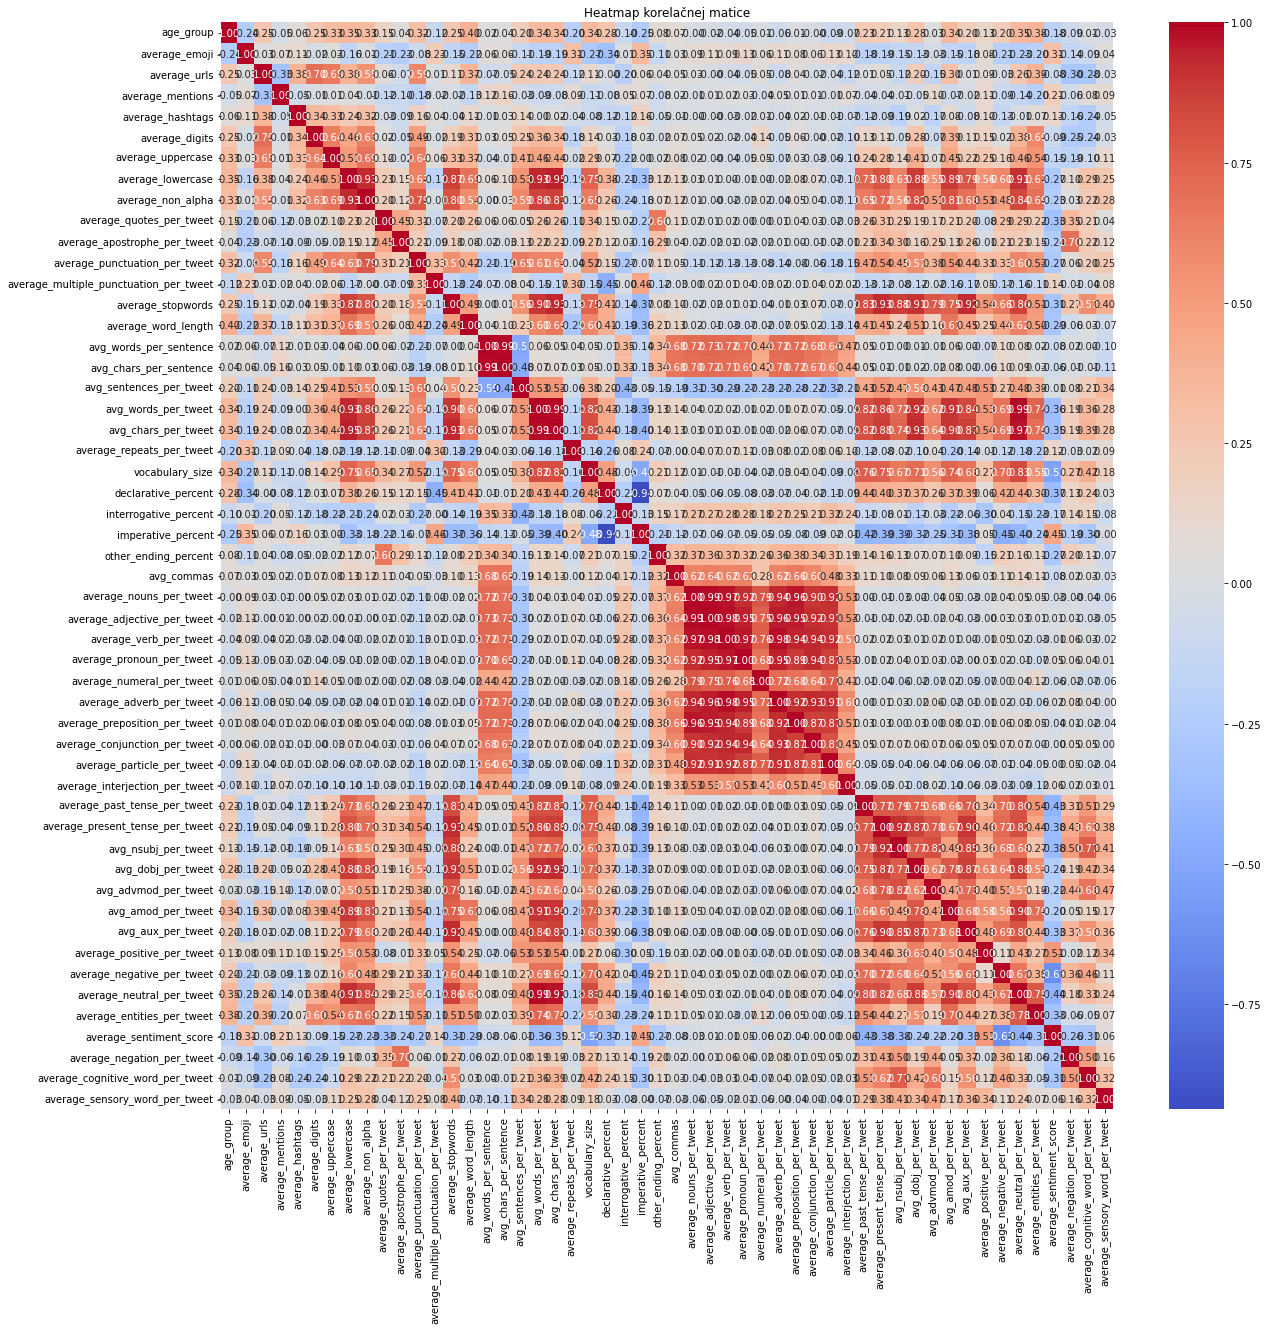

In [142]:
dataset_corr=dataset.drop([ 'lemmatized_text' ], axis=1)
corr_matrix = dataset_corr.corr()

# Vytvor heatmap
plt.figure(figsize=(20, 20))  # Nastav veľkosť obrázka podľa potreby
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap korelačnej matice')
plt.show()

ROZDELENIE NA TRENOVACI A TESTOVACI DATASET

Bez outlieerov a skalovania

In [143]:
y = dataset['age_group']
X = dataset.drop(['age_group'], axis=1) 

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 3462 to 4521
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           3172 non-null   float64
 1   average_urls                            3172 non-null   float64
 2   average_mentions                        3172 non-null   float64
 3   average_hashtags                        3172 non-null   float64
 4   average_digits                          3172 non-null   float64
 5   average_uppercase                       3172 non-null   float64
 6   average_lowercase                       3172 non-null   float64
 7   average_non_alpha                       3172 non-null   float64
 8   average_quotes_per_tweet                3172 non-null   float64
 9   average_apostrophe_per_tweet            3172 non-null   float64
 10  average_punctuation_per_tweet           3172 non-null   f

In [146]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 2002 to 3347
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           1360 non-null   float64
 1   average_urls                            1360 non-null   float64
 2   average_mentions                        1360 non-null   float64
 3   average_hashtags                        1360 non-null   float64
 4   average_digits                          1360 non-null   float64
 5   average_uppercase                       1360 non-null   float64
 6   average_lowercase                       1360 non-null   float64
 7   average_non_alpha                       1360 non-null   float64
 8   average_quotes_per_tweet                1360 non-null   float64
 9   average_apostrophe_per_tweet            1360 non-null   float64
 10  average_punctuation_per_tweet           1360 non-null   f

Kedže veľkosť matice s frekvenciami n-gramov/slov môže byť veľmi vysoká a môže trvať aj veľmi dlho spustenie, tak sme sa rozhodli dať iba niekoľko nafrekventovanejším n-gramov/slov. Skúsili sme s rôznymi veľkosťami n-gramov natrénovať modeli aby sme videli, ktorá veľkosť je najefektívnejšia. Najlepšie by bolo toto spustiť aj s inými verziami datasetu (s outliermi, skalovaním a podobne), však to by bolo veľmi časovo náročné, tak sme zvolili túto možnosť so zakladnym datasetom. Po spustení tohto kodu sme väčšinou manuálne prepísali max_features v kode nižšie, kde sa vytvárali frekvencie n-gramov/slov, s ktorými pracujeme neskôr.

In [147]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre CountVectorizer
    vectorizer_ngram = CountVectorizer(ngram_range=(1, 4), analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Maschine': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.37
Model: Random Forest, Max Features: 500, Accuracy: 0.41
Model: Gradient Boosting Maschine, Max Features: 500, Accuracy: 0.42
Model: SVC, Max Features: 1000, Accuracy: 0.37
Model: Random Forest, Max Features: 1000, Accuracy: 0.42
Model: Gradient Boosting Maschine, Max Features: 1000, Accuracy: 0.43
Model: SVC, Max Features: 2000, Accuracy: 0.38
Model: Random Forest, Max Features: 2000, Accuracy: 0.43
Model: Gradient Boosting Maschine, Max Features: 2000, Accuracy: 0.43
Model: SVC, Max Features: 3000, Accuracy: 0.38
Model: Random Forest, Max Features: 3000, Accuracy: 0.41
Model: Gradient Boosting Maschine, Max Features: 3000, Accuracy: 0.45
Model: SVC, Max Features: 4000, Accuracy: 0.38
Model: Random Forest, Max Features: 4000, Accuracy: 0.43
Model: Gradient Boosting Maschine, Max Features: 4000, Accuracy: 0.43
Model: SVC, Max Features: 5000, Accuracy: 0.38
Model: Random Forest, Max Features: 5000, Accuracy: 0.42
Model: Gradient Boosting Masc

In [148]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre TfidfVectorizer
    vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 4), analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Maschine': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.34
Model: Random Forest, Max Features: 500, Accuracy: 0.41
Model: Gradient Boosting Maschine, Max Features: 500, Accuracy: 0.42
Model: SVC, Max Features: 1000, Accuracy: 0.34
Model: Random Forest, Max Features: 1000, Accuracy: 0.41
Model: Gradient Boosting Maschine, Max Features: 1000, Accuracy: 0.42
Model: SVC, Max Features: 2000, Accuracy: 0.34
Model: Random Forest, Max Features: 2000, Accuracy: 0.42
Model: Gradient Boosting Maschine, Max Features: 2000, Accuracy: 0.44
Model: SVC, Max Features: 3000, Accuracy: 0.34
Model: Random Forest, Max Features: 3000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 3000, Accuracy: 0.42
Model: SVC, Max Features: 4000, Accuracy: 0.34
Model: Random Forest, Max Features: 4000, Accuracy: 0.41
Model: Gradient Boosting Maschine, Max Features: 4000, Accuracy: 0.44
Model: SVC, Max Features: 5000, Accuracy: 0.34
Model: Random Forest, Max Features: 5000, Accuracy: 0.40
Model: Gradient Boosting Masc

In [149]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre CountVectorizer
    vectorizer_ngram = CountVectorizer( analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Maschine': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.37
Model: Random Forest, Max Features: 500, Accuracy: 0.41
Model: Gradient Boosting Maschine, Max Features: 500, Accuracy: 0.42
Model: SVC, Max Features: 1000, Accuracy: 0.37
Model: Random Forest, Max Features: 1000, Accuracy: 0.42
Model: Gradient Boosting Maschine, Max Features: 1000, Accuracy: 0.42
Model: SVC, Max Features: 2000, Accuracy: 0.37
Model: Random Forest, Max Features: 2000, Accuracy: 0.43
Model: Gradient Boosting Maschine, Max Features: 2000, Accuracy: 0.44
Model: SVC, Max Features: 3000, Accuracy: 0.37
Model: Random Forest, Max Features: 3000, Accuracy: 0.41
Model: Gradient Boosting Maschine, Max Features: 3000, Accuracy: 0.44
Model: SVC, Max Features: 4000, Accuracy: 0.37
Model: Random Forest, Max Features: 4000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 4000, Accuracy: 0.42
Model: SVC, Max Features: 5000, Accuracy: 0.37
Model: Random Forest, Max Features: 5000, Accuracy: 0.41
Model: Gradient Boosting Masc

In [150]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre TfidfVectorizer
    vectorizer_ngram = TfidfVectorizer( analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Maschine': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.34
Model: Random Forest, Max Features: 500, Accuracy: 0.42
Model: Gradient Boosting Maschine, Max Features: 500, Accuracy: 0.43
Model: SVC, Max Features: 1000, Accuracy: 0.34
Model: Random Forest, Max Features: 1000, Accuracy: 0.43
Model: Gradient Boosting Maschine, Max Features: 1000, Accuracy: 0.44
Model: SVC, Max Features: 2000, Accuracy: 0.34
Model: Random Forest, Max Features: 2000, Accuracy: 0.42
Model: Gradient Boosting Maschine, Max Features: 2000, Accuracy: 0.42
Model: SVC, Max Features: 3000, Accuracy: 0.34
Model: Random Forest, Max Features: 3000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 3000, Accuracy: 0.44
Model: SVC, Max Features: 4000, Accuracy: 0.34
Model: Random Forest, Max Features: 4000, Accuracy: 0.41
Model: Gradient Boosting Maschine, Max Features: 4000, Accuracy: 0.43
Model: SVC, Max Features: 5000, Accuracy: 0.34
Model: Random Forest, Max Features: 5000, Accuracy: 0.42
Model: Gradient Boosting Masc

Vytvorenie frekvenci n-gramov, tfidf n-gramov, frekvenci slov, tfidf slov

In [151]:
vectorizer_ngram = CountVectorizer(ngram_range=(1, 4), analyzer='word', max_features=2000)
ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])

In [152]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 4), analyzer='word',  max_features=2000)
ngram_train_tfidf = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
ngram_test_tfidf = vectorizer_ngram.transform(X_test['lemmatized_text'])

In [153]:
vectorizer_wfreq = CountVectorizer( analyzer='word', max_features=2000)
wfreq_train = vectorizer_wfreq.fit_transform(X_train['lemmatized_text'])
wfreq_test = vectorizer_wfreq.transform(X_test['lemmatized_text'])

In [154]:
vectorizer_wfreq = TfidfVectorizer( analyzer='word',  max_features=1000)
wfreq_train_tfidf = vectorizer_wfreq.fit_transform(X_train['lemmatized_text'])
wfreq_test_tfidf = vectorizer_wfreq.transform(X_test['lemmatized_text'])

Vymazeme slpcec, ktorý sme potrebovali na vytvorenie frekvencí n-gramov a slov, už ho viac nepotrebujeme

In [155]:
X_train = X_train.drop(['lemmatized_text'], axis=1)

In [156]:
X_test = X_test.drop(['lemmatized_text'], axis=1)

Spojíme stlpce datasetu s frekvenciami ngramov/ tfidf ngramov / slov / tfid slov

In [157]:
X_train_combined = hstack([X_train, ngram_train])
X_test_combined = hstack([X_test, ngram_test])
X_train_combined2 = hstack([X_train, ngram_train_tfidf])
X_test_combined2 = hstack([X_test, ngram_test_tfidf])
X_train_combined3 = hstack([X_train, wfreq_train])
X_test_combined3 = hstack([X_test, wfreq_test])
X_train_combined4 = hstack([X_train, wfreq_train_tfidf])
X_test_combined4 = hstack([X_test, wfreq_test_tfidf])

S ošetrenými outliermi

OUTLIERI

Rozhodla som sa riešiť outlierov (lebo niektoré algoritmy strojového učenia sú na to citlivé napríklad SVC) na základe vekových kategorií, kedže hodnoty v stlpcoch sa môžu líšiť na základe veku a riešiť outlierov všeobecne v rámci celeho stlpca by mohlo zmenšiť rozdiely medzi vekovými skupinami. Zvolila som postup nahradenia outlierov meanom, kedže nechcem vymazávať a chcem ponechať rovnaký počet vzoriek. Zvolila som nahradiť dolných aj horných 10% aby som nahradila najviac vychýlené hodnoty, však aby som aj neskreslila veľmi distribúciu dát

In [158]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4532 entries, 0 to 4531
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age_group                               4532 non-null   int64  
 1   average_emoji                           4532 non-null   float64
 2   average_urls                            4532 non-null   float64
 3   average_mentions                        4532 non-null   float64
 4   average_hashtags                        4532 non-null   float64
 5   average_digits                          4532 non-null   float64
 6   average_uppercase                       4532 non-null   float64
 7   average_lowercase                       4532 non-null   float64
 8   average_non_alpha                       4532 non-null   float64
 9   average_quotes_per_tweet                4532 non-null   float64
 10  average_apostrophe_per_tweet            4532 non-null   floa

In [159]:
columns=['declarative_percent','interrogative_percent', 'imperative_percent', 'other_ending_percent', 'avg_commas','average_nouns_per_tweet', 'average_adjective_per_tweet', 'average_verb_per_tweet', 'average_pronoun_per_tweet', 'average_numeral_per_tweet', 'average_adverb_per_tweet', 'average_preposition_per_tweet','average_conjunction_per_tweet', 'average_particle_per_tweet', 'average_interjection_per_tweet', 'average_past_tense_per_tweet','average_present_tense_per_tweet', 'avg_nsubj_per_tweet','avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet','avg_aux_per_tweet' ]

Ako môžeme vidieť na grafe, tak veľa stlpcov obsahuje outlieerov - graf je pre celý dataset, nie pre x_train/x_test

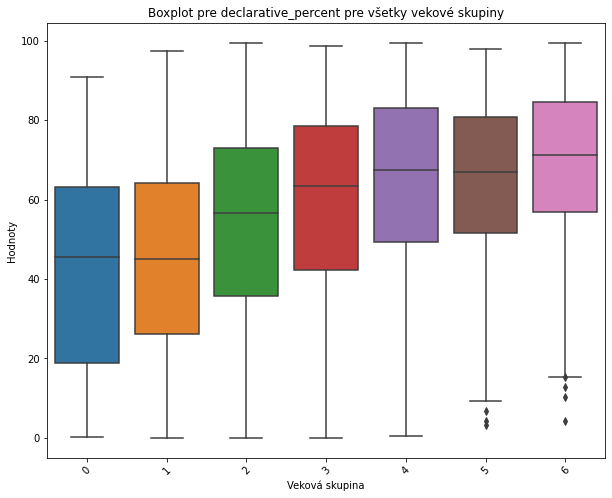

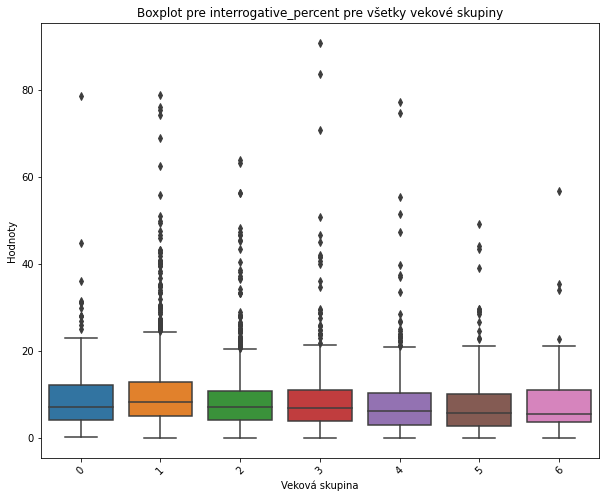

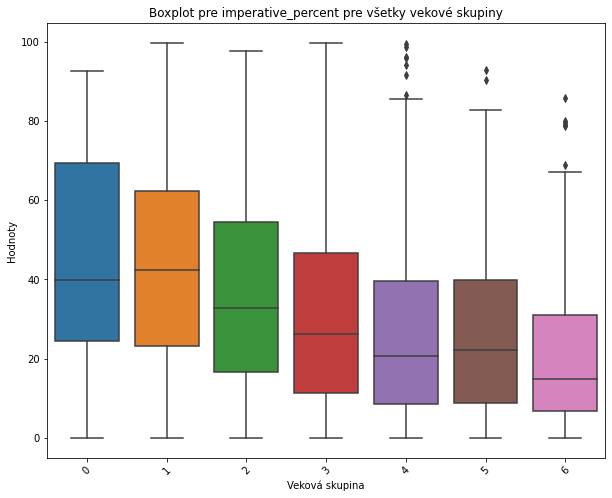

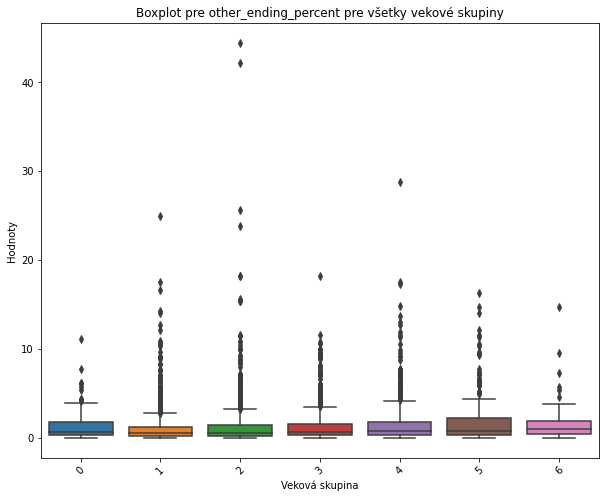

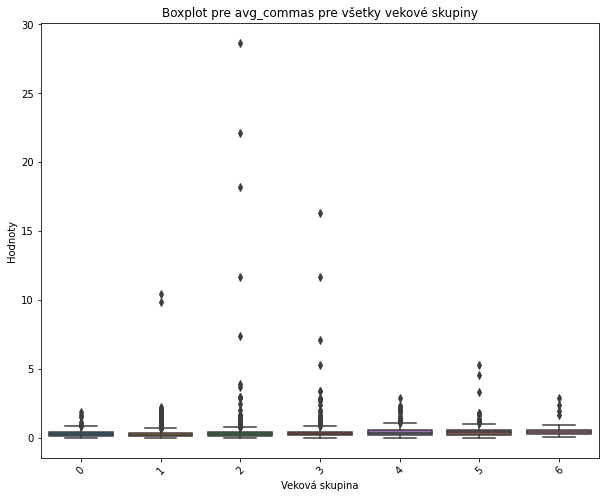

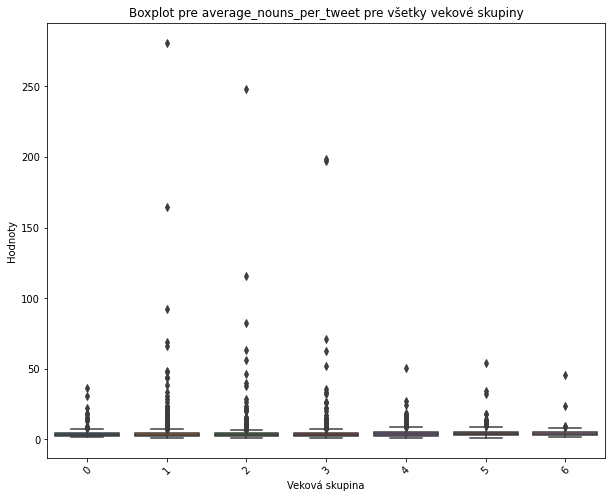

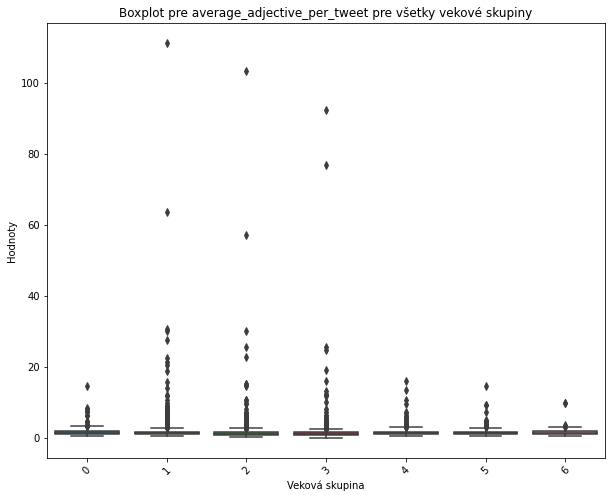

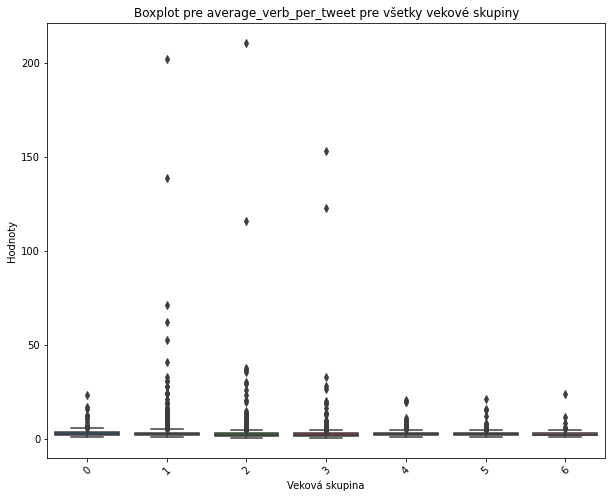

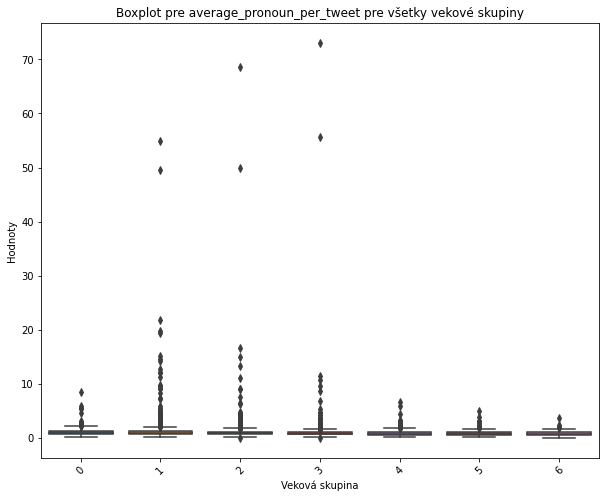

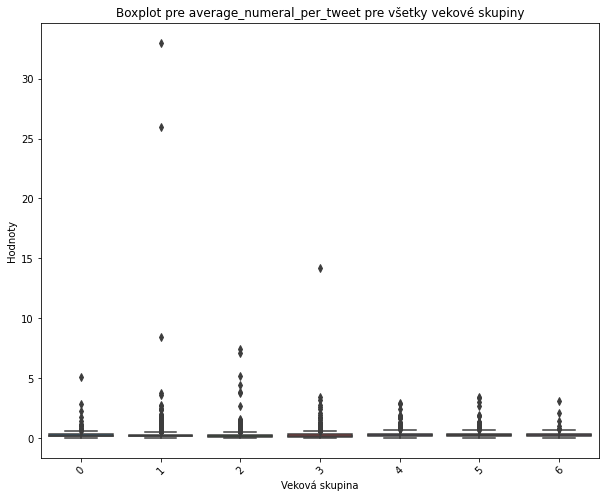

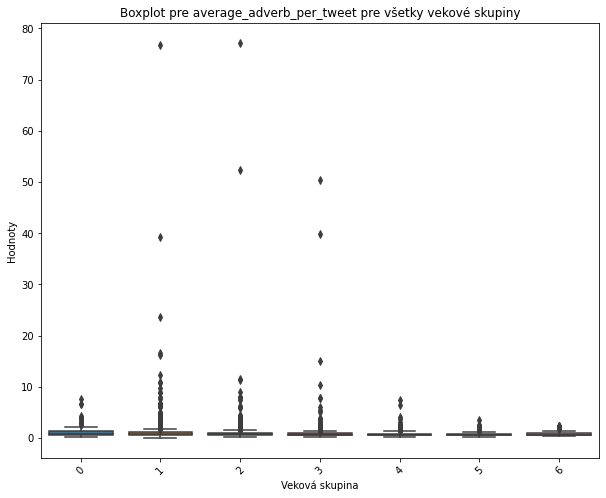

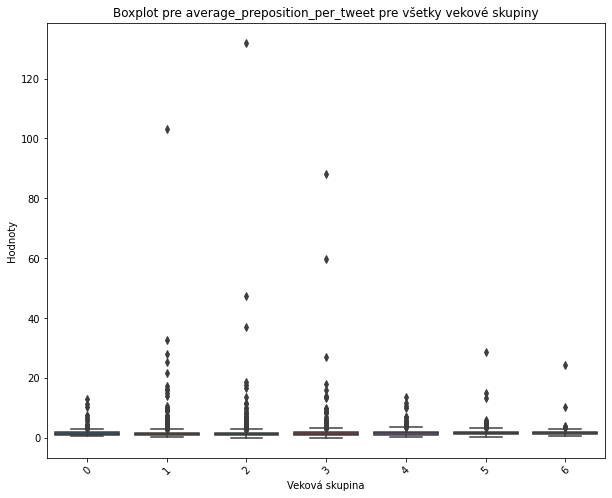

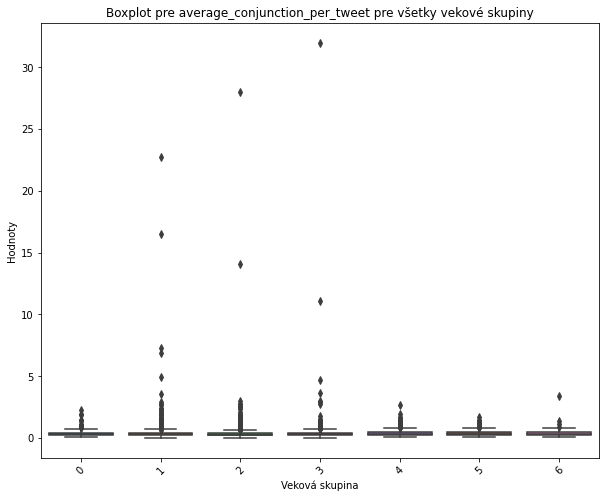

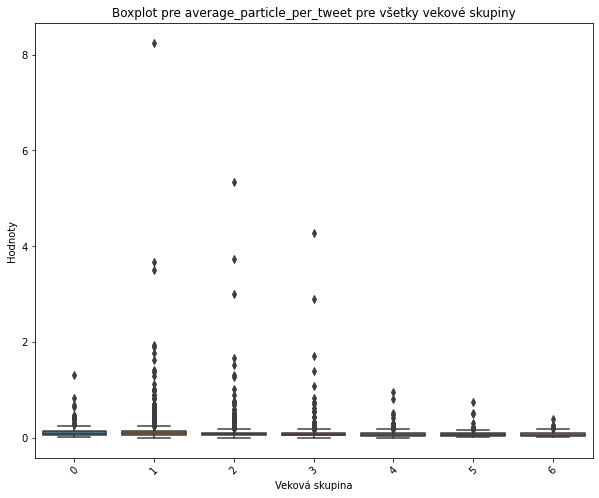

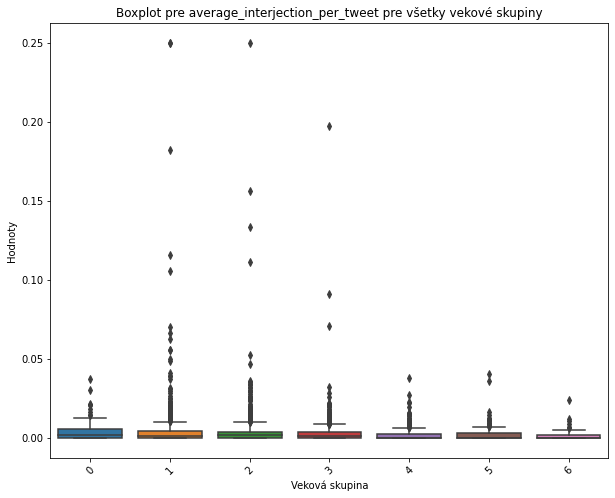

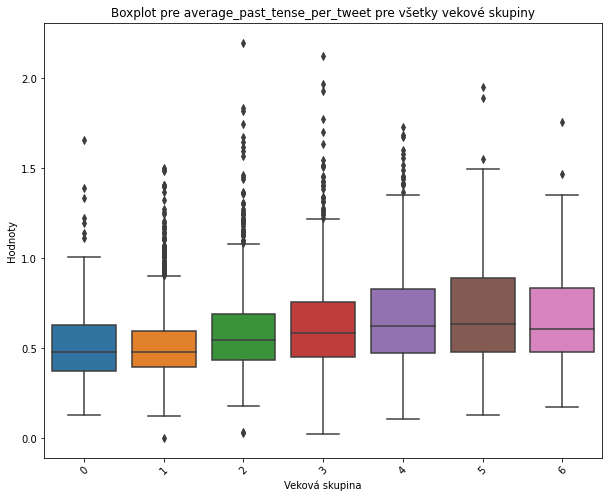

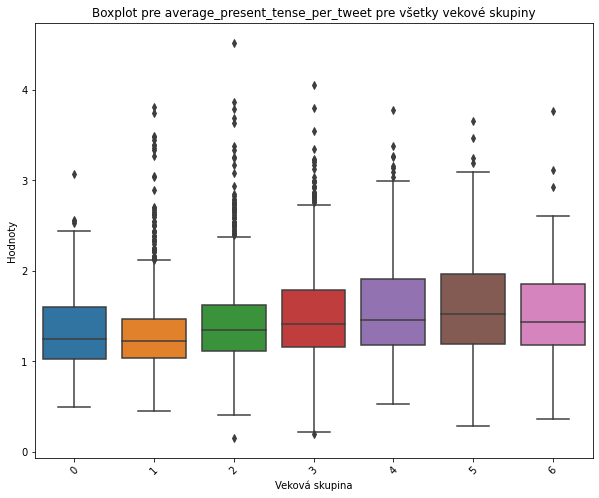

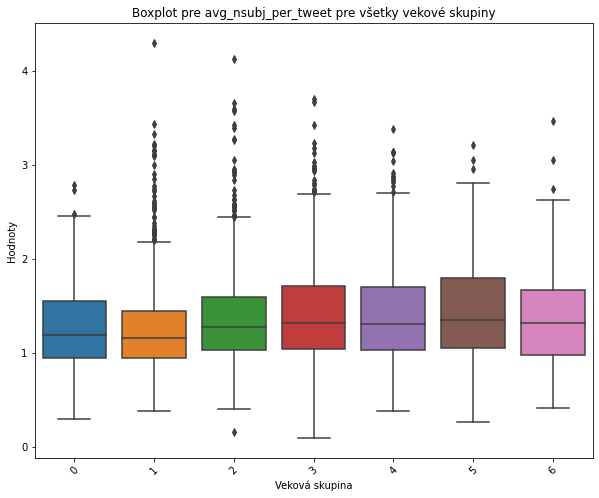

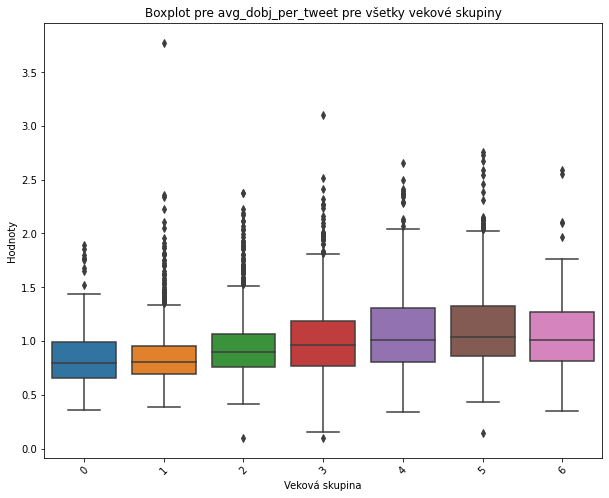

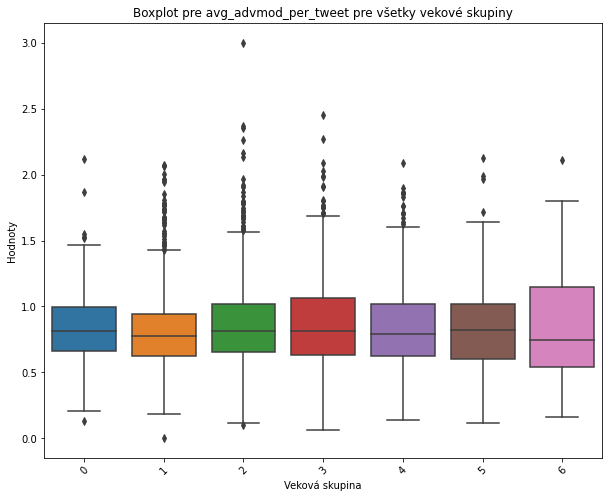

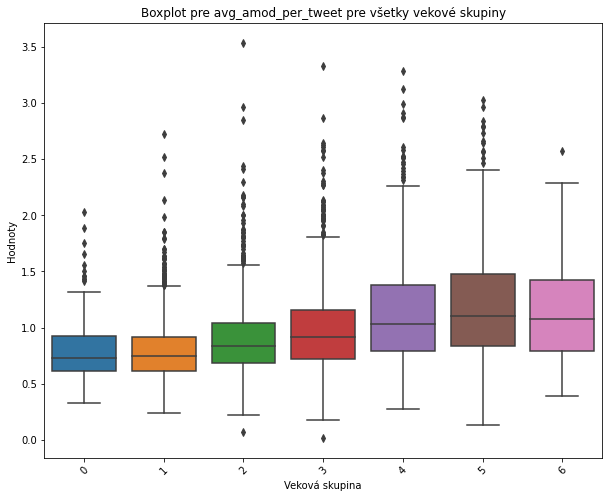

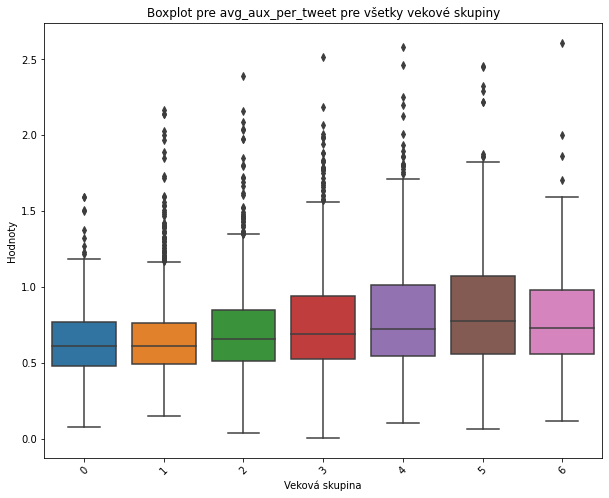

In [160]:
for column in columns:
    plt.figure(figsize=(10, 8)) # Nastaví veľkosť obrázku pre lepšiu čitateľnosť
    sns.boxplot(x='age_group', y=column, data=dataset)
    plt.title(f'Boxplot pre {column} pre všetky vekové skupiny')
    plt.ylabel('Hodnoty')
    plt.xlabel('Veková skupina')
    plt.xticks(rotation=45) # Otáčanie menoviek pre lepšiu čitateľnosť
    plt.show()

Chceli sme zistiť outlierov pre každý slpcec a zároveň vekovú skupinu. Zistili sme si v celkom datasete (nie pre X_train a X_test oddelene, kedže tie hranice by sa mohli líšiť) hranice a mean pre každý stlpec a zároveň každú vekovú skupinu.

In [161]:
global_stats = {}
# Prechádza cez unikátne vekové skupiny v dátovom rámci
for age_group in dataset['age_group'].unique():
    # Prechádza cez zoznam stĺpcov, pre ktoré sa majú vypočítať štatistiky
    for column in columns:
        # Vyberie podmnožinu dát patriacu k aktuálnej vekovej skupine
        group_subset = dataset[dataset['age_group'] == age_group]
        # Vypočíta dolný limit ako 10. percentil hodnôt v aktuálnom stĺpci a vekovej skupine
        lower_limit = group_subset[column].quantile(0.10)
        # Vypočíta horny limit ako 90. percentil hodnôt v aktuálnom stĺpci a vekovej skupine
        upper_limit = group_subset[column].quantile(0.90)
        # Vypočítanie priemernej hodnoty pre dáta medzi dolným a horným limitom
        mean_value = group_subset[(group_subset[column] >= lower_limit) & (group_subset[column] <= upper_limit)][column].mean()
        # Uloženie vypočítaných štatistík do slovníka s kľúčom ako dvojica (veková skupina, názov stĺpca)
        global_stats[(age_group, column)] = (lower_limit, upper_limit, mean_value)

In [162]:
X_train_out = X_train.copy()
X_test_out = X_test.copy()

Následne sme si prvky v stlpcoch, ktoré su pod dolnou hranicou alebo za hornou hranocou nahranili meanom v trenovacom aj v testovacom datasete.

In [163]:
# Iteruje cez každý riadok datasetu
for index, row in X_train_out.iterrows():
    # Získa skupinu veku pre aktuálny riadok z iného DataFrame y_train pomocou indexu
    age_group = y_train.loc[index] 
    
    # Iteruje cez stlpce
    for column in columns:
        # Získa dolný a horný limit a priemernú hodnotu pre aktuálnu kombináciu vekovej skupiny a stĺpca z predtým vytvoreného slovníka global_stats
        lower_limit, upper_limit, mean_value = global_stats[(age_group, column)]
        
        # Ak je hodnota v aktuálnom riadku a stĺpci menšia ako dolný limit alebo väčšia ako horný limit,
        # nastaví hodnotu v tomto riadku a stĺpci na priemernú hodnotu pre túto skupinu
        if row[column] < lower_limit or row[column] > upper_limit:
            X_train_out.at[index, column] = mean_value

In [164]:
# Iteruje cez každý riadok datasetu
for index, row in X_test_out.iterrows():
     # Získa skupinu veku pre aktuálny riadok z iného DataFrame y_train pomocou indexu
    age_group = y_test.loc[index] 
    # Iteruje cez stlpce
    for column in columns:
         # Získa dolný a horný limit a priemernú hodnotu pre aktuálnu kombináciu vekovej skupiny a stĺpca z predtým vytvoreného slovníka global_stats
        lower_limit, upper_limit, mean_value = global_stats[(age_group, column)]
        # Ak je hodnota v aktuálnom riadku a stĺpci menšia ako dolný limit alebo väčšia ako horný limit,
        # nastaví hodnotu v tomto riadku a stĺpci na priemernú hodnotu pre túto skupinu
        if row[column] < lower_limit or row[column] > upper_limit:
            X_test_out.at[index, column] = mean_value

Spojenie s ngramami / tfidf n-gramami /slovami / tfidf slovami

In [165]:
X_train_combined_out = hstack([X_train_out, ngram_train])
X_test_combined_out = hstack([X_test_out, ngram_test])
X_train_combined2_out = hstack([X_train_out, ngram_train_tfidf])
X_test_combined2_out = hstack([X_test_out, ngram_test_tfidf])
X_train_combined3_out = hstack([X_train_out, wfreq_train])
X_test_combined3_out = hstack([X_test_out, wfreq_test])
X_train_combined4_out = hstack([X_train_out, wfreq_train_tfidf])
X_test_combined4_out = hstack([X_test_out, wfreq_test_tfidf])

S aplikovaným škálovaním

SKALOVANIE

Kedže množstvo mojích dát má iné rozsahy a niektoré algoritmy strojového učenia (najmä tie, ktoré sú založené na vzdialenosti ) ako napríklad SVC sú citlivé na rozsahy tak som sa rozhodla pre škálovanie. Škálovanie môže pomôcť zabezpečiť, že jeden atribút neovládne ostatné pri výpočte vzdialeností.

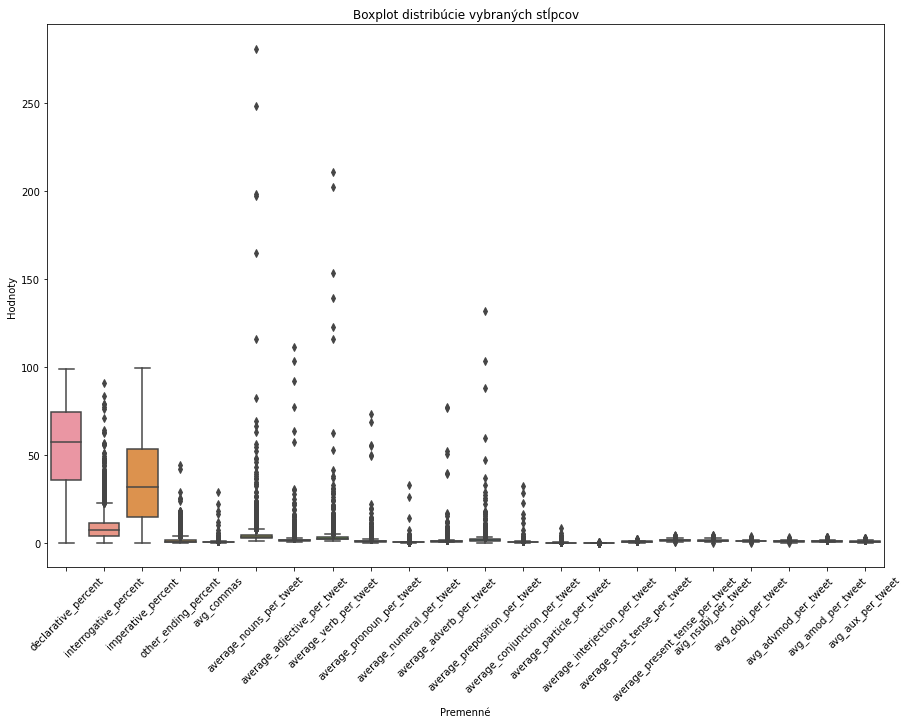

In [166]:
melted_df = pd.melt(X_train, value_vars=columns)

# Teraz použite Seaborn na zobrazenie distribúcií pomocou boxplotu
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot distribúcie vybraných stĺpcov')
plt.xlabel('Premenné')
plt.ylabel('Hodnoty')
plt.show()

In [167]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

Skalovala som si všetky numericke stpce a to tak, že som to fitla na trenovaci dataset a transormovala na obidvoch, aj na trenovacom aj testovacom

In [168]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[columns])
X_train_scaled[columns] = scaler.transform(X_train_scaled[columns])
X_test_scaled[columns] = scaler.transform(X_test_scaled[columns])

Spojenie datasetu s ngramami / tfidf n-gramami / slovami / tfidf slovami

In [169]:
X_train_combined_scaled = hstack([X_train_scaled, ngram_train])
X_test_combined_scaled = hstack([X_test_scaled, ngram_test])
X_train_combined2_scaled = hstack([X_train_scaled, ngram_train_tfidf])
X_test_combined2_scaled = hstack([X_test_scaled, ngram_test_tfidf])
X_train_combined3_scaled = hstack([X_train_scaled, wfreq_train])
X_test_combined3_scaled = hstack([X_test_scaled, wfreq_test])
X_train_combined4_scaled = hstack([X_train_scaled, wfreq_train_tfidf])
X_test_combined4_scaled = hstack([X_test_scaled, wfreq_test_tfidf])

Zobrazili sme si zoskalovane data a vidíme, že sú v rovnakom rozmedzí, však nachádza sa tam množstvo outlierov

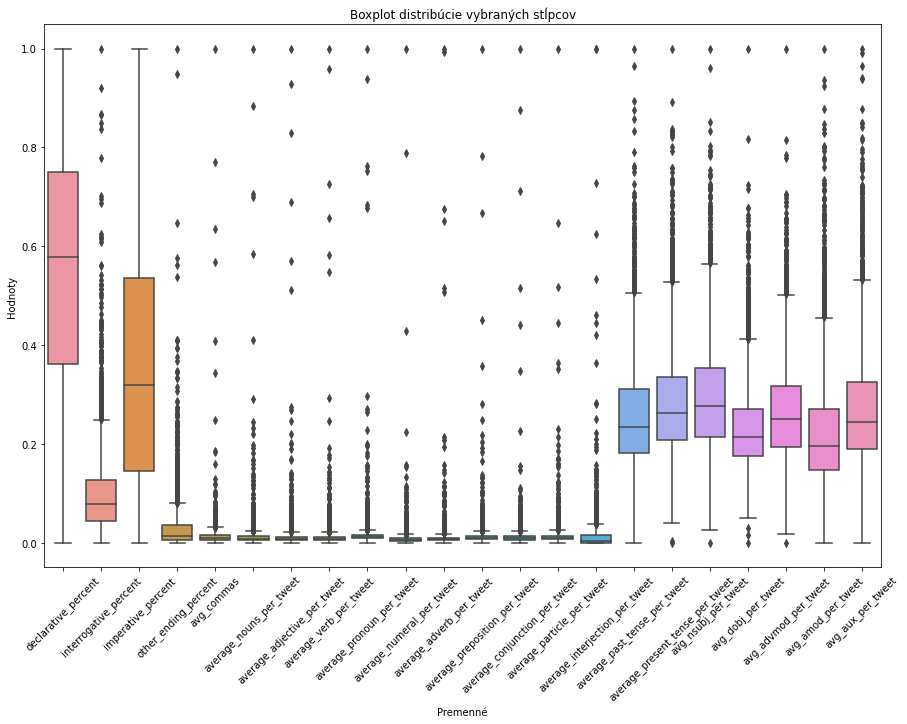

In [170]:
melted_df = pd.melt(X_train_scaled, value_vars=columns)

# Teraz použite Seaborn na zobrazenie distribúcií pomocou boxplotu
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot distribúcie vybraných stĺpcov')
plt.xlabel('Premenné')
plt.ylabel('Hodnoty')
plt.show()

S ošetrenými outliermi aj aplikovaným škálovaním

In [171]:
X_train_scal_out = X_train_out.copy()
X_test_scal_out = X_test_out.copy()

Zoškálujem si dataset s ošetrenými outliermi

In [172]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[columns])
X_train_scal_out[columns] = scaler.transform(X_train_scal_out[columns])
X_test_scal_out[columns] = scaler.transform(X_test_scal_out[columns])

Spojím si dataset s ngramami / tfidf ngramami / slovami / tfidf slovami

In [173]:
X_train_combined_scal_out = hstack([X_train_scal_out, ngram_train])
X_test_combined_scal_out = hstack([X_test_scal_out, ngram_test])
X_train_combined2_scal_out = hstack([X_train_scal_out, ngram_train_tfidf])
X_test_combined2_scal_out = hstack([X_test_scal_out, ngram_test_tfidf])
X_train_combined3_scal_out = hstack([X_train_scal_out, wfreq_train])
X_test_combined3_scal_out = hstack([X_test_scal_out, wfreq_test])
X_train_combined4_scal_out = hstack([X_train_scal_out, wfreq_train_tfidf])
X_test_combined4_scal_out = hstack([X_test_scal_out, wfreq_test_tfidf])

TRENOVANIE 1

Prvé trenovanie som vykonala so všetkými premennými (bez výberu črt) aby som videla aké výsledky môžem dostať. Vykonala som testovanie na 3 modeloch: Random Forest, GBM a SVC. Taktiež na každom modeli som skúsila rôzne varianty datasetu aby som videla s ktorým viem dosiahnúť najlepšie výsledky: bez ošetrenia outlierov a bez škálovania, bez ošetrenia outlierov a bez škálovania a s ngramami, bez ošetrenia outlierov a bez škálovania a s tfidf ngramami, s ošetrením outlierov, s ošetrením outlierov a s ngrami, s ošetrením outlierov a s tfidf ngramami, so škálovaním, so škálovaním a s ngramami, so škálovaním a s tfidf ngramami, s ošetrením outlierov a so škálovaním, s ošetrením outlierov a so škálovaním a s ngramami, s ošetrením outlierov a so škálovaním a s tfidf ngramami.

In [174]:
results_list1_svc=[]#na ukladanie testovacej a trenovacej accuracy

SVC - bez ošetrenia outlierov a skalovania

Trenovanie modelu

In [175]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Predikovanie na trenovacich datach

In [176]:
y_pred_train = svc_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))


Presnosť: 0.3316519546027743
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.38      0.79      0.52       913
           2       0.25      0.30      0.27       848
           3       0.24      0.08      0.12       611
           4       0.34      0.06      0.10       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.33      3172
   macro avg       0.17      0.18      0.14      3172
weighted avg       0.27      0.33      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [177]:
y_pred = svc_model.predict(X_test)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.39      0.77      0.52       396
           2       0.29      0.33      0.31       377
           3       0.26      0.11      0.16       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.18      0.18      0.16      1360
weighted avg       0.28      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Uloženie trenovacej a testovacej accuracy do poľa s výsledkami z prveho testovania pre svc

In [178]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zobrazenie metrik

In [179]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.345
Recall: 0.18
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

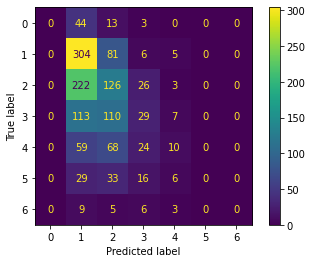

In [180]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a ngram

In [181]:
svc_model = SVC()
svc_model.fit(X_train_combined, y_train)

SVC()

In [182]:
y_pred_train = svc_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3720050441361917
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.44      0.78      0.56       913
           2       0.29      0.42      0.34       848
           3       0.31      0.09      0.14       611
           4       0.37      0.14      0.20       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.37      3172
   macro avg       0.20      0.20      0.18      3172
weighted avg       0.31      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
y_pred = svc_model.predict(X_test_combined)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.44      0.74      0.55       396
           2       0.32      0.45      0.38       377
           3       0.28      0.09      0.14       259
           4       0.29      0.14      0.18       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.38      1360
   macro avg       0.19      0.20      0.18      1360
weighted avg       0.30      0.38      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.20
Precision: 0.19
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


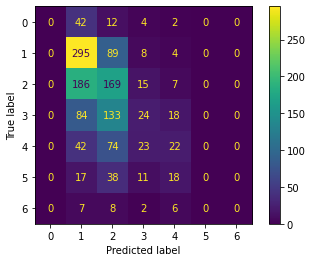

In [186]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a tfidf ngram

In [187]:
svc_model = SVC()
svc_model.fit(X_train_combined2, y_train)

SVC()

In [188]:
y_pred_train = svc_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3316519546027743
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.38      0.79      0.52       913
           2       0.25      0.30      0.28       848
           3       0.24      0.08      0.12       611
           4       0.34      0.06      0.10       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.33      3172
   macro avg       0.17      0.18      0.14      3172
weighted avg       0.27      0.33      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
y_pred = svc_model.predict(X_test_combined2)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.39      0.77      0.52       396
           2       0.29      0.34      0.31       377
           3       0.24      0.10      0.14       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.17      0.18      0.15      1360
weighted avg       0.27      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.34
Recall: 0.18
Precision: 0.17
F1 Score: 0.15


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


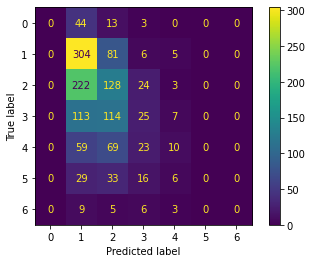

In [192]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a word frequency

In [193]:
svc_model = SVC()
svc_model.fit(X_train_combined3, y_train)

SVC()

In [194]:
y_pred_train = svc_model.predict(X_train_combined3)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3707440100882724
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.43      0.79      0.56       913
           2       0.29      0.41      0.34       848
           3       0.31      0.09      0.15       611
           4       0.37      0.14      0.20       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.37      3172
   macro avg       0.20      0.20      0.18      3172
weighted avg       0.31      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
y_pred = svc_model.predict(X_test_combined3)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.44      0.75      0.55       396
           2       0.32      0.45      0.37       377
           3       0.27      0.08      0.13       259
           4       0.29      0.14      0.19       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.37      1360
   macro avg       0.19      0.20      0.18      1360
weighted avg       0.30      0.37      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.20
Precision: 0.19
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


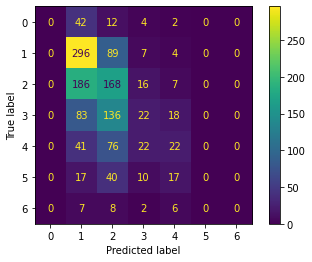

In [198]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a tfidf word frequency

In [199]:
svc_model = SVC()
svc_model.fit(X_train_combined4, y_train)

SVC()

In [200]:
y_pred_train = svc_model.predict(X_train_combined4)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3316519546027743
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.38      0.79      0.52       913
           2       0.25      0.30      0.28       848
           3       0.24      0.08      0.12       611
           4       0.34      0.06      0.10       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.33      3172
   macro avg       0.17      0.18      0.14      3172
weighted avg       0.27      0.33      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
y_pred = svc_model.predict(X_test_combined4)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.39      0.77      0.52       396
           2       0.29      0.34      0.31       377
           3       0.24      0.10      0.14       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.17      0.18      0.15      1360
weighted avg       0.27      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))

Accuracy: 0.34
Recall: 0.18
Precision: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


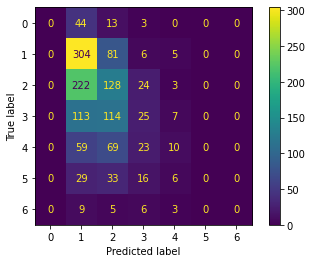

In [204]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov

In [205]:
svc_model = SVC()
svc_model.fit(X_train_out, y_train)

SVC()

In [206]:
y_pred_train = svc_model.predict(X_train_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.39      0.79      0.52       913
           2       0.26      0.31      0.28       848
           3       0.26      0.11      0.15       611
           4       0.35      0.06      0.11       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
y_pred = svc_model.predict(X_test_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.40      0.76      0.52       396
           2       0.28      0.34      0.31       377
           3       0.26      0.13      0.17       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.18      0.18      0.16      1360
weighted avg       0.28      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


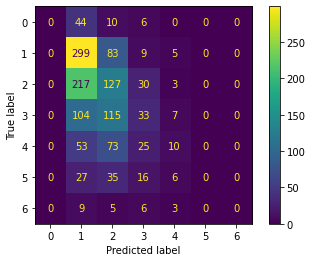

In [210]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a ngram

In [211]:
svc_model = SVC()
svc_model.fit(X_train_combined_out, y_train)

SVC()

In [212]:
y_pred_train = svc_model.predict(X_train_combined_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.45      0.78      0.57       913
           2       0.30      0.44      0.35       848
           3       0.30      0.09      0.14       611
           4       0.37      0.14      0.20       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.38      3172
   macro avg       0.20      0.21      0.18      3172
weighted avg       0.31      0.38      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
y_pred = svc_model.predict(X_test_combined_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.45      0.74      0.56       396
           2       0.32      0.46      0.38       377
           3       0.27      0.09      0.14       259
           4       0.29      0.14      0.18       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.38      1360
   macro avg       0.19      0.21      0.18      1360
weighted avg       0.31      0.38      0.32      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.21
Precision: 0.19
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


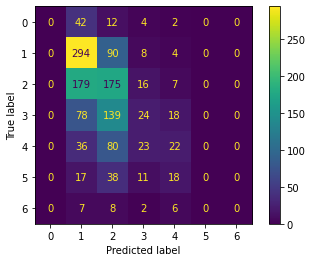

In [216]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a tfidf ngram

In [217]:
svc_model = SVC()
svc_model.fit(X_train_combined2_out, y_train)

SVC()

In [218]:
y_pred_train = svc_model.predict(X_train_combined2_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.39      0.79      0.52       913
           2       0.26      0.31      0.28       848
           3       0.25      0.10      0.14       611
           4       0.35      0.06      0.11       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
y_pred = svc_model.predict(X_test_combined2_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.40      0.76      0.52       396
           2       0.28      0.34      0.31       377
           3       0.26      0.12      0.17       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.18      0.18      0.16      1360
weighted avg       0.28      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [220]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [221]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


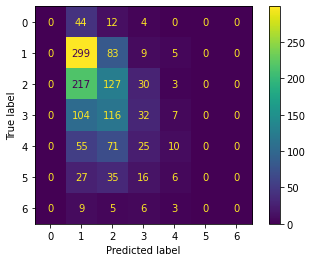

In [222]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a word frequency

In [223]:
svc_model = SVC()
svc_model.fit(X_train_combined3_out, y_train)

SVC()

In [224]:
y_pred_train = svc_model.predict(X_train_combined3_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.45      0.79      0.57       913
           2       0.30      0.43      0.35       848
           3       0.31      0.10      0.15       611
           4       0.38      0.14      0.20       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.38      3172
   macro avg       0.20      0.21      0.18      3172
weighted avg       0.31      0.38      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
y_pred = svc_model.predict(X_test_combined3_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.45      0.74      0.56       396
           2       0.32      0.46      0.38       377
           3       0.28      0.09      0.14       259
           4       0.29      0.14      0.19       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.38      1360
   macro avg       0.19      0.21      0.18      1360
weighted avg       0.31      0.38      0.32      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [227]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.21
Precision: 0.19
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


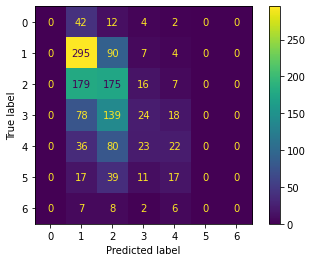

In [228]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a tfidf word frequency

In [229]:
svc_model = SVC()
svc_model.fit(X_train_combined4_out, y_train)

SVC()

In [230]:
y_pred_train = svc_model.predict(X_train_combined4_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.39      0.79      0.52       913
           2       0.26      0.31      0.28       848
           3       0.25      0.10      0.14       611
           4       0.35      0.06      0.11       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
y_pred = svc_model.predict(X_test_combined4_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.40      0.76      0.52       396
           2       0.28      0.34      0.31       377
           3       0.26      0.12      0.17       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.18      0.18      0.16      1360
weighted avg       0.28      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


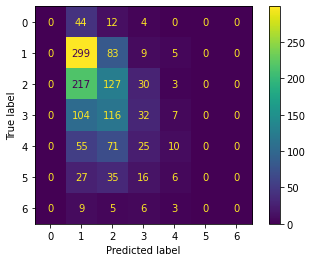

In [234]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim

In [235]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [236]:
y_pred_train = svc_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.32944514501891553
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.38      0.79      0.51       913
           2       0.25      0.30      0.27       848
           3       0.24      0.08      0.11       611
           4       0.33      0.06      0.10       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.33      3172
   macro avg       0.17      0.17      0.14      3172
weighted avg       0.26      0.33      0.25      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
y_pred = svc_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3426470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.38      0.78      0.51       396
           2       0.29      0.33      0.31       377
           3       0.25      0.10      0.14       259
           4       0.27      0.06      0.09       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.17      0.18      0.15      1360
weighted avg       0.27      0.34      0.27      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [239]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.17
F1 Score: 0.15


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


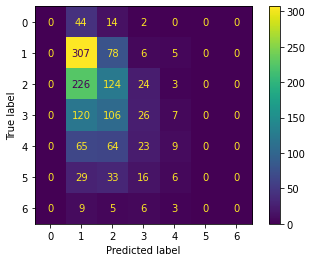

In [240]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a ngram

In [241]:
svc_model = SVC()
svc_model.fit(X_train_combined_scaled, y_train)

SVC()

In [242]:
y_pred_train = svc_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.36916771752837324
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.43      0.79      0.55       913
           2       0.29      0.40      0.34       848
           3       0.31      0.09      0.15       611
           4       0.37      0.14      0.20       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.37      3172
   macro avg       0.20      0.20      0.18      3172
weighted avg       0.31      0.37      0.30      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [243]:
y_pred = svc_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3720588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.44      0.74      0.55       396
           2       0.32      0.44      0.37       377
           3       0.28      0.09      0.14       259
           4       0.29      0.14      0.19       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.37      1360
   macro avg       0.19      0.20      0.18      1360
weighted avg       0.30      0.37      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [244]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.20
Precision: 0.19
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


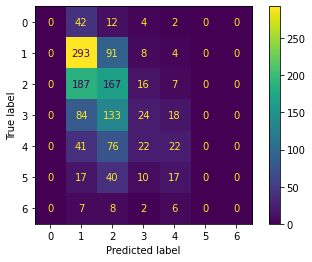

In [246]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a tfidf ngram

In [247]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scaled, y_train)

SVC()

In [248]:
y_pred_train = svc_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3291298865069357
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.38      0.79      0.51       913
           2       0.25      0.30      0.27       848
           3       0.23      0.07      0.10       611
           4       0.33      0.06      0.10       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.33      3172
   macro avg       0.17      0.17      0.14      3172
weighted avg       0.26      0.33      0.25      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [249]:
y_pred = svc_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.34338235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.39      0.78      0.51       396
           2       0.29      0.33      0.31       377
           3       0.25      0.09      0.13       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.17      0.18      0.15      1360
weighted avg       0.27      0.34      0.27      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [250]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [251]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.17
F1 Score: 0.15


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


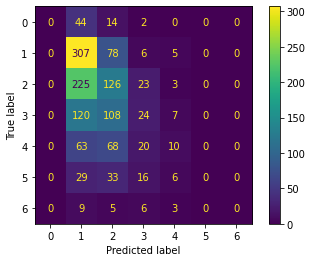

In [252]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a word frequency

In [253]:
svc_model = SVC()
svc_model.fit(X_train_combined3_scaled, y_train)

SVC()

In [254]:
y_pred_train = svc_model.predict(X_train_combined3_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.36885245901639346
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.42      0.79      0.55       913
           2       0.30      0.39      0.34       848
           3       0.31      0.09      0.14       611
           4       0.37      0.14      0.20       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.37      3172
   macro avg       0.20      0.20      0.18      3172
weighted avg       0.31      0.37      0.30      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
y_pred = svc_model.predict(X_test_combined3_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.37279411764705883
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.44      0.75      0.55       396
           2       0.32      0.44      0.37       377
           3       0.27      0.08      0.13       259
           4       0.29      0.14      0.19       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.37      1360
   macro avg       0.19      0.20      0.18      1360
weighted avg       0.30      0.37      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [257]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.20
Precision: 0.19
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


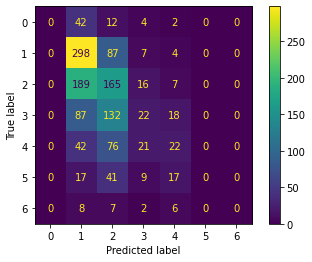

In [258]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a tfidf word frequency

In [259]:
svc_model = SVC()
svc_model.fit(X_train_combined4_scaled, y_train)

SVC()

In [260]:
y_pred_train = svc_model.predict(X_train_combined4_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3291298865069357
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.38      0.79      0.51       913
           2       0.25      0.30      0.27       848
           3       0.23      0.07      0.10       611
           4       0.33      0.06      0.10       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.33      3172
   macro avg       0.17      0.17      0.14      3172
weighted avg       0.26      0.33      0.25      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [261]:
y_pred = svc_model.predict(X_test_combined4_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.34338235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.39      0.78      0.51       396
           2       0.29      0.33      0.31       377
           3       0.25      0.09      0.13       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.17      0.18      0.15      1360
weighted avg       0.27      0.34      0.27      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [262]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [263]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.17
F1 Score: 0.15


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


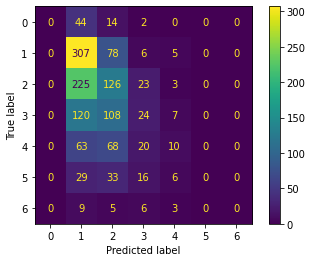

In [264]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim

In [265]:
svc_model = SVC()
svc_model.fit(X_train_scal_out, y_train)

SVC()

In [266]:
y_pred_train = svc_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3376418663303909
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.39      0.79      0.52       913
           2       0.26      0.31      0.28       848
           3       0.26      0.11      0.15       611
           4       0.35      0.06      0.11       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [267]:
y_pred = svc_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3448529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.40      0.76      0.52       396
           2       0.28      0.34      0.31       377
           3       0.26      0.13      0.17       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.18      0.18      0.16      1360
weighted avg       0.28      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [268]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [269]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


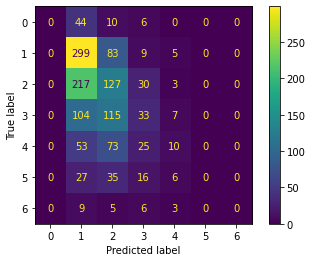

In [270]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a ngram

In [271]:
svc_model = SVC()
svc_model.fit(X_train_combined_scal_out, y_train)

SVC()

In [272]:
y_pred_train = svc_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3776796973518285
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.45      0.78      0.57       913
           2       0.30      0.44      0.35       848
           3       0.30      0.09      0.14       611
           4       0.37      0.14      0.20       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.38      3172
   macro avg       0.20      0.21      0.18      3172
weighted avg       0.31      0.38      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [273]:
y_pred = svc_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3786764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.45      0.74      0.56       396
           2       0.32      0.46      0.38       377
           3       0.27      0.09      0.14       259
           4       0.29      0.14      0.18       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.38      1360
   macro avg       0.19      0.21      0.18      1360
weighted avg       0.31      0.38      0.32      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [274]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [275]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.21
Precision: 0.19
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


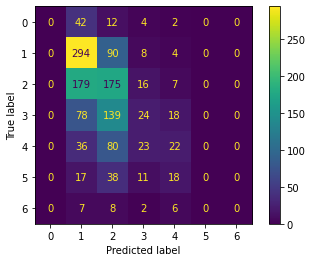

In [276]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a tfidf ngram

In [277]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scal_out, y_train)

SVC()

In [278]:
y_pred_train = svc_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3373266078184111
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.39      0.79      0.52       913
           2       0.26      0.31      0.28       848
           3       0.25      0.10      0.14       611
           4       0.35      0.06      0.11       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [279]:
y_pred = svc_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.34411764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.40      0.76      0.52       396
           2       0.28      0.34      0.31       377
           3       0.26      0.12      0.17       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.18      0.18      0.16      1360
weighted avg       0.28      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [280]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [281]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


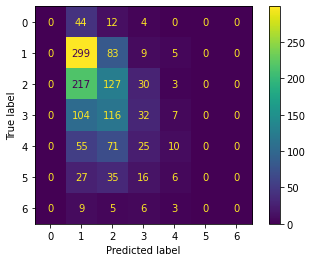

In [282]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a word frequency

In [283]:
svc_model = SVC()
svc_model.fit(X_train_combined3_scal_out, y_train)

SVC()

In [284]:
y_pred_train = svc_model.predict(X_train_combined3_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3761034047919294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.45      0.79      0.57       913
           2       0.30      0.43      0.35       848
           3       0.31      0.10      0.15       611
           4       0.38      0.14      0.20       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.38      3172
   macro avg       0.20      0.21      0.18      3172
weighted avg       0.31      0.38      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [285]:
y_pred = svc_model.predict(X_test_combined3_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.37941176470588234
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.45      0.74      0.56       396
           2       0.32      0.46      0.38       377
           3       0.28      0.09      0.14       259
           4       0.29      0.14      0.19       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.38      1360
   macro avg       0.19      0.21      0.18      1360
weighted avg       0.31      0.38      0.32      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [286]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [287]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.21
Precision: 0.19
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


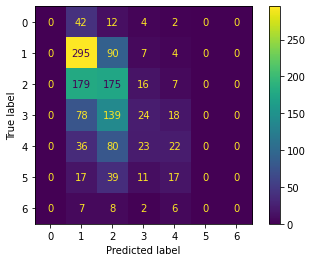

In [288]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a tfidf word frequency

In [289]:
svc_model = SVC()
svc_model.fit(X_train_combined4_scal_out, y_train)

SVC()

In [290]:
y_pred_train = svc_model.predict(X_train_combined4_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3373266078184111
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.39      0.79      0.52       913
           2       0.26      0.31      0.28       848
           3       0.25      0.10      0.14       611
           4       0.35      0.06      0.11       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [291]:
y_pred = svc_model.predict(X_test_combined4_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.34411764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.40      0.76      0.52       396
           2       0.28      0.34      0.31       377
           3       0.26      0.12      0.17       259
           4       0.29      0.06      0.10       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.34      1360
   macro avg       0.18      0.18      0.16      1360
weighted avg       0.28      0.34      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [292]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [293]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


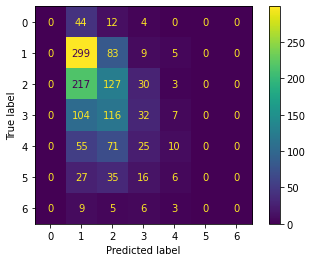

In [294]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [295]:
results_svc1 = pd.DataFrame(results_list1_svc)
print(results_svc1)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0         0.331652       0.344853         0.173784        0.176641   
1         0.372005       0.375000         0.201136        0.189007   
2         0.331652       0.343382         0.173346        0.173646   
3         0.370744       0.373529         0.200776        0.187513   
4         0.331652       0.343382         0.173346        0.173646   
5         0.337642       0.344853         0.180058        0.176954   
6         0.377680       0.378676         0.203101        0.190221   
7         0.337327       0.344118         0.179316        0.176470   
8         0.376103       0.379412         0.203643        0.191241   
9         0.337327       0.344118         0.179311        0.176470   
10        0.329445       0.342647         0.171963        0.171622   
11        0.369168       0.372059         0.200112        0.188870   
12        0.329130       0.343382         0.170099        0.174057   
13        0.368852  

Podľa výsledkov po prvom testovani svc môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi s ngram alebo s frekvenciou slov a s ošetrenými outliermi so skalovanim s ngram alebo s frekvenciou slov. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov a pridanie textovej reprezentácie n-gram alebo frekvenciu slov. Aj ked sme použili všetký dáta, tak model nevyzerá byť pretrénovaný, kedže trénovacie accuracy nie je priveľmi vysoké oproti trénovacému accuracy. Zatiaľ tento model nevykazuje vysokú presnosť.

RANDOM FOREST - bez ošetrenia outlierov a skalovania

In [296]:
results_list1_rf=[]#na ukladanie trenovacej a testovacej accuracy

Trenovanie modelu na trenovacich datach

In [297]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

Predikovanie na trenovacich datach

In [298]:
y_pred_train = rf_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [299]:
y_pred = rf_model.predict(X_test)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40661764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.03        60
           1       0.55      0.68      0.61       396
           2       0.38      0.50      0.43       377
           3       0.25      0.23      0.24       259
           4       0.27      0.19      0.22       161
           5       0.17      0.06      0.09        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.37      0.24      0.23      1360
weighted avg       0.40      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zobrazenie metrik

In [301]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.37
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

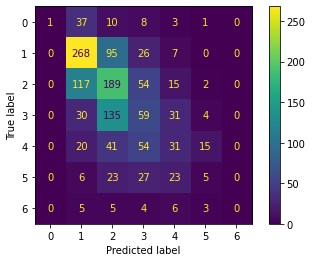

In [302]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a ngram

In [303]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [304]:
y_pred_train = rf_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [305]:
y_pred = rf_model.predict(X_test_combined)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40294117647058825
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      0.74      0.62       396
           2       0.34      0.45      0.39       377
           3       0.27      0.21      0.24       259
           4       0.30      0.20      0.24       161
           5       0.12      0.02      0.04        84
           6       0.00      0.00      0.00        23

    accuracy                           0.40      1360
   macro avg       0.22      0.23      0.22      1360
weighted avg       0.35      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [306]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [307]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.22
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


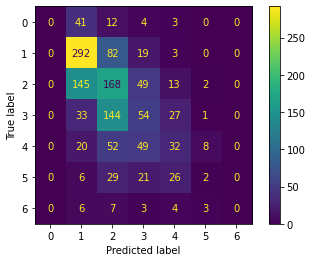

In [308]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a tfidf ngram

In [309]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2, y_train)

RandomForestClassifier()

In [310]:
y_pred_train = rf_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [311]:
y_pred = rf_model.predict(X_test_combined2)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4227941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.73      0.61       396
           2       0.37      0.47      0.41       377
           3       0.32      0.25      0.28       259
           4       0.35      0.23      0.28       161
           5       0.23      0.04      0.06        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.26      0.25      0.24      1360
weighted avg       0.37      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [312]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [313]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.26
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


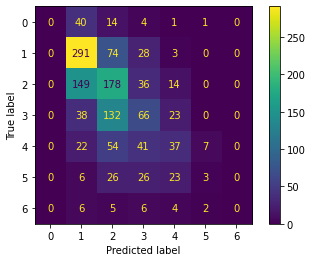

In [314]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a word frequency

In [315]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3, y_train)

RandomForestClassifier()

In [316]:
y_pred_train = rf_model.predict(X_train_combined3)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [317]:
y_pred = rf_model.predict(X_test_combined3)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.72      0.61       396
           2       0.34      0.45      0.39       377
           3       0.32      0.27      0.29       259
           4       0.33      0.19      0.24       161
           5       0.36      0.06      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.23      1360
weighted avg       0.37      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [318]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [319]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.27
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


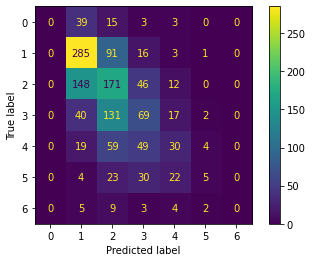

In [320]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a tfidf word frequency

In [321]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4, y_train)

RandomForestClassifier()

In [322]:
y_pred_train = rf_model.predict(X_train_combined4)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [323]:
y_pred = rf_model.predict(X_test_combined4)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40955882352941175
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      0.70      0.61       396
           2       0.35      0.50      0.41       377
           3       0.27      0.20      0.23       259
           4       0.35      0.24      0.28       161
           5       0.36      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [324]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [325]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.27
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


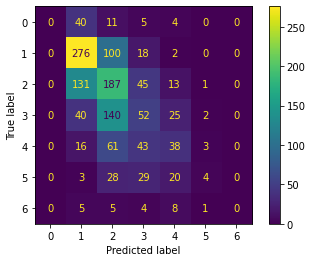

In [326]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov

In [327]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_out, y_train)

RandomForestClassifier()

In [328]:
y_pred_train = rf_model.predict(X_train_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [329]:
y_pred = rf_model.predict(X_test_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7125
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.18        60
           1       0.74      0.90      0.81       396
           2       0.70      0.80      0.74       377
           3       0.70      0.68      0.69       259
           4       0.69      0.65      0.67       161
           5       0.76      0.30      0.43        84
           6       0.00      0.00      0.00        23

    accuracy                           0.71      1360
   macro avg       0.65      0.49      0.50      1360
weighted avg       0.71      0.71      0.69      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [330]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [331]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.71
Recall: 0.49
Precision: 0.65
F1 Score: 0.50


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


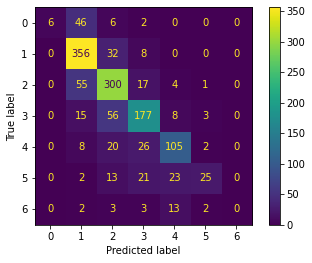

In [332]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a ngram

In [333]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_out, y_train)

RandomForestClassifier()

In [334]:
y_pred_train = rf_model.predict(X_train_combined_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [335]:
y_pred = rf_model.predict(X_test_combined_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5514705882352942
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.66      0.82      0.73       396
           2       0.52      0.70      0.60       377
           3       0.44      0.41      0.42       259
           4       0.49      0.35      0.41       161
           5       0.43      0.04      0.07        84
           6       0.00      0.00      0.00        23

    accuracy                           0.55      1360
   macro avg       0.36      0.33      0.32      1360
weighted avg       0.50      0.55      0.51      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [337]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.55
Recall: 0.33
Precision: 0.36
F1 Score: 0.32


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


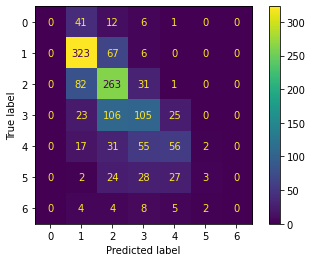

In [338]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a tfidf ngram

In [339]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_out, y_train)

RandomForestClassifier()

In [340]:
y_pred_train = rf_model.predict(X_train_combined2_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [341]:
y_pred = rf_model.predict(X_test_combined2_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.538235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.62      0.85      0.71       396
           2       0.50      0.64      0.56       377
           3       0.44      0.37      0.40       259
           4       0.49      0.35      0.41       161
           5       0.55      0.07      0.13        84
           6       0.00      0.00      0.00        23

    accuracy                           0.54      1360
   macro avg       0.37      0.32      0.32      1360
weighted avg       0.50      0.54      0.50      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [342]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [343]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.54
Recall: 0.32
Precision: 0.37
F1 Score: 0.32


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


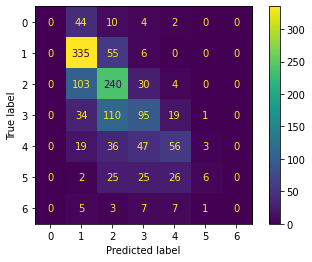

In [344]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a word frequency

In [345]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_out, y_train)

RandomForestClassifier()

In [346]:
y_pred_train = rf_model.predict(X_train_combined3_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [347]:
y_pred = rf_model.predict(X_test_combined3_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5588235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.66      0.83      0.73       396
           2       0.51      0.69      0.58       377
           3       0.50      0.41      0.45       259
           4       0.49      0.39      0.43       161
           5       0.38      0.04      0.07        84
           6       0.00      0.00      0.00        23

    accuracy                           0.56      1360
   macro avg       0.36      0.34      0.32      1360
weighted avg       0.51      0.56      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [348]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [349]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.56
Recall: 0.34
Precision: 0.36
F1 Score: 0.32


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


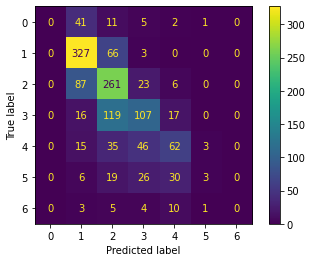

In [350]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a tfidf word frequency

In [351]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_out, y_train)

RandomForestClassifier()

In [352]:
y_pred_train = rf_model.predict(X_train_combined4_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [353]:
y_pred = rf_model.predict(X_test_combined4_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.575
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.65      0.86      0.74       396
           2       0.53      0.68      0.60       377
           3       0.50      0.45      0.47       259
           4       0.54      0.38      0.44       161
           5       0.70      0.08      0.15        84
           6       0.00      0.00      0.00        23

    accuracy                           0.57      1360
   macro avg       0.42      0.35      0.34      1360
weighted avg       0.54      0.57      0.53      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [354]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [355]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.57
Recall: 0.35
Precision: 0.42
F1 Score: 0.34


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


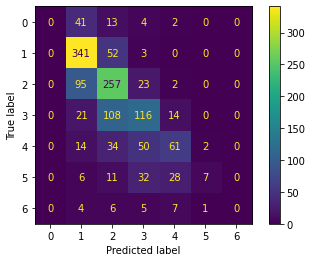

In [356]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim

In [357]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [358]:
y_pred_train = rf_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [359]:
y_pred = rf_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40588235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.03        60
           1       0.53      0.65      0.59       396
           2       0.36      0.46      0.41       377
           3       0.31      0.29      0.30       259
           4       0.31      0.22      0.26       161
           5       0.21      0.08      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.39      0.25      0.24      1360
weighted avg       0.41      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [360]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [361]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.25
Precision: 0.39
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


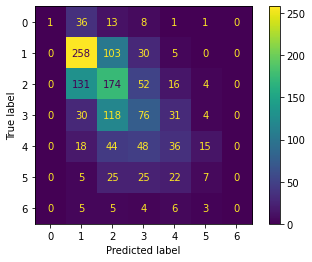

In [362]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a ngram

In [363]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scaled, y_train)

RandomForestClassifier()

In [364]:
y_pred_train = rf_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [365]:
y_pred = rf_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4161764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.72      0.61       396
           2       0.39      0.50      0.44       377
           3       0.25      0.21      0.23       259
           4       0.33      0.21      0.26       161
           5       0.14      0.02      0.04        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.23      0.24      0.23      1360
weighted avg       0.36      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [366]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [367]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.23
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


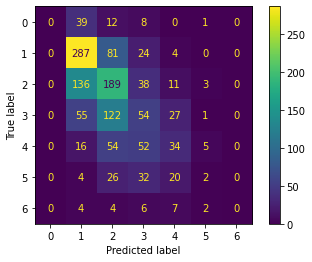

In [368]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a tfidf ngram

In [369]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scaled, y_train)

RandomForestClassifier()

In [370]:
y_pred_train = rf_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [371]:
y_pred = rf_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4183823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.72      0.60       396
           2       0.36      0.49      0.41       377
           3       0.32      0.24      0.27       259
           4       0.37      0.22      0.28       161
           5       0.17      0.02      0.04        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.37      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [372]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [373]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.24
Precision: 0.25
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


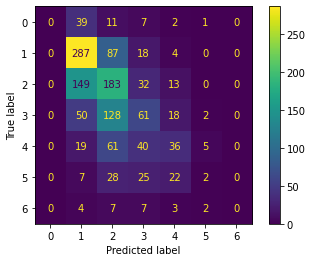

In [374]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a word frequency

In [375]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_scaled, y_train)

RandomForestClassifier()

In [376]:
y_pred_train = rf_model.predict(X_train_combined3_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [377]:
y_pred = rf_model.predict(X_test_combined3_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4279411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      0.69      0.61       396
           2       0.37      0.53      0.44       377
           3       0.32      0.26      0.29       259
           4       0.42      0.23      0.30       161
           5       0.19      0.04      0.06        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.26      0.25      0.24      1360
weighted avg       0.38      0.43      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [378]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [379]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.25
Precision: 0.26
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


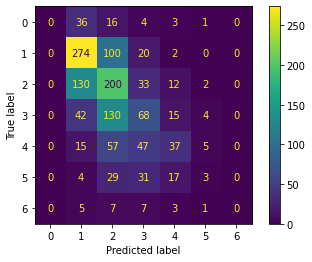

In [380]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a tfidf word frequency

In [381]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_scaled, y_train)

RandomForestClassifier()

In [382]:
y_pred_train = rf_model.predict(X_train_combined4_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [383]:
y_pred = rf_model.predict(X_test_combined4_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4198529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.69      0.60       396
           2       0.37      0.51      0.43       377
           3       0.28      0.22      0.25       259
           4       0.41      0.27      0.32       161
           5       0.33      0.06      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.27      0.25      0.24      1360
weighted avg       0.38      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [384]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [385]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.27
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


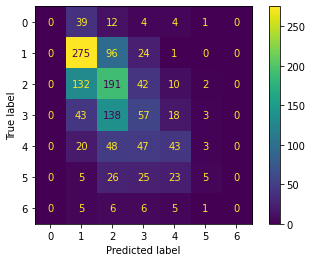

In [386]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim

In [387]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scal_out, y_train)

RandomForestClassifier()

In [388]:
y_pred_train = rf_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [389]:
y_pred = rf_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7286764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.21        60
           1       0.76      0.90      0.82       396
           2       0.72      0.82      0.76       377
           3       0.70      0.73      0.72       259
           4       0.65      0.66      0.66       161
           5       0.96      0.29      0.44        84
           6       0.00      0.00      0.00        23

    accuracy                           0.73      1360
   macro avg       0.69      0.50      0.52      1360
weighted avg       0.74      0.73      0.70      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [390]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [391]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.73
Recall: 0.50
Precision: 0.69
F1 Score: 0.52


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


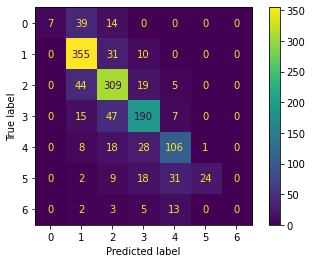

In [392]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a ngram

In [393]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scal_out, y_train)

RandomForestClassifier()

In [394]:
y_pred_train = rf_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [395]:
y_pred = rf_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5514705882352942
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.64      0.81      0.72       396
           2       0.52      0.71      0.60       377
           3       0.46      0.41      0.43       259
           4       0.46      0.32      0.38       161
           5       0.50      0.07      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.55      1360
   macro avg       0.37      0.33      0.32      1360
weighted avg       0.51      0.55      0.51      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [396]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [397]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.55
Recall: 0.33
Precision: 0.37
F1 Score: 0.32


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


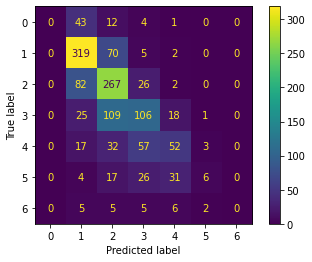

In [398]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a tfidf ngram

In [399]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scal_out, y_train)

RandomForestClassifier()

In [400]:
y_pred_train = rf_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [401]:
y_pred = rf_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.55
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.65      0.85      0.74       396
           2       0.49      0.67      0.57       377
           3       0.47      0.39      0.42       259
           4       0.50      0.35      0.41       161
           5       0.36      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.55      1360
   macro avg       0.35      0.33      0.32      1360
weighted avg       0.50      0.55      0.51      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [402]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [403]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.55
Recall: 0.33
Precision: 0.35
F1 Score: 0.32


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


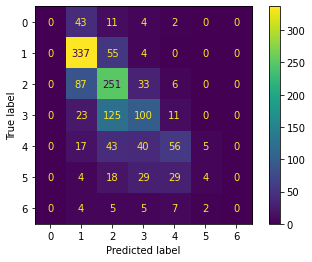

In [404]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a word frequency

In [405]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_scal_out, y_train)

RandomForestClassifier()

In [406]:
y_pred_train = rf_model.predict(X_train_combined3_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [407]:
y_pred = rf_model.predict(X_test_combined3_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5808823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.67      0.84      0.74       396
           2       0.53      0.72      0.61       377
           3       0.54      0.45      0.49       259
           4       0.50      0.39      0.44       161
           5       0.54      0.08      0.14        84
           6       0.00      0.00      0.00        23

    accuracy                           0.58      1360
   macro avg       0.40      0.35      0.35      1360
weighted avg       0.54      0.58      0.54      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [408]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [409]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.58
Recall: 0.35
Precision: 0.40
F1 Score: 0.35


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


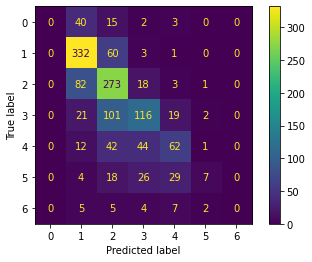

In [410]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a tfidf word frequency

In [411]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_scal_out, y_train)

RandomForestClassifier()

In [412]:
y_pred_train = rf_model.predict(X_train_combined4_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [413]:
y_pred = rf_model.predict(X_test_combined4_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5698529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.65      0.86      0.74       396
           2       0.54      0.71      0.61       377
           3       0.48      0.40      0.44       259
           4       0.51      0.35      0.42       161
           5       0.41      0.08      0.14        84
           6       0.00      0.00      0.00        23

    accuracy                           0.57      1360
   macro avg       0.37      0.34      0.34      1360
weighted avg       0.52      0.57      0.53      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [414]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [415]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.57
Recall: 0.34
Precision: 0.37
F1 Score: 0.34


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


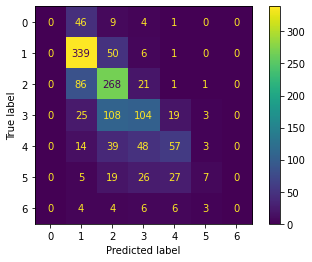

In [416]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [417]:
results_rf1 = pd.DataFrame(results_list1_rf)
print(results_rf1)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0              1.0       0.406618              1.0        0.374657   
1              1.0       0.402941              1.0        0.224355   
2              1.0       0.422794              1.0        0.256814   
3              1.0       0.411765              1.0        0.268103   
4              1.0       0.409559              1.0        0.266574   
5              1.0       0.712500              1.0        0.653416   
6              1.0       0.551471              1.0        0.361443   
7              1.0       0.538235              1.0        0.371390   
8              1.0       0.558824              1.0        0.361373   
9              1.0       0.575000              1.0        0.417215   
10             1.0       0.405882              1.0        0.388784   
11             1.0       0.416176              1.0        0.234726   
12             1.0       0.418382              1.0        0.247794   
13             1.0  

Podľa výsledkov po prvom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a škálovaním (bez textových reprezentácií). Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov aj podľa ostatných výsledkov. Pri pridaní textových reprezentácií k dátam sa často accuracy znížilo. Ked si porovnáme accuracy pri trenovacom a testovacom datasete je zrejme, že model sa pretrénoval, však toto je celkom bežné pri stromových algoritmoch a treba to ošetriť hyperparametrami. Zatiaľ tento model vykazuje vyššiu presnosť ako svc.

GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania

In [418]:
results_list1_gbm=[]

Trenovanie modelu

In [419]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

Predikovanie na trenovacich datach

In [420]:
y_pred_train = gbm_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.792875157629256
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82       132
           1       0.77      0.87      0.82       913
           2       0.71      0.82      0.76       848
           3       0.83      0.71      0.77       611
           4       0.90      0.71      0.79       401
           5       0.97      0.77      0.86       219
           6       1.00      0.94      0.97        48

    accuracy                           0.79      3172
   macro avg       0.88      0.79      0.83      3172
weighted avg       0.81      0.79      0.79      3172



Predikovanie na testovacich datach

In [421]:
y_pred = gbm_model.predict(X_test)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40441176470588236
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.03      0.05        60
           1       0.55      0.65      0.59       396
           2       0.38      0.45      0.41       377
           3       0.30      0.27      0.28       259
           4       0.34      0.27      0.30       161
           5       0.13      0.08      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.40      1360
   macro avg       0.26      0.25      0.25      1360
weighted avg       0.37      0.40      0.39      1360



In [422]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

Zobrazenie metrik

In [423]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.25
Precision: 0.26
F1 Score: 0.25


Vizualizácia výkonnosti modelu

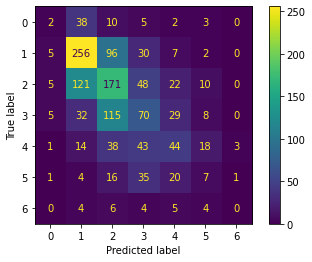

In [424]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania a ngram

In [425]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined, y_train)

GradientBoostingClassifier()

In [426]:
y_pred_train = gbm_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.900063051702396
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90       132
           1       0.88      0.96      0.92       913
           2       0.85      0.93      0.89       848
           3       0.93      0.88      0.91       611
           4       0.97      0.79      0.87       401
           5       0.99      0.82      0.90       219
           6       1.00      1.00      1.00        48

    accuracy                           0.90      3172
   macro avg       0.95      0.88      0.91      3172
weighted avg       0.91      0.90      0.90      3172



In [427]:
y_pred = gbm_model.predict(X_test_combined)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.43161764705882355
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.05      0.08        60
           1       0.60      0.70      0.65       396
           2       0.41      0.52      0.46       377
           3       0.32      0.24      0.28       259
           4       0.29      0.22      0.25       161
           5       0.17      0.12      0.14        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.28      0.27      0.26      1360
weighted avg       0.40      0.43      0.41      1360



In [428]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [429]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.28
F1 Score: 0.26


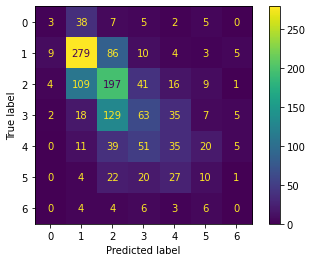

In [430]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()


GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania a tfidf ngram

In [431]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2, y_train)

GradientBoostingClassifier()

In [432]:
y_pred_train = gbm_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9464060529634301
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93       132
           1       0.95      0.97      0.96       913
           2       0.92      0.97      0.94       848
           3       0.95      0.95      0.95       611
           4       0.97      0.90      0.93       401
           5       0.98      0.87      0.92       219
           6       1.00      1.00      1.00        48

    accuracy                           0.95      3172
   macro avg       0.97      0.93      0.95      3172
weighted avg       0.95      0.95      0.95      3172



In [433]:
y_pred = gbm_model.predict(X_test_combined2)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4279411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.21      0.05      0.08        60
           1       0.60      0.69      0.64       396
           2       0.40      0.51      0.45       377
           3       0.32      0.27      0.29       259
           4       0.28      0.22      0.25       161
           5       0.16      0.10      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.28      0.26      0.26      1360
weighted avg       0.40      0.43      0.41      1360



In [434]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [435]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.26
Precision: 0.28
F1 Score: 0.26


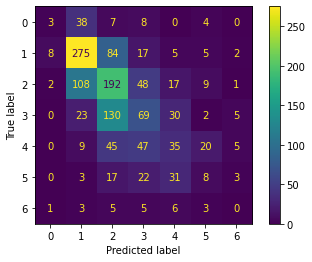

In [436]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania a word frequency

In [437]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3, y_train)

GradientBoostingClassifier()

In [438]:
y_pred_train = gbm_model.predict(X_train_combined3)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9047919293820933
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90       132
           1       0.88      0.97      0.92       913
           2       0.86      0.92      0.89       848
           3       0.93      0.87      0.90       611
           4       0.98      0.81      0.89       401
           5       0.99      0.86      0.92       219
           6       1.00      1.00      1.00        48

    accuracy                           0.90      3172
   macro avg       0.95      0.89      0.92      3172
weighted avg       0.91      0.90      0.90      3172



In [439]:
y_pred = gbm_model.predict(X_test_combined3)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4338235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.22      0.07      0.10        60
           1       0.59      0.71      0.64       396
           2       0.40      0.51      0.45       377
           3       0.33      0.27      0.30       259
           4       0.31      0.22      0.26       161
           5       0.15      0.08      0.11        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.29      0.27      0.27      1360
weighted avg       0.40      0.43      0.41      1360



In [440]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [441]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.29
F1 Score: 0.27


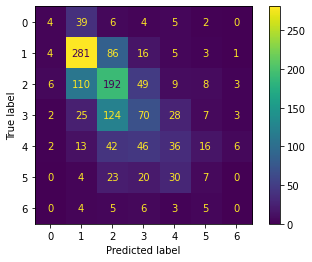

In [442]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania a word frequency

In [443]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4, y_train)

GradientBoostingClassifier()

In [444]:
y_pred_train = gbm_model.predict(X_train_combined4)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9274905422446406
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       132
           1       0.91      0.97      0.94       913
           2       0.89      0.95      0.92       848
           3       0.93      0.91      0.92       611
           4       0.98      0.88      0.92       401
           5       0.99      0.85      0.92       219
           6       1.00      1.00      1.00        48

    accuracy                           0.93      3172
   macro avg       0.96      0.91      0.93      3172
weighted avg       0.93      0.93      0.93      3172



In [445]:
y_pred = gbm_model.predict(X_test_combined4)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4323529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.05      0.07        60
           1       0.60      0.70      0.65       396
           2       0.42      0.52      0.46       377
           3       0.29      0.25      0.27       259
           4       0.32      0.24      0.27       161
           5       0.15      0.10      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.28      0.26      0.26      1360
weighted avg       0.40      0.43      0.41      1360



In [446]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [447]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.26
Precision: 0.28
F1 Score: 0.26


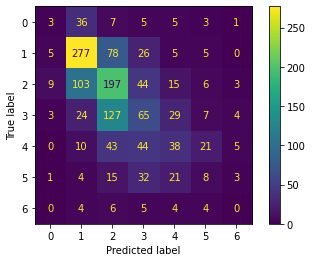

In [448]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov

In [449]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_out, y_train)

GradientBoostingClassifier()

In [450]:
y_pred_train = gbm_model.predict(X_train_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9735182849936949
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       132
           1       0.97      0.98      0.98       913
           2       0.95      0.98      0.96       848
           3       0.99      0.97      0.98       611
           4       1.00      0.96      0.98       401
           5       1.00      0.96      0.98       219
           6       1.00      1.00      1.00        48

    accuracy                           0.97      3172
   macro avg       0.99      0.97      0.98      3172
weighted avg       0.97      0.97      0.97      3172



In [451]:
y_pred = gbm_model.predict(X_test_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8382352941176471
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.94      0.48      0.64        60
           1       0.86      0.92      0.89       396
           2       0.82      0.90      0.85       377
           3       0.85      0.83      0.84       259
           4       0.80      0.83      0.81       161
           5       0.82      0.61      0.70        84
           6       0.90      0.39      0.55        23

    accuracy                           0.84      1360
   macro avg       0.85      0.71      0.75      1360
weighted avg       0.84      0.84      0.83      1360



In [452]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [453]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.84
Recall: 0.71
Precision: 0.85
F1 Score: 0.75


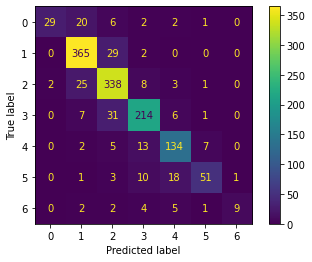

In [454]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a ngram

In [455]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_out, y_train)

GradientBoostingClassifier()

In [456]:
y_pred_train = gbm_model.predict(X_train_combined_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9867591424968474
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.98      1.00      0.99       913
           2       0.98      1.00      0.99       848
           3       0.99      0.98      0.99       611
           4       0.99      0.97      0.98       401
           5       1.00      0.98      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [457]:
y_pred = gbm_model.predict(X_test_combined_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8198529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.42      0.59        60
           1       0.86      0.93      0.89       396
           2       0.81      0.89      0.85       377
           3       0.80      0.82      0.81       259
           4       0.79      0.76      0.78       161
           5       0.76      0.57      0.65        84
           6       0.36      0.17      0.24        23

    accuracy                           0.82      1360
   macro avg       0.77      0.65      0.69      1360
weighted avg       0.82      0.82      0.81      1360



In [458]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [459]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.82
Recall: 0.65
Precision: 0.77
F1 Score: 0.69


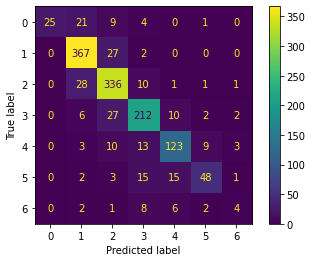

In [460]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a tfidf ngram

In [461]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_out, y_train)

GradientBoostingClassifier()

In [462]:
y_pred_train = gbm_model.predict(X_train_combined2_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.994640605296343
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       0.99      1.00      1.00       913
           2       0.99      1.00      0.99       848
           3       1.00      1.00      1.00       611
           4       1.00      0.98      0.99       401
           5       1.00      0.99      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       1.00      0.99      1.00      3172
weighted avg       0.99      0.99      0.99      3172



In [463]:
y_pred = gbm_model.predict(X_test_combined2_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8029411764705883
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57        60
           1       0.84      0.92      0.88       396
           2       0.79      0.87      0.83       377
           3       0.76      0.78      0.77       259
           4       0.77      0.75      0.76       161
           5       0.82      0.60      0.69        84
           6       0.36      0.17      0.24        23

    accuracy                           0.80      1360
   macro avg       0.77      0.64      0.68      1360
weighted avg       0.80      0.80      0.79      1360



In [464]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [465]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.64
Precision: 0.77
F1 Score: 0.68


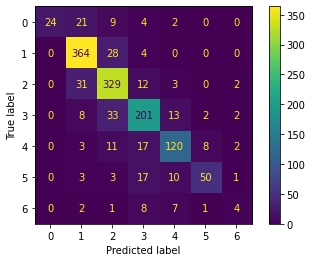

In [466]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a word frequency

In [467]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_out, y_train)

GradientBoostingClassifier()

In [468]:
y_pred_train = gbm_model.predict(X_train_combined3_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.987389659520807
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       0.98      1.00      0.99       913
           2       0.98      0.99      0.98       848
           3       0.99      0.98      0.99       611
           4       1.00      0.96      0.98       401
           5       1.00      0.99      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [469]:
y_pred = gbm_model.predict(X_test_combined3_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8029411764705883
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.92      0.40      0.56        60
           1       0.83      0.91      0.87       396
           2       0.81      0.87      0.84       377
           3       0.79      0.78      0.79       259
           4       0.77      0.78      0.78       161
           5       0.72      0.55      0.62        84
           6       0.33      0.17      0.23        23

    accuracy                           0.80      1360
   macro avg       0.74      0.64      0.67      1360
weighted avg       0.80      0.80      0.79      1360



In [470]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [471]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.64
Precision: 0.74
F1 Score: 0.67


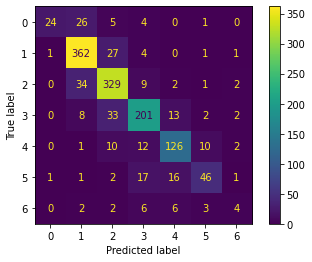

In [472]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a tfidf word frequency

In [473]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_out, y_train)

GradientBoostingClassifier()

In [474]:
y_pred_train = gbm_model.predict(X_train_combined4_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9943253467843631
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       0.99      1.00      1.00       913
           2       0.99      1.00      0.99       848
           3       1.00      0.99      0.99       611
           4       1.00      0.99      0.99       401
           5       1.00      0.98      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [475]:
y_pred = gbm_model.predict(X_test_combined4_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8014705882352942
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.96      0.42      0.58        60
           1       0.84      0.91      0.87       396
           2       0.80      0.88      0.84       377
           3       0.79      0.79      0.79       259
           4       0.75      0.76      0.76       161
           5       0.75      0.50      0.60        84
           6       0.50      0.22      0.30        23

    accuracy                           0.80      1360
   macro avg       0.77      0.64      0.68      1360
weighted avg       0.80      0.80      0.79      1360



In [476]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [477]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.64
Precision: 0.77
F1 Score: 0.68


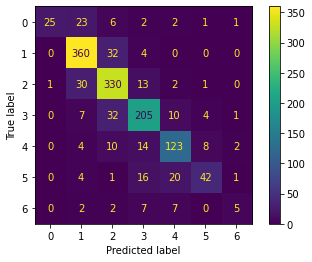

In [478]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim

In [479]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [480]:
y_pred_train = gbm_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7916141235813366
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.66      0.79       132
           1       0.77      0.87      0.82       913
           2       0.71      0.82      0.76       848
           3       0.81      0.71      0.76       611
           4       0.91      0.70      0.79       401
           5       0.97      0.76      0.85       219
           6       1.00      0.98      0.99        48

    accuracy                           0.79      3172
   macro avg       0.88      0.79      0.82      3172
weighted avg       0.81      0.79      0.79      3172



In [481]:
y_pred = gbm_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40955882352941175
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.16      0.05      0.08        60
           1       0.55      0.65      0.60       396
           2       0.39      0.48      0.43       377
           3       0.30      0.27      0.28       259
           4       0.35      0.27      0.30       161
           5       0.11      0.06      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.26      0.25      0.25      1360
weighted avg       0.38      0.41      0.39      1360



In [482]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [483]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.25
Precision: 0.26
F1 Score: 0.25


GRADIENT BOOSTING CLASSIFIER - so skalovanim a ngram

In [484]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scaled, y_train)

GradientBoostingClassifier()

In [485]:
y_pred_train = gbm_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9044766708701135
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90       132
           1       0.88      0.96      0.92       913
           2       0.85      0.94      0.89       848
           3       0.93      0.89      0.91       611
           4       0.97      0.81      0.88       401
           5       1.00      0.80      0.89       219
           6       1.00      0.98      0.99        48

    accuracy                           0.90      3172
   macro avg       0.95      0.88      0.91      3172
weighted avg       0.91      0.90      0.90      3172



In [486]:
y_pred = gbm_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.43161764705882355
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.20      0.05      0.08        60
           1       0.60      0.69      0.64       396
           2       0.41      0.53      0.46       377
           3       0.34      0.27      0.30       259
           4       0.26      0.19      0.22       161
           5       0.18      0.12      0.14        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.28      0.26      0.26      1360
weighted avg       0.40      0.43      0.41      1360



In [487]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [488]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.26
Precision: 0.28
F1 Score: 0.26


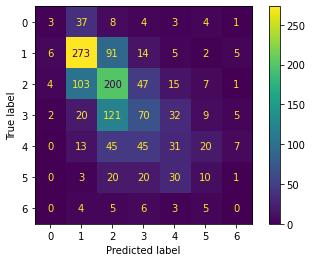

In [489]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a tfidf ngram

In [490]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scaled, y_train)

GradientBoostingClassifier()

In [491]:
y_pred_train = gbm_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9470365699873896
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       132
           1       0.94      0.98      0.96       913
           2       0.92      0.96      0.94       848
           3       0.94      0.95      0.95       611
           4       0.98      0.90      0.94       401
           5       0.98      0.88      0.93       219
           6       1.00      1.00      1.00        48

    accuracy                           0.95      3172
   macro avg       0.97      0.93      0.95      3172
weighted avg       0.95      0.95      0.95      3172



In [492]:
y_pred = gbm_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42720588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.31      0.08      0.13        60
           1       0.62      0.70      0.66       396
           2       0.40      0.50      0.45       377
           3       0.28      0.26      0.27       259
           4       0.29      0.21      0.24       161
           5       0.14      0.08      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.29      0.26      0.26      1360
weighted avg       0.40      0.43      0.41      1360



In [493]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [494]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.26
Precision: 0.29
F1 Score: 0.26


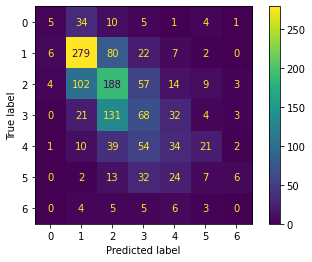

In [495]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a word frequency

In [496]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_scaled, y_train)

GradientBoostingClassifier()

In [497]:
y_pred_train = gbm_model.predict(X_train_combined3_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8988020176544766
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       132
           1       0.88      0.96      0.92       913
           2       0.84      0.93      0.88       848
           3       0.92      0.86      0.89       611
           4       0.98      0.82      0.89       401
           5       1.00      0.84      0.91       219
           6       1.00      1.00      1.00        48

    accuracy                           0.90      3172
   macro avg       0.95      0.89      0.91      3172
weighted avg       0.90      0.90      0.90      3172



In [498]:
y_pred = gbm_model.predict(X_test_combined3_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.43308823529411766
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.24      0.08      0.12        60
           1       0.59      0.68      0.64       396
           2       0.41      0.53      0.46       377
           3       0.32      0.27      0.29       259
           4       0.33      0.24      0.28       161
           5       0.17      0.10      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.29      0.27      0.27      1360
weighted avg       0.41      0.43      0.41      1360



In [499]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [500]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.29
F1 Score: 0.27


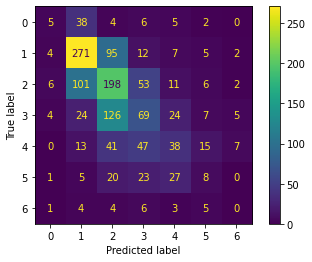

In [501]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a tfidf word frequency

In [502]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_scaled, y_train)

GradientBoostingClassifier()

In [503]:
y_pred_train = gbm_model.predict(X_train_combined4_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9259142496847415
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       132
           1       0.91      0.97      0.94       913
           2       0.90      0.95      0.92       848
           3       0.94      0.90      0.92       611
           4       0.96      0.87      0.92       401
           5       0.99      0.87      0.92       219
           6       1.00      1.00      1.00        48

    accuracy                           0.93      3172
   macro avg       0.96      0.91      0.93      3172
weighted avg       0.93      0.93      0.93      3172



In [504]:
y_pred = gbm_model.predict(X_test_combined4_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4389705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.15      0.05      0.07        60
           1       0.60      0.71      0.65       396
           2       0.42      0.53      0.47       377
           3       0.31      0.25      0.28       259
           4       0.31      0.24      0.27       161
           5       0.16      0.11      0.13        84
           6       0.00      0.00      0.00        23

    accuracy                           0.44      1360
   macro avg       0.28      0.27      0.27      1360
weighted avg       0.40      0.44      0.42      1360



In [505]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [506]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.44
Recall: 0.27
Precision: 0.28
F1 Score: 0.27


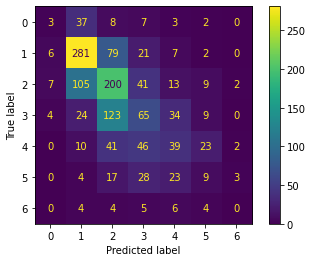

In [507]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim

In [508]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scal_out, y_train)

GradientBoostingClassifier()

In [509]:
y_pred_train = gbm_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9735182849936949
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       132
           1       0.97      0.98      0.98       913
           2       0.95      0.98      0.96       848
           3       0.99      0.97      0.98       611
           4       1.00      0.96      0.98       401
           5       1.00      0.96      0.98       219
           6       1.00      1.00      1.00        48

    accuracy                           0.97      3172
   macro avg       0.99      0.97      0.98      3172
weighted avg       0.97      0.97      0.97      3172



In [510]:
y_pred = gbm_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8375
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.48      0.63        60
           1       0.86      0.92      0.89       396
           2       0.82      0.90      0.85       377
           3       0.85      0.83      0.84       259
           4       0.80      0.83      0.81       161
           5       0.82      0.61      0.70        84
           6       0.90      0.39      0.55        23

    accuracy                           0.84      1360
   macro avg       0.85      0.71      0.75      1360
weighted avg       0.84      0.84      0.83      1360



In [511]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [512]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.84
Recall: 0.71
Precision: 0.85
F1 Score: 0.75


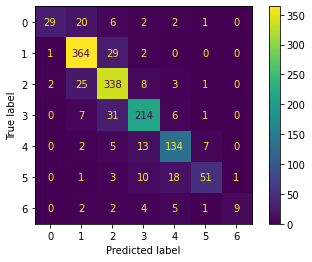

In [513]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim a ngram

In [514]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scal_out, y_train)

GradientBoostingClassifier()

In [515]:
y_pred_train = gbm_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9867591424968474
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.98      1.00      0.99       913
           2       0.98      1.00      0.99       848
           3       0.99      0.98      0.99       611
           4       0.99      0.97      0.98       401
           5       1.00      0.98      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [516]:
y_pred = gbm_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8176470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60        60
           1       0.86      0.93      0.89       396
           2       0.82      0.89      0.85       377
           3       0.80      0.82      0.81       259
           4       0.78      0.76      0.77       161
           5       0.73      0.54      0.62        84
           6       0.27      0.13      0.18        23

    accuracy                           0.82      1360
   macro avg       0.75      0.64      0.67      1360
weighted avg       0.81      0.82      0.81      1360



In [517]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [518]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.82
Recall: 0.64
Precision: 0.75
F1 Score: 0.67


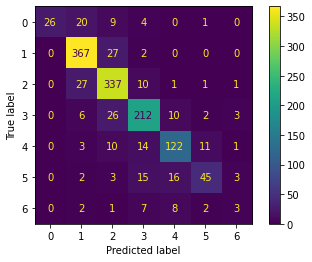

In [519]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim a tfidf ngram

In [520]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scal_out, y_train)

GradientBoostingClassifier()

In [521]:
y_pred_train = gbm_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9952711223203027
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       0.99      1.00      0.99       848
           3       1.00      1.00      1.00       611
           4       1.00      0.98      0.99       401
           5       1.00      0.99      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      0.99      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [522]:
y_pred = gbm_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8022058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.96      0.43      0.60        60
           1       0.84      0.90      0.87       396
           2       0.79      0.88      0.83       377
           3       0.80      0.78      0.79       259
           4       0.76      0.76      0.76       161
           5       0.80      0.56      0.66        84
           6       0.31      0.22      0.26        23

    accuracy                           0.80      1360
   macro avg       0.75      0.65      0.68      1360
weighted avg       0.80      0.80      0.80      1360



In [523]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [524]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.65
Precision: 0.75
F1 Score: 0.68


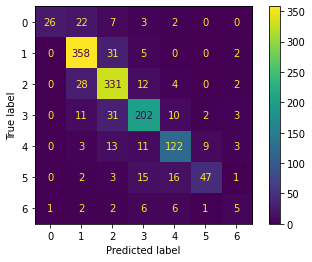

In [525]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim a word frequency

In [526]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_scal_out, y_train)

GradientBoostingClassifier()

In [527]:
y_pred_train = gbm_model.predict(X_train_combined3_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.987389659520807
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       0.98      1.00      0.99       913
           2       0.98      0.99      0.98       848
           3       0.99      0.98      0.99       611
           4       1.00      0.96      0.98       401
           5       1.00      0.99      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [528]:
y_pred = gbm_model.predict(X_test_combined3_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8022058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.92      0.40      0.56        60
           1       0.83      0.92      0.87       396
           2       0.81      0.87      0.84       377
           3       0.79      0.78      0.78       259
           4       0.79      0.78      0.78       161
           5       0.72      0.56      0.63        84
           6       0.23      0.13      0.17        23

    accuracy                           0.80      1360
   macro avg       0.73      0.63      0.66      1360
weighted avg       0.80      0.80      0.79      1360



In [529]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [530]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.63
Precision: 0.73
F1 Score: 0.66


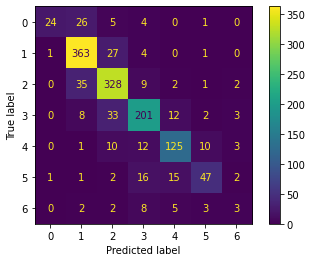

In [531]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim a tfidf word frequency

In [532]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_scal_out, y_train)

GradientBoostingClassifier()

In [533]:
y_pred_train = gbm_model.predict(X_train_combined4_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9943253467843631
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       0.99      1.00      1.00       913
           2       0.99      1.00      0.99       848
           3       1.00      0.99      1.00       611
           4       1.00      0.99      0.99       401
           5       1.00      0.98      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [534]:
y_pred = gbm_model.predict(X_test_combined4_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8095588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.96      0.38      0.55        60
           1       0.85      0.91      0.88       396
           2       0.79      0.89      0.84       377
           3       0.81      0.78      0.79       259
           4       0.76      0.78      0.77       161
           5       0.80      0.57      0.67        84
           6       0.50      0.26      0.34        23

    accuracy                           0.81      1360
   macro avg       0.78      0.65      0.69      1360
weighted avg       0.81      0.81      0.80      1360



In [535]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [536]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.81
Recall: 0.65
Precision: 0.78
F1 Score: 0.69


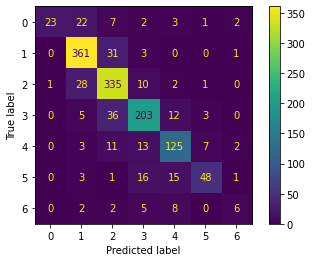

In [537]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [538]:
results_gbm1 = pd.DataFrame(results_list1_gbm)
print(results_gbm1)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0         0.792875       0.404412         0.881709        0.257571   
1         0.900063       0.431618         0.945275        0.278752   
2         0.946406       0.427941         0.966882        0.281711   
3         0.904792       0.433824         0.948358        0.286023   
4         0.927491       0.432353         0.958397        0.275886   
5         0.973518       0.838235         0.985767        0.854698   
6         0.986759       0.819853         0.992540        0.770165   
7         0.994641       0.802941         0.996820        0.765577   
8         0.987390       0.802941         0.993043        0.740444   
9         0.994325       0.801471         0.996860        0.769031   
10        0.791614       0.409559         0.880921        0.264230   
11        0.904477       0.431618         0.948222        0.283794   
12        0.947037       0.427206         0.967245        0.291594   
13        0.898802  

Podľa výsledkov po prvom testovani GBM môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi (bez textových reprezentácií). Je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. Pri pohľade na trenovacú a testovacu accuracy to vyzerá, že model je trochu pretrénovaný, však menej ako pri random forest, to sa neskôr pokúsime zlepšiť. Tento model má zatiaľ najvyššiu presnosť.

VYBER CRT

In [539]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 3462 to 4521
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           3172 non-null   float64
 1   average_urls                            3172 non-null   float64
 2   average_mentions                        3172 non-null   float64
 3   average_hashtags                        3172 non-null   float64
 4   average_digits                          3172 non-null   float64
 5   average_uppercase                       3172 non-null   float64
 6   average_lowercase                       3172 non-null   float64
 7   average_non_alpha                       3172 non-null   float64
 8   average_quotes_per_tweet                3172 non-null   float64
 9   average_apostrophe_per_tweet            3172 non-null   float64
 10  average_punctuation_per_tweet           3172 non-null   f

SVC - FORWARD SELECTION - najdenie najlepšej črty pre accuracy  modelu, následne hľadanie dalšej najlepšej ktorá pridá na accuracy...

In [540]:
model = SVC()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train.iloc[:, candidate_feature_indices]
        X_test_selected = X_test.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature

     # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_svc = X_train.loc[:, selected_features].copy()
X_test_svc = X_test.loc[:, selected_features].copy()



Pridaný prvok average_non_alpha do modelu, presnosť: 0.3639705882352941
Pridaný prvok avg_chars_per_tweet do modelu, presnosť: 0.3713235294117647
Pridaný prvok average_uppercase do modelu, presnosť: 0.3735294117647059
Pridaný prvok interrogative_percent do modelu, presnosť: 0.375
Vybrané prvky: ['average_non_alpha', 'avg_chars_per_tweet', 'average_uppercase', 'interrogative_percent']


Zistila som, že najlepšie výsledky mi dávala metoda RFE, takže dalej som už iba s ňou pokračovala

SVC - ošetrený outlieri

In [541]:
model = SVC()

features = list(X_train_out.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Testovanie pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_out.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_out.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_out.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature

    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_out_svc = X_train_out.loc[:, selected_features].copy()
X_test_out_svc = X_test_out.loc[:, selected_features].copy()

Pridaný prvok avg_dobj_per_tweet do modelu, presnosť: 0.44485294117647056
Pridaný prvok avg_advmod_per_tweet do modelu, presnosť: 0.4514705882352941
Pridaný prvok avg_amod_per_tweet do modelu, presnosť: 0.45808823529411763
Pridaný prvok avg_aux_per_tweet do modelu, presnosť: 0.46544117647058825
Vybrané prvky: ['avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet', 'avg_aux_per_tweet']


SVC-scalovanie

In [542]:
model = SVC()

features = list(X_train_scaled.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Testovanie pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_scaled.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_scaled.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_scaled.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature

    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
         break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_scaled_svc = X_train_scaled.loc[:, selected_features].copy()
X_test_scaled_svc = X_test_scaled.loc[:, selected_features].copy()

Pridaný prvok average_non_alpha do modelu, presnosť: 0.3639705882352941
Pridaný prvok avg_chars_per_tweet do modelu, presnosť: 0.3713235294117647
Pridaný prvok average_uppercase do modelu, presnosť: 0.3735294117647059
Pridaný prvok avg_words_per_sentence do modelu, presnosť: 0.37426470588235294
Vybrané prvky: ['average_non_alpha', 'avg_chars_per_tweet', 'average_uppercase', 'avg_words_per_sentence']


SVC -scalovanie a ošetreny outlieri

In [543]:
model = SVC()

features = list(X_train_scal_out.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Testovanie pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_scal_out.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_scal_out.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_scal_out.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature

    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_scal_out_svc = X_train_scal_out.loc[:, selected_features].copy()
X_test_scal_out_svc = X_test_scal_out.loc[:, selected_features].copy()

Pridaný prvok avg_dobj_per_tweet do modelu, presnosť: 0.44485294117647056
Pridaný prvok avg_advmod_per_tweet do modelu, presnosť: 0.4514705882352941
Pridaný prvok avg_amod_per_tweet do modelu, presnosť: 0.45808823529411763
Pridaný prvok avg_aux_per_tweet do modelu, presnosť: 0.46544117647058825
Vybrané prvky: ['avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet', 'avg_aux_per_tweet']


RANDOM FOREST - BEZ OšETRENIA OUTLIEROV A SKALOVANIA

In [544]:
model = RandomForestClassifier()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train.iloc[:, candidate_feature_indices]
        X_test_selected = X_test.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature
    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_rf = X_train.loc[:, selected_features].copy()
X_test_rf = X_test.loc[:, selected_features].copy()

Pridaný prvok avg_words_per_tweet do modelu, presnosť: 0.26323529411764707
Pridaný prvok average_punctuation_per_tweet do modelu, presnosť: 0.32426470588235295
Pridaný prvok average_emoji do modelu, presnosť: 0.3573529411764706
Pridaný prvok average_repeats_per_tweet do modelu, presnosť: 0.3698529411764706
Pridaný prvok average_mentions do modelu, presnosť: 0.3816176470588235
Pridaný prvok average_uppercase do modelu, presnosť: 0.3911764705882353
Pridaný prvok average_quotes_per_tweet do modelu, presnosť: 0.4073529411764706
Pridaný prvok average_cognitive_word_per_tweet do modelu, presnosť: 0.40808823529411764
Pridaný prvok avg_words_per_sentence do modelu, presnosť: 0.41102941176470587
Pridaný prvok avg_nsubj_per_tweet do modelu, presnosť: 0.4264705882352941
Vybrané prvky: ['avg_words_per_tweet', 'average_punctuation_per_tweet', 'average_emoji', 'average_repeats_per_tweet', 'average_mentions', 'average_uppercase', 'average_quotes_per_tweet', 'average_cognitive_word_per_tweet', 'avg_wo

RANDOM FOREST - S OšETRENIM OUTLIEROV 

In [545]:
model = RandomForestClassifier()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train_out.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_out.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_out.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_out.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature
    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_out_rf = X_train_out.loc[:, selected_features].copy()
X_test_out_rf = X_test_out.loc[:, selected_features].copy()

Pridaný prvok avg_dobj_per_tweet do modelu, presnosť: 0.44338235294117645
Pridaný prvok average_particle_per_tweet do modelu, presnosť: 0.575
Pridaný prvok imperative_percent do modelu, presnosť: 0.6441176470588236
Pridaný prvok average_nouns_per_tweet do modelu, presnosť: 0.6838235294117647
Pridaný prvok average_adverb_per_tweet do modelu, presnosť: 0.7044117647058824
Pridaný prvok avg_advmod_per_tweet do modelu, presnosť: 0.7264705882352941
Pridaný prvok avg_nsubj_per_tweet do modelu, presnosť: 0.7397058823529412
Pridaný prvok avg_chars_per_tweet do modelu, presnosť: 0.7463235294117647
Vybrané prvky: ['avg_dobj_per_tweet', 'average_particle_per_tweet', 'imperative_percent', 'average_nouns_per_tweet', 'average_adverb_per_tweet', 'avg_advmod_per_tweet', 'avg_nsubj_per_tweet', 'avg_chars_per_tweet']


RANDOM FOREST - SKALOVANIE

In [546]:
model = RandomForestClassifier()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train_scaled.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_scaled.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_scaled.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_scaled.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature
    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_scaled_rf = X_train_scaled.loc[:, selected_features].copy()
X_test_scaled_rf = X_test_scaled.loc[:, selected_features].copy()


Pridaný prvok avg_words_per_tweet do modelu, presnosť: 0.2639705882352941
Pridaný prvok average_punctuation_per_tweet do modelu, presnosť: 0.3338235294117647
Pridaný prvok declarative_percent do modelu, presnosť: 0.35808823529411765
Pridaný prvok average_repeats_per_tweet do modelu, presnosť: 0.3764705882352941
Pridaný prvok average_word_length do modelu, presnosť: 0.3911764705882353
Pridaný prvok average_quotes_per_tweet do modelu, presnosť: 0.4051470588235294
Pridaný prvok avg_advmod_per_tweet do modelu, presnosť: 0.40955882352941175
Vybrané prvky: ['avg_words_per_tweet', 'average_punctuation_per_tweet', 'declarative_percent', 'average_repeats_per_tweet', 'average_word_length', 'average_quotes_per_tweet', 'avg_advmod_per_tweet']


RANDOM FOREST - S OšETRENIM OUTLIEROV A SKALOVANIM

In [547]:
model = RandomForestClassifier()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train_scal_out.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_scal_out.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_scal_out.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_scal_out.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature
    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_scal_out_rf = X_train_scal_out.loc[:, selected_features].copy()
X_test_scal_out_rf = X_test_scal_out.loc[:, selected_features].copy()

Pridaný prvok avg_dobj_per_tweet do modelu, presnosť: 0.4375
Pridaný prvok average_particle_per_tweet do modelu, presnosť: 0.5860294117647059
Pridaný prvok imperative_percent do modelu, presnosť: 0.65
Pridaný prvok avg_commas do modelu, presnosť: 0.6823529411764706
Pridaný prvok average_verb_per_tweet do modelu, presnosť: 0.7022058823529411
Pridaný prvok average_nouns_per_tweet do modelu, presnosť: 0.7088235294117647
Vybrané prvky: ['avg_dobj_per_tweet', 'average_particle_per_tweet', 'imperative_percent', 'avg_commas', 'average_verb_per_tweet', 'average_nouns_per_tweet']


GRADIENT BOOSTING CLASSIFIER - BEZ OšETRENIA OUTLIEROV A SKALOVANIA

In [548]:
model = GradientBoostingClassifier()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train.iloc[:, candidate_feature_indices]
        X_test_selected = X_test.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature
    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_gbm = X_train.loc[:, selected_features].copy()
X_test_gbm = X_test.loc[:, selected_features].copy()

Pridaný prvok average_lowercase do modelu, presnosť: 0.34411764705882353
Pridaný prvok average_negation_per_tweet do modelu, presnosť: 0.3713235294117647
Pridaný prvok avg_sentences_per_tweet do modelu, presnosť: 0.375
Pridaný prvok average_emoji do modelu, presnosť: 0.3779411764705882
Pridaný prvok average_particle_per_tweet do modelu, presnosť: 0.3860294117647059
Pridaný prvok average_negative_per_tweet do modelu, presnosť: 0.3948529411764706
Pridaný prvok interrogative_percent do modelu, presnosť: 0.40441176470588236
Pridaný prvok average_non_alpha do modelu, presnosť: 0.40808823529411764
Pridaný prvok avg_nsubj_per_tweet do modelu, presnosť: 0.4117647058823529
Pridaný prvok average_sensory_word_per_tweet do modelu, presnosť: 0.4183823529411765
Pridaný prvok avg_amod_per_tweet do modelu, presnosť: 0.4323529411764706
Vybrané prvky: ['average_lowercase', 'average_negation_per_tweet', 'avg_sentences_per_tweet', 'average_emoji', 'average_particle_per_tweet', 'average_negative_per_tweet'

GRADIENT BOOSTING CLASSIFIER - S OšETRENIM OUTLIEROV 

In [549]:
model = GradientBoostingClassifier()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train_out.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_out.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_out.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_out.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature

    # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_out_gbm = X_train_out.loc[:, selected_features].copy()
X_test_out_gbm = X_test_out.loc[:, selected_features].copy()

Pridaný prvok avg_dobj_per_tweet do modelu, presnosť: 0.49779411764705883
Pridaný prvok average_particle_per_tweet do modelu, presnosť: 0.6286764705882353
Pridaný prvok declarative_percent do modelu, presnosť: 0.7088235294117647
Pridaný prvok interrogative_percent do modelu, presnosť: 0.7514705882352941
Pridaný prvok average_numeral_per_tweet do modelu, presnosť: 0.7735294117647059
Pridaný prvok avg_commas do modelu, presnosť: 0.8
Pridaný prvok avg_advmod_per_tweet do modelu, presnosť: 0.8235294117647058
Pridaný prvok other_ending_percent do modelu, presnosť: 0.8360294117647059
Pridaný prvok average_pronoun_per_tweet do modelu, presnosť: 0.8441176470588235
Pridaný prvok average_adjective_per_tweet do modelu, presnosť: 0.850735294117647
Pridaný prvok average_conjunction_per_tweet do modelu, presnosť: 0.8602941176470589
Vybrané prvky: ['avg_dobj_per_tweet', 'average_particle_per_tweet', 'declarative_percent', 'interrogative_percent', 'average_numeral_per_tweet', 'avg_commas', 'avg_advmod

GRADIENT BOOSTING CLASSIFIER - SKALOVANIE

In [550]:
model = GradientBoostingClassifier()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train_scaled.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_scaled.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_scaled.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_scaled.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature
    
     # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_scaled_gbm = X_train_scaled.loc[:, selected_features].copy()
X_test_scaled_gbm = X_test_scaled.loc[:, selected_features].copy()

Pridaný prvok average_lowercase do modelu, presnosť: 0.34411764705882353
Pridaný prvok average_negation_per_tweet do modelu, presnosť: 0.37279411764705883
Pridaný prvok avg_sentences_per_tweet do modelu, presnosť: 0.375
Pridaný prvok average_adjective_per_tweet do modelu, presnosť: 0.37941176470588234
Pridaný prvok average_repeats_per_tweet do modelu, presnosť: 0.38529411764705884
Pridaný prvok average_emoji do modelu, presnosť: 0.3941176470588235
Pridaný prvok average_word_length do modelu, presnosť: 0.39926470588235297
Pridaný prvok avg_amod_per_tweet do modelu, presnosť: 0.4
Pridaný prvok average_punctuation_per_tweet do modelu, presnosť: 0.40661764705882353
Pridaný prvok other_ending_percent do modelu, presnosť: 0.4198529411764706
Vybrané prvky: ['average_lowercase', 'average_negation_per_tweet', 'avg_sentences_per_tweet', 'average_adjective_per_tweet', 'average_repeats_per_tweet', 'average_emoji', 'average_word_length', 'avg_amod_per_tweet', 'average_punctuation_per_tweet', 'other

GRADIENT BOOSTING CLASSIFIER - S OšETRENIM OUTLIEROV A SKALOVANIM

In [551]:
model = GradientBoostingClassifier()

# Získajte zoznam všetkých vlastností v trénovacom datasete
features = list(X_train_scal_out.columns)
selected_features = []
best_acc = 0

# Proces postupného pridávania prvkov (Forward Selection)
while features:
    best_feature = None
    for feature in features:
        # Skúška pridania súčasného prvku do zoznamu vybraných prvkov
        candidate_features = selected_features + [feature]
        candidate_feature_indices = [X_train_scal_out.columns.get_loc(feat) for feat in candidate_features]

        # Vytvorenie trénovacieho a testovacieho datasetu len so zvolenými prvkami
        X_train_selected = X_train_scal_out.iloc[:, candidate_feature_indices]
        X_test_selected = X_test_scal_out.iloc[:, candidate_feature_indices]

        # Trénovanie modelu na vybraných prvkoch
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        acc = accuracy_score(y_test, predictions)

        # Ak je nová presnosť vyššia ako najlepšia doterajšia, aktualizuj najlepšiu presnosť a ulož prvok
        if acc > best_acc:
            best_acc = acc
            best_feature = feature
        
     # Ak bol nájdený lepší prvok, pridaj ho do zoznamu vybraných prvkov
    if best_feature:
        selected_features.append(best_feature)
        features.remove(best_feature)
        print(f"Pridaný prvok {best_feature} do modelu, presnosť: {best_acc}")
    else:
        break  # Ak žiaden prvok nezlepšil model, ukonči cyklus

# Výpis a uloženie vybraných prvkov pre konečný model
print(f"Vybrané prvky: {selected_features}")
X_train_scal_out_gbm = X_train_scal_out.loc[:, selected_features].copy()
X_test_scal_out_gbm = X_test_scal_out.loc[:, selected_features].copy()

Pridaný prvok avg_dobj_per_tweet do modelu, presnosť: 0.49779411764705883
Pridaný prvok average_particle_per_tweet do modelu, presnosť: 0.6264705882352941
Pridaný prvok declarative_percent do modelu, presnosť: 0.7088235294117647
Pridaný prvok interrogative_percent do modelu, presnosť: 0.7514705882352941
Pridaný prvok average_numeral_per_tweet do modelu, presnosť: 0.774264705882353
Pridaný prvok avg_commas do modelu, presnosť: 0.8
Pridaný prvok avg_advmod_per_tweet do modelu, presnosť: 0.8235294117647058
Pridaný prvok other_ending_percent do modelu, presnosť: 0.8375
Pridaný prvok average_pronoun_per_tweet do modelu, presnosť: 0.8419117647058824
Pridaný prvok average_adjective_per_tweet do modelu, presnosť: 0.85
Pridaný prvok average_conjunction_per_tweet do modelu, presnosť: 0.8602941176470589
Vybrané prvky: ['avg_dobj_per_tweet', 'average_particle_per_tweet', 'declarative_percent', 'interrogative_percent', 'average_numeral_per_tweet', 'avg_commas', 'avg_advmod_per_tweet', 'other_ending

Spájanie nových datasetov s n-grammi/slovami

In [552]:

X_train_combined_svc = hstack([X_train_svc, ngram_train])
X_test_combined_svc = hstack([X_test_svc, ngram_test])
X_train_combined2_svc = hstack([X_train_svc, ngram_train_tfidf])
X_test_combined2_svc = hstack([X_test_svc, ngram_test_tfidf])
X_train_combined3_svc = hstack([X_train_svc, wfreq_train])
X_test_combined3_svc = hstack([X_test_svc, wfreq_test])
X_train_combined4_svc = hstack([X_train_svc, wfreq_train_tfidf])
X_test_combined4_svc = hstack([X_test_svc, wfreq_test_tfidf])

X_train_combined_rf = hstack([X_train_rf, ngram_train])
X_test_combined_rf = hstack([X_test_rf, ngram_test])
X_train_combined2_rf = hstack([X_train_rf, ngram_train_tfidf])
X_test_combined2_rf = hstack([X_test_rf, ngram_test_tfidf])
X_train_combined3_rf = hstack([X_train_rf, wfreq_train])
X_test_combined3_rf = hstack([X_test_rf, wfreq_test])
X_train_combined4_rf = hstack([X_train_rf, wfreq_train_tfidf])
X_test_combined4_rf = hstack([X_test_rf, wfreq_test_tfidf])

X_train_combined_gbm = hstack([X_train_gbm, ngram_train])
X_test_combined_gbm = hstack([X_test_gbm, ngram_test])
X_train_combined2_gbm = hstack([X_train_gbm, ngram_train_tfidf])
X_test_combined2_gbm = hstack([X_test_gbm, ngram_test_tfidf])
X_train_combined3_gbm = hstack([X_train_gbm, wfreq_train])
X_test_combined3_gbm = hstack([X_test_gbm, wfreq_test])
X_train_combined4_gbm = hstack([X_train_gbm, wfreq_train_tfidf])
X_test_combined4_gbm = hstack([X_test_gbm, wfreq_test_tfidf])



X_train_combined_out_svc = hstack([X_train_out_svc, ngram_train])
X_test_combined_out_svc = hstack([X_test_out_svc, ngram_test])
X_train_combined2_out_svc = hstack([X_train_out_svc, ngram_train_tfidf])
X_test_combined2_out_svc = hstack([X_test_out_svc, ngram_test_tfidf])
X_train_combined3_out_svc = hstack([X_train_out_svc, wfreq_train])
X_test_combined3_out_svc = hstack([X_test_out_svc, wfreq_test])
X_train_combined4_out_svc = hstack([X_train_out_svc, wfreq_train_tfidf])
X_test_combined4_out_svc = hstack([X_test_out_svc, wfreq_test_tfidf])

X_train_combined_out_rf = hstack([X_train_out_rf, ngram_train])
X_test_combined_out_rf = hstack([X_test_out_rf, ngram_test])
X_train_combined2_out_rf = hstack([X_train_out_rf, ngram_train_tfidf])
X_test_combined2_out_rf = hstack([X_test_out_rf, ngram_test_tfidf])
X_train_combined3_out_rf = hstack([X_train_out_rf, wfreq_train])
X_test_combined3_out_rf = hstack([X_test_out_rf, wfreq_test])
X_train_combined4_out_rf = hstack([X_train_out_rf, wfreq_train_tfidf])
X_test_combined4_out_rf = hstack([X_test_out_rf, wfreq_test_tfidf])

X_train_combined_out_gbm = hstack([X_train_out_gbm, ngram_train])
X_test_combined_out_gbm = hstack([X_test_out_gbm, ngram_test])
X_train_combined2_out_gbm = hstack([X_train_out_gbm, ngram_train_tfidf])
X_test_combined2_out_gbm = hstack([X_test_out_gbm, ngram_test_tfidf])
X_train_combined3_out_gbm = hstack([X_train_out_gbm, wfreq_train])
X_test_combined3_out_gbm = hstack([X_test_out_gbm, wfreq_test])
X_train_combined4_out_gbm = hstack([X_train_out_gbm, wfreq_train_tfidf])
X_test_combined4_out_gbm = hstack([X_test_out_gbm, wfreq_test_tfidf])




X_train_combined_scaled_svc = hstack([X_train_scaled_svc, ngram_train])
X_test_combined_scaled_svc = hstack([X_test_scaled_svc, ngram_test])
X_train_combined2_scaled_svc = hstack([X_train_scaled_svc, ngram_train_tfidf])
X_test_combined2_scaled_svc = hstack([X_test_scaled_svc, ngram_test_tfidf])
X_train_combined3_scaled_svc = hstack([X_train_scaled_svc, wfreq_train])
X_test_combined3_scaled_svc = hstack([X_test_scaled_svc, wfreq_test])
X_train_combined4_scaled_svc = hstack([X_train_scaled_svc, wfreq_train_tfidf])
X_test_combined4_scaled_svc = hstack([X_test_scaled_svc, wfreq_test_tfidf])

X_train_combined_scaled_rf = hstack([X_train_scaled_rf, ngram_train])
X_test_combined_scaled_rf = hstack([X_test_scaled_rf, ngram_test])
X_train_combined2_scaled_rf = hstack([X_train_scaled_rf, ngram_train_tfidf])
X_test_combined2_scaled_rf = hstack([X_test_scaled_rf, ngram_test_tfidf])
X_train_combined3_scaled_rf = hstack([X_train_scaled_rf, wfreq_train])
X_test_combined3_scaled_rf = hstack([X_test_scaled_rf, wfreq_test])
X_train_combined4_scaled_rf = hstack([X_train_scaled_rf, wfreq_train_tfidf])
X_test_combined4_scaled_rf = hstack([X_test_scaled_rf, wfreq_test_tfidf])

X_train_combined_scaled_gbm = hstack([X_train_scaled_gbm, ngram_train])
X_test_combined_scaled_gbm = hstack([X_test_scaled_gbm, ngram_test])
X_train_combined2_scaled_gbm = hstack([X_train_scaled_gbm, ngram_train_tfidf])
X_test_combined2_scaled_gbm = hstack([X_test_scaled_gbm, ngram_test_tfidf])
X_train_combined3_scaled_gbm = hstack([X_train_scaled_gbm, wfreq_train])
X_test_combined3_scaled_gbm = hstack([X_test_scaled_gbm, wfreq_test])
X_train_combined4_scaled_gbm = hstack([X_train_scaled_gbm, wfreq_train_tfidf])
X_test_combined4_scaled_gbm = hstack([X_test_scaled_gbm, wfreq_test_tfidf])




X_train_combined_scal_out_svc = hstack([X_train_scal_out_svc, ngram_train])
X_test_combined_scal_out_svc = hstack([X_test_scal_out_svc, ngram_test])
X_train_combined2_scal_out_svc = hstack([X_train_scal_out_svc, ngram_train_tfidf])
X_test_combined2_scal_out_svc = hstack([X_test_scal_out_svc, ngram_test_tfidf])
X_train_combined3_scal_out_svc = hstack([X_train_scal_out_svc, wfreq_train])
X_test_combined3_scal_out_svc = hstack([X_test_scal_out_svc, wfreq_test])
X_train_combined4_scal_out_svc = hstack([X_train_scal_out_svc, wfreq_train_tfidf])
X_test_combined4_scal_out_svc = hstack([X_test_scal_out_svc, wfreq_test_tfidf])

X_train_combined_scal_out_rf = hstack([X_train_scal_out_rf, ngram_train])
X_test_combined_scal_out_rf = hstack([X_test_scal_out_rf, ngram_test])
X_train_combined2_scal_out_rf = hstack([X_train_scal_out_rf, ngram_train_tfidf])
X_test_combined2_scal_out_rf = hstack([X_test_scal_out_rf, ngram_test_tfidf])
X_train_combined3_scal_out_rf = hstack([X_train_scal_out_rf, wfreq_train])
X_test_combined3_scal_out_rf = hstack([X_test_scal_out_rf, wfreq_test])
X_train_combined4_scal_out_rf = hstack([X_train_scal_out_rf, wfreq_train_tfidf])
X_test_combined4_scal_out_rf = hstack([X_test_scal_out_rf, wfreq_test_tfidf])

X_train_combined_scal_out_gbm = hstack([X_train_scal_out_gbm, ngram_train])
X_test_combined_scal_out_gbm = hstack([X_test_scal_out_gbm, ngram_test])
X_train_combined2_scal_out_gbm = hstack([X_train_scal_out_gbm, ngram_train_tfidf])
X_test_combined2_scal_out_gbm = hstack([X_test_scal_out_gbm, ngram_test_tfidf])
X_train_combined3_scal_out_gbm = hstack([X_train_scal_out_gbm, wfreq_train])
X_test_combined3_scal_out_gbm = hstack([X_test_scal_out_gbm, wfreq_test])
X_train_combined4_scal_out_gbm = hstack([X_train_scal_out_gbm, wfreq_train_tfidf])
X_test_combined4_scal_out_gbm = hstack([X_test_scal_out_gbm, wfreq_test_tfidf])


TRENOVANIE - s vyberom crt

Následne som urobila druhý test, pričom som pre každý model a zároveň každý typ datasetu urobila výber črt vyššie. Tie som používala na trenovanie datasetov. Výber črt som robila RFE metodou a mojím hlavným cieľom bolo týmto zvýšiť accuracy. Inak som postupovala rovnako ako pri prvom testovaní.

In [553]:
results_list2_svc=[]

SVC - Bez ošetrenia outlierov a bez skalovania

Trenovanie modelu

In [554]:
svc_model = SVC()
svc_model.fit(X_train_svc, y_train)

SVC()

Predikovanie na trenovacich datach

In [555]:
y_pred_train = svc_model.predict(X_train_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3439470365699874
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.41      0.68      0.51       913
           2       0.28      0.47      0.35       848
           3       0.29      0.04      0.07       611
           4       0.30      0.13      0.18       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.19      0.16      3172
weighted avg       0.29      0.34      0.28      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [556]:
y_pred = svc_model.predict(X_test_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.44      0.70      0.54       396
           2       0.33      0.52      0.40       377
           3       0.31      0.04      0.07       259
           4       0.28      0.17      0.21       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.38      1360
   macro avg       0.19      0.20      0.17      1360
weighted avg       0.31      0.38      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [557]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zobrazenie metrik

In [558]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.375
Recall: 0.20
Precision: 0.19
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

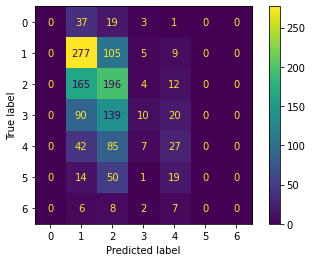

In [559]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S n-gram

In [560]:
svc_model = SVC()
svc_model.fit(X_train_combined_svc, y_train)

SVC()

In [561]:
y_pred_train = svc_model.predict(X_train_combined_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.47005044136191676
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.57      0.79      0.66       913
           2       0.38      0.60      0.47       848
           3       0.42      0.24      0.30       611
           4       0.48      0.25      0.33       401
           5       0.92      0.05      0.10       219
           6       1.00      0.02      0.04        48

    accuracy                           0.47      3172
   macro avg       0.54      0.28      0.27      3172
weighted avg       0.49      0.47      0.42      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [562]:
y_pred = svc_model.predict(X_test_combined_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.72      0.61       396
           2       0.36      0.53      0.43       377
           3       0.27      0.15      0.20       259
           4       0.31      0.20      0.25       161
           5       1.00      0.02      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.35      0.23      0.22      1360
weighted avg       0.40      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [563]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [564]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.35
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


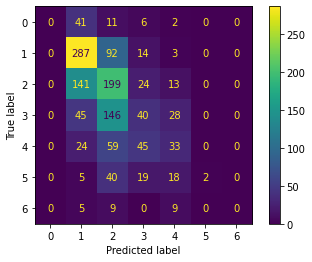

In [565]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S n-gram tfidf

In [566]:
svc_model = SVC()
svc_model.fit(X_train_combined2_svc, y_train)

SVC()

In [567]:
y_pred_train = svc_model.predict(X_train_combined2_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.33921815889029006
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.40      0.69      0.51       913
           2       0.28      0.44      0.34       848
           3       0.26      0.05      0.09       611
           4       0.30      0.11      0.16       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.16      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [568]:
y_pred = svc_model.predict(X_test_combined2_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.43      0.71      0.54       396
           2       0.32      0.49      0.38       377
           3       0.32      0.07      0.11       259
           4       0.30      0.14      0.19       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.37      1360
   macro avg       0.20      0.20      0.18      1360
weighted avg       0.31      0.37      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [569]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [570]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.20
Precision: 0.20
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


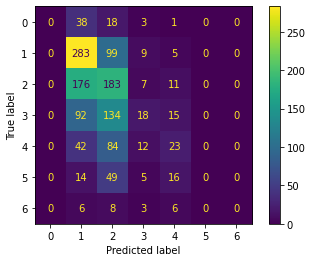

In [571]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S word frequency

In [572]:
svc_model = SVC()
svc_model.fit(X_train_combined3_svc, y_train)

SVC()

In [573]:
y_pred_train = svc_model.predict(X_train_combined3_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.46279949558638084
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.56      0.79      0.65       913
           2       0.38      0.59      0.46       848
           3       0.42      0.22      0.29       611
           4       0.48      0.24      0.32       401
           5       0.92      0.05      0.10       219
           6       1.00      0.02      0.04        48

    accuracy                           0.46      3172
   macro avg       0.54      0.27      0.27      3172
weighted avg       0.48      0.46      0.41      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [574]:
y_pred = svc_model.predict(X_test_combined3_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.72      0.60       396
           2       0.35      0.52      0.42       377
           3       0.27      0.15      0.20       259
           4       0.32      0.20      0.25       161
           5       1.00      0.02      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.35      0.23      0.22      1360
weighted avg       0.40      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [575]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [576]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.35
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


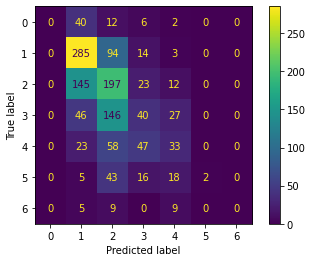

In [577]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S tfidf word frequency

In [578]:
svc_model = SVC()
svc_model.fit(X_train_combined4_svc, y_train)

SVC()

In [579]:
y_pred_train = svc_model.predict(X_train_combined4_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.33921815889029006
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.40      0.69      0.51       913
           2       0.28      0.44      0.34       848
           3       0.26      0.05      0.09       611
           4       0.30      0.11      0.16       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.16      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [580]:
y_pred = svc_model.predict(X_test_combined4_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.43      0.71      0.54       396
           2       0.32      0.49      0.38       377
           3       0.32      0.07      0.11       259
           4       0.30      0.14      0.19       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.37      1360
   macro avg       0.20      0.20      0.18      1360
weighted avg       0.31      0.37      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [581]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [582]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.20
Precision: 0.20
F1 Score: 0.18


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


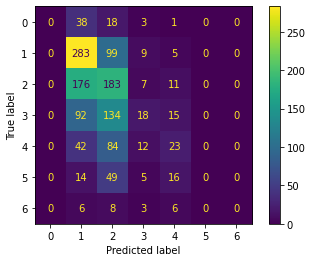

In [583]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov

In [584]:
svc_model = SVC()
svc_model.fit(X_train_out_svc, y_train)

SVC()

In [585]:
y_pred_train = svc_model.predict(X_train_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.47      0.72      0.57       913
           2       0.37      0.54      0.44       848
           3       0.56      0.21      0.31       611
           4       0.44      0.34      0.38       401
           5       0.75      0.08      0.15       219
           6       0.00      0.00      0.00        48

    accuracy                           0.44      3172
   macro avg       0.37      0.27      0.26      3172
weighted avg       0.45      0.44      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [586]:
y_pred = svc_model.predict(X_test_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.77      0.62       396
           2       0.41      0.60      0.49       377
           3       0.44      0.15      0.23       259
           4       0.44      0.36      0.39       161
           5       0.50      0.06      0.11        84
           6       0.00      0.00      0.00        23

    accuracy                           0.47      1360
   macro avg       0.33      0.28      0.26      1360
weighted avg       0.43      0.47      0.41      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [587]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [588]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.47
Recall: 0.28
Precision: 0.33
F1 Score: 0.26


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


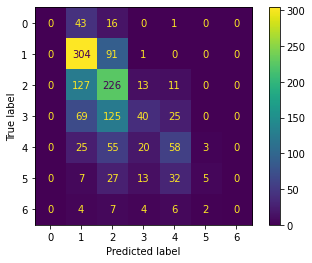

In [589]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a n-gram

In [590]:
svc_model = SVC()
svc_model.fit(X_train_combined_out_svc, y_train)

SVC()

In [591]:
y_pred_train = svc_model.predict(X_train_combined_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.56      0.80      0.66       913
           2       0.38      0.60      0.47       848
           3       0.43      0.24      0.31       611
           4       0.49      0.25      0.33       401
           5       0.92      0.05      0.10       219
           6       1.00      0.02      0.04        48

    accuracy                           0.47      3172
   macro avg       0.54      0.28      0.27      3172
weighted avg       0.49      0.47      0.42      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [592]:
y_pred = svc_model.predict(X_test_combined_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.73      0.61       396
           2       0.36      0.53      0.43       377
           3       0.26      0.15      0.19       259
           4       0.31      0.20      0.25       161
           5       1.00      0.02      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.35      0.23      0.22      1360
weighted avg       0.40      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [593]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [594]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.35
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


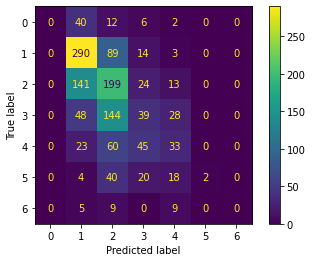

In [595]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a tfidf n-gram

In [596]:
svc_model = SVC()
svc_model.fit(X_train_combined2_out_svc, y_train)

SVC()

In [597]:
y_pred_train = svc_model.predict(X_train_combined2_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.59      0.76      0.67       913
           2       0.41      0.65      0.50       848
           3       0.40      0.28      0.33       611
           4       0.48      0.28      0.35       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.48      3172
   macro avg       0.27      0.28      0.26      3172
weighted avg       0.42      0.48      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [598]:
y_pred = svc_model.predict(X_test_combined2_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.59      0.72      0.65       396
           2       0.40      0.63      0.49       377
           3       0.32      0.23      0.27       259
           4       0.42      0.24      0.31       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.46      1360
   macro avg       0.25      0.26      0.25      1360
weighted avg       0.39      0.46      0.41      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [599]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [600]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.46
Recall: 0.26
Precision: 0.25
F1 Score: 0.25


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


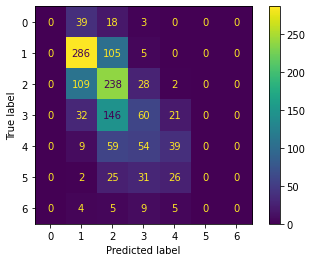

In [601]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a word frequency

In [602]:
svc_model = SVC()
svc_model.fit(X_train_combined3_out_svc, y_train)

SVC()

In [603]:
y_pred_train = svc_model.predict(X_train_combined3_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.56      0.79      0.65       913
           2       0.38      0.59      0.46       848
           3       0.43      0.23      0.30       611
           4       0.49      0.24      0.32       401
           5       0.93      0.06      0.11       219
           6       1.00      0.02      0.04        48

    accuracy                           0.47      3172
   macro avg       0.54      0.28      0.27      3172
weighted avg       0.48      0.47      0.42      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [604]:
y_pred = svc_model.predict(X_test_combined3_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.73      0.61       396
           2       0.35      0.52      0.42       377
           3       0.28      0.16      0.20       259
           4       0.31      0.20      0.25       161
           5       1.00      0.02      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.35      0.23      0.22      1360
weighted avg       0.40      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [605]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [606]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.35
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


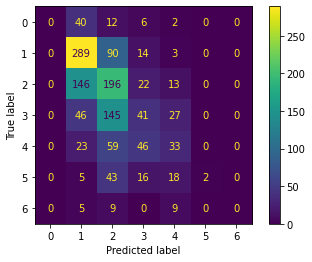

In [607]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a tfidf word frequency

In [608]:
svc_model = SVC()
svc_model.fit(X_train_combined4_out_svc, y_train)

SVC()

In [609]:
y_pred_train = svc_model.predict(X_train_combined4_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.59      0.75      0.66       913
           2       0.40      0.65      0.49       848
           3       0.39      0.26      0.31       611
           4       0.48      0.27      0.35       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.48      3172
   macro avg       0.27      0.28      0.26      3172
weighted avg       0.41      0.48      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [610]:
y_pred = svc_model.predict(X_test_combined4_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.60      0.72      0.65       396
           2       0.40      0.64      0.49       377
           3       0.32      0.23      0.27       259
           4       0.43      0.25      0.31       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.46      1360
   macro avg       0.25      0.26      0.25      1360
weighted avg       0.40      0.46      0.41      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [611]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [612]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.46
Recall: 0.26
Precision: 0.25
F1 Score: 0.25


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


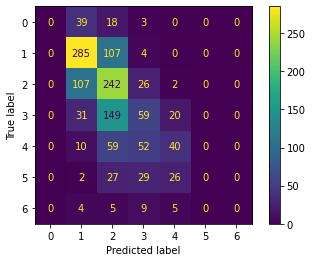

In [613]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním

In [614]:
svc_model = SVC()
svc_model.fit(X_train_scaled_svc, y_train)

SVC()

In [615]:
y_pred_train = svc_model.predict(X_train_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3439470365699874
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.41      0.68      0.51       913
           2       0.28      0.46      0.35       848
           3       0.30      0.04      0.07       611
           4       0.29      0.12      0.17       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.19      0.16      3172
weighted avg       0.29      0.34      0.28      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [616]:
y_pred = svc_model.predict(X_test_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.37426470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.44      0.70      0.54       396
           2       0.32      0.51      0.40       377
           3       0.32      0.04      0.08       259
           4       0.28      0.16      0.20       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.37      1360
   macro avg       0.19      0.20      0.17      1360
weighted avg       0.31      0.37      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [617]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [618]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.20
Precision: 0.19
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


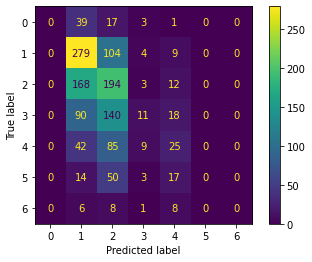

In [619]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a n-grammi

In [620]:
svc_model = SVC()
svc_model.fit(X_train_combined_scaled_svc, y_train)

SVC()

In [621]:
y_pred_train = svc_model.predict(X_train_combined_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4687894073139975
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.56      0.79      0.66       913
           2       0.38      0.60      0.47       848
           3       0.42      0.23      0.30       611
           4       0.48      0.25      0.33       401
           5       0.92      0.05      0.10       219
           6       1.00      0.02      0.04        48

    accuracy                           0.47      3172
   macro avg       0.54      0.28      0.27      3172
weighted avg       0.49      0.47      0.42      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [622]:
y_pred = svc_model.predict(X_test_combined_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41102941176470587
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.73      0.61       396
           2       0.36      0.52      0.42       377
           3       0.27      0.15      0.19       259
           4       0.31      0.20      0.25       161
           5       1.00      0.02      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.35      0.23      0.22      1360
weighted avg       0.40      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [623]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [624]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.35
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


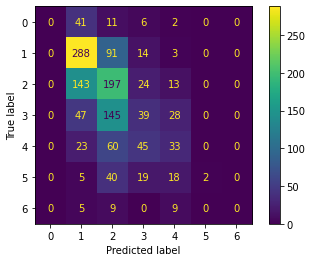

In [625]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a tfidf n-gram

In [626]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scaled_svc, y_train)

SVC()

In [627]:
y_pred_train = svc_model.predict(X_train_combined2_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.33984867591424966
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.40      0.70      0.51       913
           2       0.28      0.43      0.34       848
           3       0.27      0.05      0.09       611
           4       0.30      0.10      0.15       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [628]:
y_pred = svc_model.predict(X_test_combined2_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.36470588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.42      0.72      0.53       396
           2       0.31      0.47      0.37       377
           3       0.28      0.06      0.10       259
           4       0.28      0.13      0.18       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.36      1360
   macro avg       0.19      0.20      0.17      1360
weighted avg       0.30      0.36      0.30      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [629]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [630]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.36
Recall: 0.20
Precision: 0.19
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


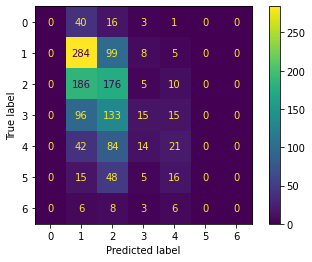

In [631]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a word frequency

In [632]:
svc_model = SVC()
svc_model.fit(X_train_combined3_scaled_svc, y_train)

SVC()

In [633]:
y_pred_train = svc_model.predict(X_train_combined3_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.46279949558638084
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.56      0.79      0.65       913
           2       0.38      0.59      0.46       848
           3       0.42      0.22      0.28       611
           4       0.48      0.24      0.32       401
           5       0.92      0.05      0.10       219
           6       1.00      0.02      0.04        48

    accuracy                           0.46      3172
   macro avg       0.54      0.27      0.27      3172
weighted avg       0.48      0.46      0.41      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [634]:
y_pred = svc_model.predict(X_test_combined3_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41102941176470587
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.72      0.61       396
           2       0.35      0.53      0.42       377
           3       0.27      0.15      0.19       259
           4       0.31      0.20      0.25       161
           5       1.00      0.02      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.35      0.23      0.22      1360
weighted avg       0.40      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [635]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [636]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.35
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


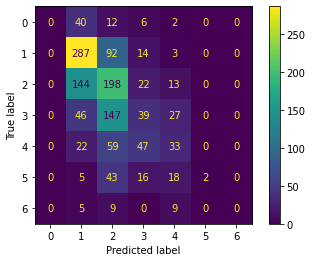

In [637]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a tfidf word frequency

In [638]:
svc_model = SVC()
svc_model.fit(X_train_combined4_scaled_svc, y_train)

SVC()

In [639]:
y_pred_train = svc_model.predict(X_train_combined4_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.33984867591424966
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.40      0.70      0.51       913
           2       0.28      0.43      0.34       848
           3       0.27      0.05      0.09       611
           4       0.30      0.10      0.15       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [640]:
y_pred = svc_model.predict(X_test_combined4_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.36470588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.42      0.72      0.53       396
           2       0.31      0.47      0.37       377
           3       0.28      0.06      0.10       259
           4       0.28      0.13      0.18       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.36      1360
   macro avg       0.19      0.20      0.17      1360
weighted avg       0.30      0.36      0.30      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [641]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [642]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.36
Recall: 0.20
Precision: 0.19
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


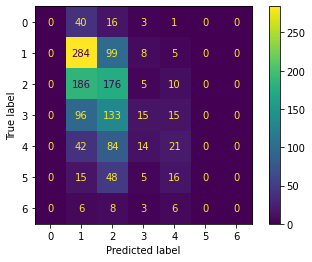

In [643]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním

In [644]:
svc_model = SVC()
svc_model.fit(X_train_scal_out_svc, y_train)

SVC()

In [645]:
y_pred_train = svc_model.predict(X_train_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4401008827238335
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.47      0.72      0.57       913
           2       0.37      0.54      0.44       848
           3       0.56      0.21      0.31       611
           4       0.44      0.34      0.38       401
           5       0.75      0.08      0.15       219
           6       0.00      0.00      0.00        48

    accuracy                           0.44      3172
   macro avg       0.37      0.27      0.26      3172
weighted avg       0.45      0.44      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [646]:
y_pred = svc_model.predict(X_test_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.46544117647058825
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.77      0.62       396
           2       0.41      0.60      0.49       377
           3       0.44      0.15      0.23       259
           4       0.44      0.36      0.39       161
           5       0.50      0.06      0.11        84
           6       0.00      0.00      0.00        23

    accuracy                           0.47      1360
   macro avg       0.33      0.28      0.26      1360
weighted avg       0.43      0.47      0.41      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [647]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [648]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.47
Recall: 0.28
Precision: 0.33
F1 Score: 0.26


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


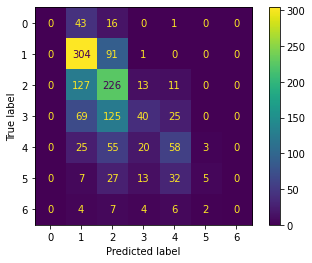

In [649]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s n-gram

In [650]:
svc_model = SVC()
svc_model.fit(X_train_combined_scal_out_svc, y_train)

SVC()

In [651]:
y_pred_train = svc_model.predict(X_train_combined_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4706809583858764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.56      0.80      0.66       913
           2       0.38      0.60      0.47       848
           3       0.43      0.24      0.31       611
           4       0.49      0.25      0.33       401
           5       0.92      0.05      0.10       219
           6       1.00      0.02      0.04        48

    accuracy                           0.47      3172
   macro avg       0.54      0.28      0.27      3172
weighted avg       0.49      0.47      0.42      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [652]:
y_pred = svc_model.predict(X_test_combined_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.73      0.61       396
           2       0.36      0.53      0.43       377
           3       0.26      0.15      0.19       259
           4       0.31      0.20      0.25       161
           5       1.00      0.02      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.35      0.23      0.22      1360
weighted avg       0.40      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [653]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [654]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.35
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


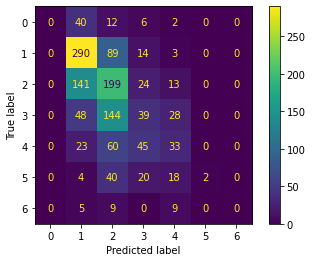

In [655]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s tfidf n-gram

In [656]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scal_out_svc, y_train)

SVC()

In [657]:
y_pred_train = svc_model.predict(X_train_combined2_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.48045397225725095
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.59      0.76      0.67       913
           2       0.41      0.65      0.50       848
           3       0.40      0.28      0.33       611
           4       0.48      0.28      0.35       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.48      3172
   macro avg       0.27      0.28      0.26      3172
weighted avg       0.42      0.48      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [658]:
y_pred = svc_model.predict(X_test_combined2_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.45808823529411763
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.59      0.72      0.65       396
           2       0.40      0.63      0.49       377
           3       0.32      0.23      0.27       259
           4       0.42      0.24      0.31       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.46      1360
   macro avg       0.25      0.26      0.25      1360
weighted avg       0.39      0.46      0.41      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [659]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [660]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.46
Recall: 0.26
Precision: 0.25
F1 Score: 0.25


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


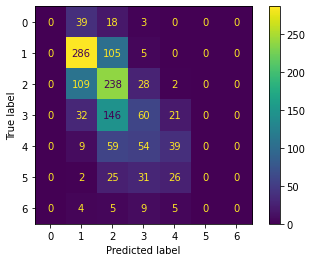

In [661]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s word frequency

In [662]:
svc_model = SVC()
svc_model.fit(X_train_combined3_scal_out_svc, y_train)

SVC()

In [663]:
y_pred_train = svc_model.predict(X_train_combined3_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4656368221941992
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.56      0.79      0.65       913
           2       0.38      0.59      0.46       848
           3       0.43      0.23      0.30       611
           4       0.49      0.24      0.32       401
           5       0.93      0.06      0.11       219
           6       1.00      0.02      0.04        48

    accuracy                           0.47      3172
   macro avg       0.54      0.28      0.27      3172
weighted avg       0.48      0.47      0.42      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [664]:
y_pred = svc_model.predict(X_test_combined3_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4125
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.73      0.61       396
           2       0.35      0.52      0.42       377
           3       0.28      0.16      0.20       259
           4       0.31      0.20      0.25       161
           5       1.00      0.02      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.35      0.23      0.22      1360
weighted avg       0.40      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [665]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [666]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.35
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


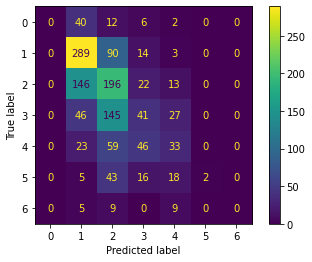

In [667]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s tfidf word frequency

In [668]:
svc_model = SVC()
svc_model.fit(X_train_combined4_scal_out_svc, y_train)

SVC()

In [669]:
y_pred_train = svc_model.predict(X_train_combined4_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.47509457755359397
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.59      0.75      0.66       913
           2       0.40      0.65      0.49       848
           3       0.39      0.26      0.31       611
           4       0.48      0.27      0.35       401
           5       0.00      0.00      0.00       219
           6       0.00      0.00      0.00        48

    accuracy                           0.48      3172
   macro avg       0.27      0.28      0.26      3172
weighted avg       0.41      0.48      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [670]:
y_pred = svc_model.predict(X_test_combined4_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4602941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.60      0.72      0.65       396
           2       0.40      0.64      0.49       377
           3       0.32      0.23      0.27       259
           4       0.43      0.25      0.31       161
           5       0.00      0.00      0.00        84
           6       0.00      0.00      0.00        23

    accuracy                           0.46      1360
   macro avg       0.25      0.26      0.25      1360
weighted avg       0.40      0.46      0.41      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [671]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [672]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.46
Recall: 0.26
Precision: 0.25
F1 Score: 0.25


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


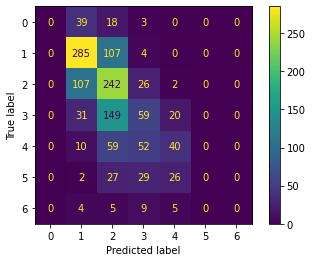

In [673]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [674]:
results_svc2 = pd.DataFrame(results_list2_svc)
print(results_svc2)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0         0.343947       0.375000         0.183701        0.194468   
1         0.470050       0.412500         0.539604        0.351890   
2         0.339218       0.372794         0.177672        0.195352   
3         0.462799       0.409559         0.536709        0.351832   
4         0.339218       0.372794         0.177672        0.195352   
5         0.440101       0.465441         0.371674        0.330551   
6         0.470681       0.413971         0.540968        0.351572   
7         0.480454       0.458088         0.268986        0.247010   
8         0.465637       0.412500         0.539798        0.353214   
9         0.475095       0.460294         0.266035        0.249886   
10        0.343947       0.374265         0.183414        0.194718   
11        0.468789       0.411029         0.538872        0.350658   
12        0.339849       0.364706         0.178061        0.186196   
13        0.462799  

Podľa výsledkov po druhom testovani svc môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým textom sa accuracy mierne zvýšilo.

RANDOM FOREST - Bez ošetrenia outlierov a bez skalovania

In [675]:
results_list2_rf=[]

Trenovanie modelu

In [676]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train)

RandomForestClassifier()

Predikovanie na trenovacich datach

In [677]:
y_pred_train = rf_model.predict(X_train_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [678]:
y_pred = rf_model.predict(X_test_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4007352941176471
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.03        60
           1       0.51      0.65      0.57       396
           2       0.37      0.44      0.40       377
           3       0.31      0.29      0.30       259
           4       0.31      0.22      0.26       161
           5       0.22      0.10      0.13        84
           6       0.00      0.00      0.00        23

    accuracy                           0.40      1360
   macro avg       0.39      0.25      0.24      1360
weighted avg       0.40      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [679]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zobrazenie metrik

In [680]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.25
Precision: 0.39
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

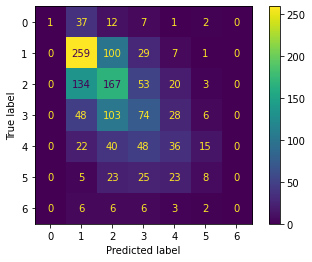

In [681]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S n-gram

In [682]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_rf, y_train)

RandomForestClassifier()

In [683]:
y_pred_train = rf_model.predict(X_train_combined_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [684]:
y_pred = rf_model.predict(X_test_combined_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4227941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      0.75      0.63       396
           2       0.37      0.50      0.43       377
           3       0.28      0.19      0.23       259
           4       0.35      0.23      0.28       161
           5       0.24      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.25      0.25      0.23      1360
weighted avg       0.37      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [685]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [686]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.25
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


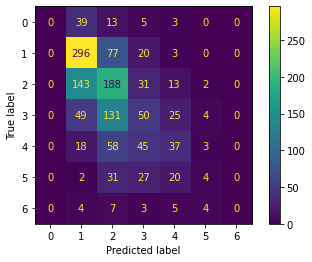

In [687]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S n-gram tfidf

In [688]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_rf, y_train)

RandomForestClassifier()

In [689]:
y_pred_train = rf_model.predict(X_train_combined2_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [690]:
y_pred = rf_model.predict(X_test_combined2_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.73      0.61       396
           2       0.37      0.48      0.41       377
           3       0.32      0.25      0.28       259
           4       0.38      0.22      0.28       161
           5       0.25      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.26      0.25      0.24      1360
weighted avg       0.37      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [691]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [692]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.26
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


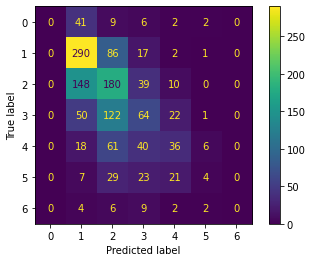

In [693]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S word frequency

In [694]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_rf, y_train)

RandomForestClassifier()

In [695]:
y_pred_train = rf_model.predict(X_train_combined3_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [696]:
y_pred = rf_model.predict(X_test_combined3_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      0.71      0.61       396
           2       0.38      0.53      0.44       377
           3       0.31      0.23      0.27       259
           4       0.29      0.20      0.24       161
           5       0.36      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.27      0.25      0.23      1360
weighted avg       0.38      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [697]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [698]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.27
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


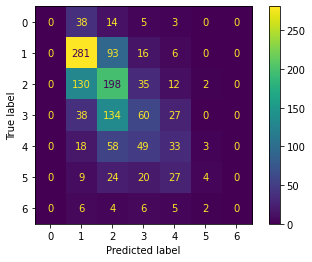

In [699]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S tfidf word frequency

In [700]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_rf, y_train)

RandomForestClassifier()

In [701]:
y_pred_train = rf_model.predict(X_train_combined4_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [702]:
y_pred = rf_model.predict(X_test_combined4_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42426470588235293
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.55      0.73      0.62       396
           2       0.39      0.52      0.44       377
           3       0.25      0.19      0.22       259
           4       0.34      0.24      0.28       161
           5       0.29      0.06      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.26      0.25      0.24      1360
weighted avg       0.37      0.42      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [703]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [704]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.26
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


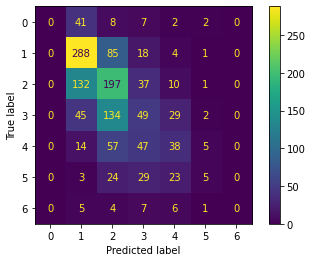

In [705]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov

In [706]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_out_rf, y_train)

RandomForestClassifier()

In [707]:
y_pred_train = rf_model.predict(X_train_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [708]:
y_pred = rf_model.predict(X_test_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7338235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.78      0.23      0.36        60
           1       0.74      0.87      0.80       396
           2       0.74      0.79      0.76       377
           3       0.72      0.73      0.73       259
           4       0.72      0.68      0.70       161
           5       0.77      0.48      0.59        84
           6       0.67      0.09      0.15        23

    accuracy                           0.73      1360
   macro avg       0.73      0.55      0.58      1360
weighted avg       0.73      0.73      0.72      1360



In [709]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [710]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.73
Recall: 0.55
Precision: 0.73
F1 Score: 0.58


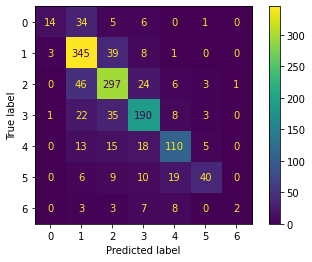

In [711]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a n-gram

In [712]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_out_rf, y_train)

RandomForestClassifier()

In [713]:
y_pred_train = rf_model.predict(X_train_combined_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [714]:
y_pred = rf_model.predict(X_test_combined_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4713235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.59      0.75      0.66       396
           2       0.42      0.61      0.50       377
           3       0.37      0.31      0.34       259
           4       0.36      0.19      0.25       161
           5       0.33      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.47      1360
   macro avg       0.30      0.27      0.26      1360
weighted avg       0.42      0.47      0.43      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [715]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [716]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.47
Recall: 0.27
Precision: 0.30
F1 Score: 0.26


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


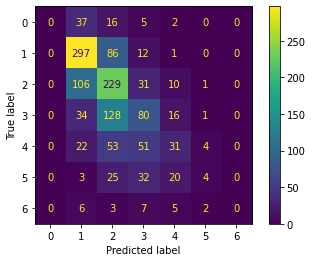

In [717]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a tfidf n-gram

In [718]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_out_rf, y_train)

RandomForestClassifier()

In [719]:
y_pred_train = rf_model.predict(X_train_combined2_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [720]:
y_pred = rf_model.predict(X_test_combined2_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.45294117647058824
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.57      0.74      0.64       396
           2       0.39      0.56      0.46       377
           3       0.37      0.29      0.33       259
           4       0.36      0.21      0.27       161
           5       0.25      0.04      0.06        84
           6       0.00      0.00      0.00        23

    accuracy                           0.45      1360
   macro avg       0.28      0.26      0.25      1360
weighted avg       0.40      0.45      0.41      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [721]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [722]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.45
Recall: 0.26
Precision: 0.28
F1 Score: 0.25


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


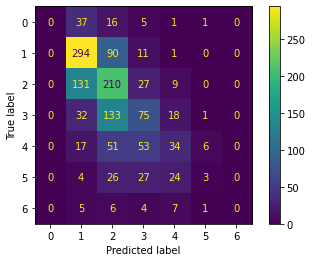

In [723]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a word frequency

In [724]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_out_rf, y_train)

RandomForestClassifier()

In [725]:
y_pred_train = rf_model.predict(X_train_combined3_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [726]:
y_pred = rf_model.predict(X_test_combined3_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.49264705882352944
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.62      0.81      0.70       396
           2       0.45      0.63      0.53       377
           3       0.34      0.29      0.31       259
           4       0.40      0.23      0.29       161
           5       0.20      0.02      0.04        84
           6       0.00      0.00      0.00        23

    accuracy                           0.49      1360
   macro avg       0.29      0.28      0.27      1360
weighted avg       0.43      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [727]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [728]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.49
Recall: 0.28
Precision: 0.29
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


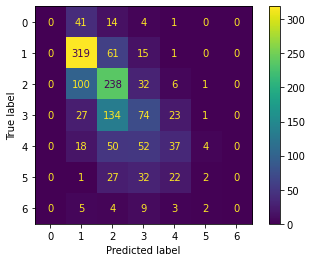

In [729]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a tfidf word frequency

In [730]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_out_rf, y_train)

RandomForestClassifier()

In [731]:
y_pred_train = rf_model.predict(X_train_combined4_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [732]:
y_pred = rf_model.predict(X_test_combined4_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.48970588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.59      0.78      0.67       396
           2       0.44      0.61      0.51       377
           3       0.38      0.30      0.34       259
           4       0.46      0.29      0.35       161
           5       0.35      0.07      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.49      1360
   macro avg       0.32      0.29      0.28      1360
weighted avg       0.44      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [733]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [734]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.49
Recall: 0.29
Precision: 0.32
F1 Score: 0.28


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


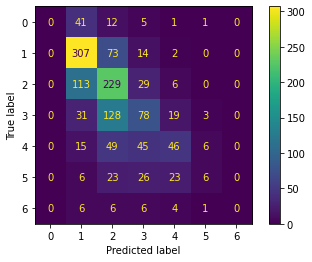

In [735]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním

In [736]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled_rf, y_train)

RandomForestClassifier()

In [737]:
y_pred_train = rf_model.predict(X_train_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [738]:
y_pred = rf_model.predict(X_test_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3845588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.48      0.61      0.54       396
           2       0.39      0.47      0.42       377
           3       0.28      0.25      0.27       259
           4       0.24      0.17      0.20       161
           5       0.24      0.14      0.18        84
           6       0.00      0.00      0.00        23

    accuracy                           0.38      1360
   macro avg       0.23      0.23      0.23      1360
weighted avg       0.34      0.38      0.36      1360



In [739]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [740]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.23
Precision: 0.23
F1 Score: 0.23


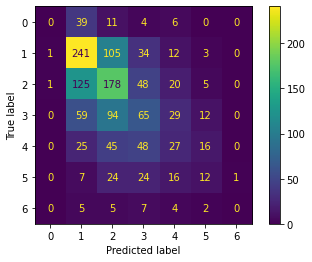

In [741]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a n-gram

In [742]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scaled_rf, y_train)

RandomForestClassifier()

In [743]:
y_pred_train = rf_model.predict(X_train_combined_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [744]:
y_pred = rf_model.predict(X_test_combined_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41323529411764703
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.71      0.61       396
           2       0.37      0.53      0.43       377
           3       0.26      0.19      0.22       259
           4       0.33      0.19      0.24       161
           5       0.27      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.36      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [745]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [746]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.25
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


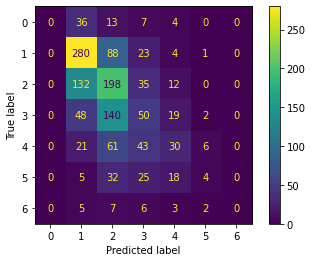

In [747]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a tfidf n-gram

In [748]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scaled_rf, y_train)

RandomForestClassifier()

In [749]:
y_pred_train = rf_model.predict(X_train_combined2_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [750]:
y_pred = rf_model.predict(X_test_combined2_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3977941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.50      0.69      0.58       396
           2       0.33      0.44      0.38       377
           3       0.30      0.25      0.27       259
           4       0.37      0.20      0.26       161
           5       0.42      0.06      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.40      1360
   macro avg       0.27      0.23      0.23      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [751]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [752]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.27
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


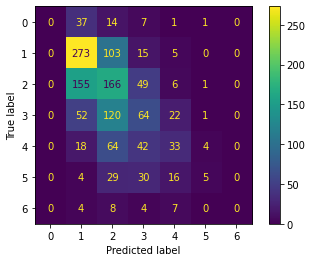

In [753]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a word frequency

In [754]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_scaled_rf, y_train)

RandomForestClassifier()

In [755]:
y_pred_train = rf_model.predict(X_train_combined3_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [756]:
y_pred = rf_model.predict(X_test_combined3_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41323529411764703
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.68      0.59       396
           2       0.36      0.50      0.41       377
           3       0.32      0.25      0.28       259
           4       0.36      0.22      0.27       161
           5       0.40      0.07      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.28      0.25      0.24      1360
weighted avg       0.38      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [757]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [758]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.25
Precision: 0.28
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


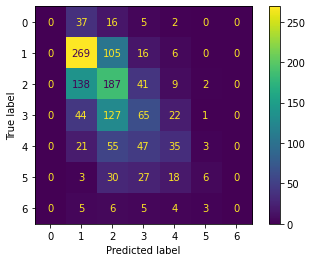

In [759]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a tfidf word frequency

In [760]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_scaled_rf, y_train)

RandomForestClassifier()

In [761]:
y_pred_train = rf_model.predict(X_train_combined4_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [762]:
y_pred = rf_model.predict(X_test_combined4_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40955882352941175
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.68      0.60       396
           2       0.35      0.48      0.40       377
           3       0.31      0.25      0.28       259
           4       0.36      0.25      0.29       161
           5       0.25      0.04      0.06        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.26      0.24      0.23      1360
weighted avg       0.37      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [763]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [764]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.26
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


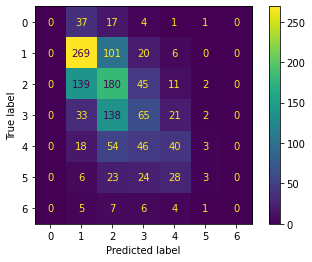

In [765]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním

In [766]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scal_out_rf, y_train)

RandomForestClassifier()

In [767]:
y_pred_train = rf_model.predict(X_train_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [768]:
y_pred = rf_model.predict(X_test_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.6933823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40        60
           1       0.73      0.85      0.79       396
           2       0.70      0.74      0.72       377
           3       0.67      0.67      0.67       259
           4       0.61      0.64      0.62       161
           5       0.61      0.43      0.50        84
           6       1.00      0.04      0.08        23

    accuracy                           0.69      1360
   macro avg       0.76      0.52      0.54      1360
weighted avg       0.71      0.69      0.68      1360



In [769]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [770]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.69
Recall: 0.52
Precision: 0.76
F1 Score: 0.54


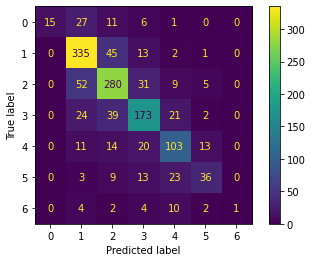

In [771]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s n-gram

In [772]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scal_out_rf, y_train)

RandomForestClassifier()

In [773]:
y_pred_train = rf_model.predict(X_train_combined_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [774]:
y_pred = rf_model.predict(X_test_combined_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.47941176470588237
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.58      0.80      0.68       396
           2       0.43      0.56      0.49       377
           3       0.35      0.27      0.31       259
           4       0.42      0.30      0.35       161
           5       0.33      0.04      0.06        84
           6       0.00      0.00      0.00        23

    accuracy                           0.48      1360
   macro avg       0.30      0.28      0.27      1360
weighted avg       0.43      0.48      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [775]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [776]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.28
Precision: 0.30
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


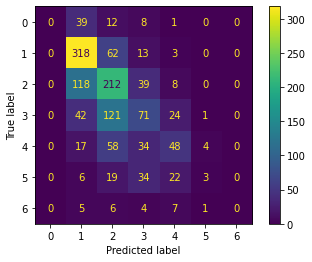

In [777]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s tfidf-ngram

In [778]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scal_out_rf, y_train)

RandomForestClassifier()

In [779]:
y_pred_train = rf_model.predict(X_train_combined2_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [780]:
y_pred = rf_model.predict(X_test_combined2_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.47794117647058826
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.58      0.78      0.66       396
           2       0.43      0.60      0.50       377
           3       0.36      0.26      0.30       259
           4       0.42      0.26      0.32       161
           5       0.29      0.06      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.48      1360
   macro avg       0.30      0.28      0.27      1360
weighted avg       0.43      0.48      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [781]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [782]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.28
Precision: 0.30
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


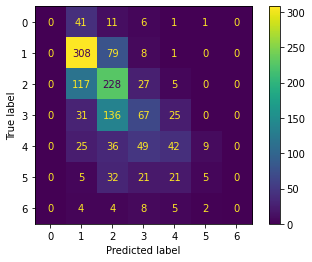

In [783]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s word frequency

In [784]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_scal_out_rf, y_train)

RandomForestClassifier()

In [785]:
y_pred_train = rf_model.predict(X_train_combined3_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [786]:
y_pred = rf_model.predict(X_test_combined3_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4838235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.62      0.77      0.69       396
           2       0.43      0.61      0.50       377
           3       0.38      0.30      0.33       259
           4       0.38      0.26      0.31       161
           5       0.38      0.06      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.48      1360
   macro avg       0.31      0.29      0.28      1360
weighted avg       0.44      0.48      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [787]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [788]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.29
Precision: 0.31
F1 Score: 0.28


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


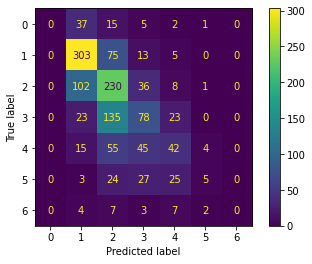

In [789]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s tfidf word frequency

In [790]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_scal_out_rf, y_train)

RandomForestClassifier()

In [791]:
y_pred_train = rf_model.predict(X_train_combined4_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [792]:
y_pred = rf_model.predict(X_test_combined4_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.47794117647058826
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.59      0.79      0.67       396
           2       0.42      0.55      0.48       377
           3       0.37      0.31      0.33       259
           4       0.44      0.29      0.35       161
           5       0.33      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.48      1360
   macro avg       0.31      0.28      0.27      1360
weighted avg       0.43      0.48      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [793]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [794]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.28
Precision: 0.31
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


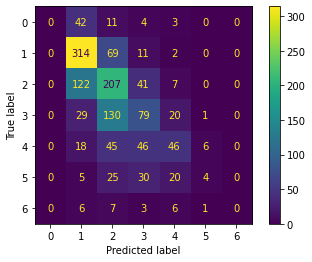

In [795]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [796]:
results_rf2 = pd.DataFrame(results_list2_rf)
print(results_rf2)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0              1.0       0.400735              1.0        0.386318   
1              1.0       0.422794              1.0        0.252868   
2              1.0       0.422059              1.0        0.262429   
3              1.0       0.423529              1.0        0.269619   
4              1.0       0.424265              1.0        0.259781   
5              1.0       0.733824              1.0        0.733196   
6              1.0       0.471324              1.0        0.296744   
7              1.0       0.452941              1.0        0.277587   
8              1.0       0.492647              1.0        0.287475   
9              1.0       0.489706              1.0        0.317790   
10             1.0       0.384559              1.0        0.232253   
11             1.0       0.413235              1.0        0.251887   
12             1.0       0.397794              1.0        0.274111   
13             1.0  

Podľa výsledkov po druhom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým testom sa accuracy mierne zvýšilo. Aj ked sme zníšili počet črt, tak model je stále pretrénovaný.

GRADIENT BOOSTING CLASSIFIER - Bez ošetrenia outlierov a bez skalovania

In [797]:
results_list2_gbm=[]

Trenovanie modelu

In [798]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_gbm, y_train)

GradientBoostingClassifier()

Predikovanie na trenovacich datach

In [799]:
y_pred_train = gbm_model.predict(X_train_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.705233291298865
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.58      0.73       132
           1       0.69      0.84      0.76       913
           2       0.62      0.77      0.69       848
           3       0.72      0.59      0.65       611
           4       0.81      0.54      0.65       401
           5       0.90      0.56      0.69       219
           6       0.98      0.96      0.97        48

    accuracy                           0.71      3172
   macro avg       0.82      0.69      0.73      3172
weighted avg       0.73      0.71      0.70      3172



Predikovanie na testovacich datach

In [800]:
y_pred = gbm_model.predict(X_test_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4323529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.22      0.03      0.06        60
           1       0.54      0.66      0.59       396
           2       0.40      0.49      0.44       377
           3       0.35      0.31      0.33       259
           4       0.39      0.30      0.34       161
           5       0.17      0.08      0.11        84
           6       0.25      0.04      0.07        23

    accuracy                           0.43      1360
   macro avg       0.33      0.28      0.28      1360
weighted avg       0.41      0.43      0.41      1360



In [801]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

Zobrazenie metrik

In [802]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.28
Precision: 0.33
F1 Score: 0.28


Vizualizácia výkonnosti modelu

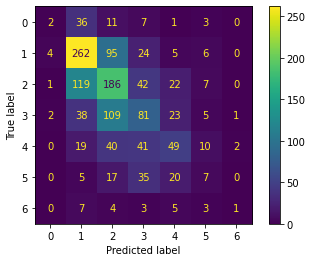

In [803]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S n-gram

In [804]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_gbm, y_train)

GradientBoostingClassifier()

In [805]:
y_pred_train = gbm_model.predict(X_train_combined_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8997477931904161
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       132
           1       0.88      0.97      0.92       913
           2       0.85      0.93      0.89       848
           3       0.91      0.87      0.89       611
           4       0.98      0.79      0.87       401
           5       0.99      0.83      0.90       219
           6       1.00      1.00      1.00        48

    accuracy                           0.90      3172
   macro avg       0.95      0.88      0.91      3172
weighted avg       0.91      0.90      0.90      3172



In [806]:
y_pred = gbm_model.predict(X_test_combined_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42867647058823527
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.03      0.05        60
           1       0.60      0.69      0.64       396
           2       0.40      0.51      0.45       377
           3       0.31      0.27      0.29       259
           4       0.31      0.22      0.26       161
           5       0.19      0.12      0.14        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.28      0.26      0.26      1360
weighted avg       0.40      0.43      0.41      1360



In [807]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [808]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.26
Precision: 0.28
F1 Score: 0.26


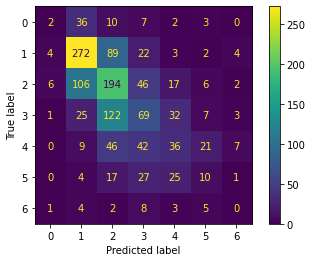

In [809]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S n-gram tfidf

In [810]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_gbm, y_train)

GradientBoostingClassifier()

In [811]:
y_pred_train = gbm_model.predict(X_train_combined2_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9467213114754098
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       132
           1       0.94      0.98      0.96       913
           2       0.93      0.97      0.95       848
           3       0.94      0.94      0.94       611
           4       0.97      0.91      0.94       401
           5       0.99      0.88      0.93       219
           6       1.00      1.00      1.00        48

    accuracy                           0.95      3172
   macro avg       0.97      0.93      0.95      3172
weighted avg       0.95      0.95      0.95      3172



In [812]:
y_pred = gbm_model.predict(X_test_combined2_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42720588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.20      0.07      0.10        60
           1       0.60      0.67      0.63       396
           2       0.40      0.51      0.45       377
           3       0.31      0.29      0.30       259
           4       0.29      0.21      0.25       161
           5       0.23      0.13      0.17        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.29      0.27      0.27      1360
weighted avg       0.40      0.43      0.41      1360



In [813]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [814]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.29
F1 Score: 0.27


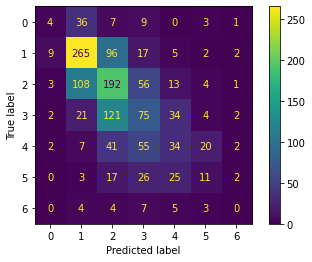

In [815]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S word frequency

In [816]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_gbm, y_train)

GradientBoostingClassifier()

In [817]:
y_pred_train = gbm_model.predict(X_train_combined3_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.894703656998739
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       132
           1       0.87      0.96      0.91       913
           2       0.84      0.92      0.88       848
           3       0.91      0.84      0.87       611
           4       0.99      0.81      0.89       401
           5       1.00      0.87      0.93       219
           6       1.00      1.00      1.00        48

    accuracy                           0.89      3172
   macro avg       0.94      0.88      0.91      3172
weighted avg       0.90      0.89      0.89      3172



In [818]:
y_pred = gbm_model.predict(X_test_combined3_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.06      0.02      0.03        60
           1       0.57      0.70      0.63       396
           2       0.41      0.48      0.44       377
           3       0.32      0.31      0.32       259
           4       0.29      0.20      0.23       161
           5       0.08      0.04      0.05        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.25      0.25      0.24      1360
weighted avg       0.38      0.42      0.40      1360



In [819]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [820]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.25
F1 Score: 0.24


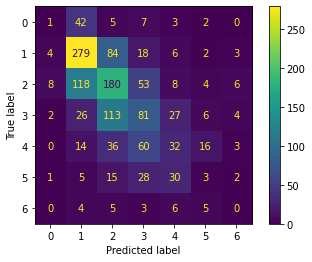

In [821]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S tfidf word frequency

In [822]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_gbm, y_train)

GradientBoostingClassifier()

In [823]:
y_pred_train = gbm_model.predict(X_train_combined4_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9265447667087011
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90       132
           1       0.92      0.97      0.95       913
           2       0.89      0.95      0.92       848
           3       0.93      0.90      0.92       611
           4       0.97      0.88      0.92       401
           5       0.98      0.84      0.90       219
           6       1.00      1.00      1.00        48

    accuracy                           0.93      3172
   macro avg       0.96      0.91      0.93      3172
weighted avg       0.93      0.93      0.93      3172



In [824]:
y_pred = gbm_model.predict(X_test_combined4_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.43529411764705883
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.05      0.07        60
           1       0.60      0.69      0.64       396
           2       0.42      0.54      0.47       377
           3       0.30      0.27      0.29       259
           4       0.33      0.25      0.28       161
           5       0.12      0.06      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.44      1360
   macro avg       0.27      0.26      0.26      1360
weighted avg       0.40      0.44      0.41      1360



In [825]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [826]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.44
Recall: 0.26
Precision: 0.27
F1 Score: 0.26


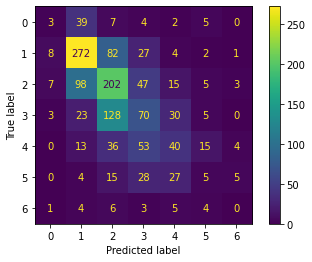

In [827]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov

In [828]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_out_gbm, y_train)

GradientBoostingClassifier()

In [829]:
y_pred_train = gbm_model.predict(X_train_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.941046658259773
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       132
           1       0.92      0.97      0.94       913
           2       0.91      0.95      0.93       848
           3       0.96      0.91      0.93       611
           4       0.99      0.93      0.96       401
           5       1.00      0.94      0.97       219
           6       1.00      1.00      1.00        48

    accuracy                           0.94      3172
   macro avg       0.97      0.94      0.95      3172
weighted avg       0.94      0.94      0.94      3172



In [830]:
y_pred = gbm_model.predict(X_test_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8580882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76        60
           1       0.85      0.93      0.89       396
           2       0.85      0.90      0.87       377
           3       0.86      0.83      0.85       259
           4       0.85      0.84      0.85       161
           5       0.90      0.76      0.83        84
           6       0.75      0.39      0.51        23

    accuracy                           0.86      1360
   macro avg       0.87      0.75      0.79      1360
weighted avg       0.86      0.86      0.86      1360



In [831]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [832]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.86
Recall: 0.75
Precision: 0.87
F1 Score: 0.79


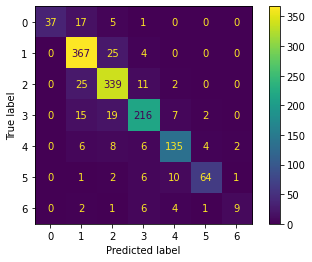

In [833]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov a n-gram

In [834]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_out_gbm, y_train)

GradientBoostingClassifier()

In [835]:
y_pred_train = gbm_model.predict(X_train_combined_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9829760403530895
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       132
           1       0.97      0.99      0.98       913
           2       0.97      0.99      0.98       848
           3       0.99      0.98      0.99       611
           4       1.00      0.97      0.98       401
           5       1.00      0.98      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [836]:
y_pred = gbm_model.predict(X_test_combined_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7926470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.89      0.40      0.55        60
           1       0.82      0.91      0.86       396
           2       0.79      0.86      0.82       377
           3       0.78      0.80      0.79       259
           4       0.76      0.73      0.75       161
           5       0.82      0.50      0.62        84
           6       0.23      0.13      0.17        23

    accuracy                           0.79      1360
   macro avg       0.73      0.62      0.65      1360
weighted avg       0.79      0.79      0.78      1360



In [837]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [838]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.62
Precision: 0.73
F1 Score: 0.65


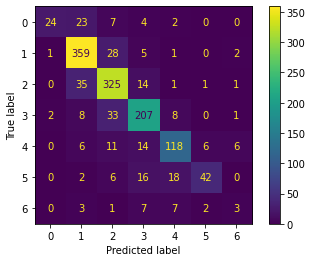

In [839]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov a tfidf n-gram

In [840]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_out_gbm, y_train)

GradientBoostingClassifier()

In [841]:
y_pred_train = gbm_model.predict(X_train_combined2_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9918032786885246
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.99      1.00      0.99       913
           2       0.99      1.00      0.99       848
           3       0.99      0.99      0.99       611
           4       1.00      0.97      0.99       401
           5       1.00      0.97      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [842]:
y_pred = gbm_model.predict(X_test_combined2_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.788235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.90      0.30      0.45        60
           1       0.81      0.91      0.86       396
           2       0.79      0.87      0.83       377
           3       0.77      0.75      0.76       259
           4       0.77      0.78      0.77       161
           5       0.83      0.52      0.64        84
           6       0.33      0.13      0.19        23

    accuracy                           0.79      1360
   macro avg       0.74      0.61      0.64      1360
weighted avg       0.79      0.79      0.78      1360



In [843]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [844]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.61
Precision: 0.74
F1 Score: 0.64


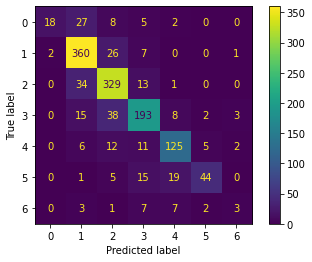

In [845]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov a word frequency

In [846]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_out_gbm, y_train)

GradientBoostingClassifier()

In [847]:
y_pred_train = gbm_model.predict(X_train_combined3_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9842370744010088
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.98      0.99      0.98       913
           2       0.98      0.99      0.98       848
           3       0.99      0.97      0.98       611
           4       1.00      0.98      0.99       401
           5       1.00      0.98      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.98      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [848]:
y_pred = gbm_model.predict(X_test_combined3_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7933823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.37      0.52        60
           1       0.81      0.92      0.86       396
           2       0.78      0.86      0.82       377
           3       0.78      0.77      0.78       259
           4       0.79      0.77      0.78       161
           5       0.82      0.48      0.60        84
           6       0.38      0.13      0.19        23

    accuracy                           0.79      1360
   macro avg       0.75      0.61      0.65      1360
weighted avg       0.79      0.79      0.78      1360



In [849]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [850]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.61
Precision: 0.75
F1 Score: 0.65


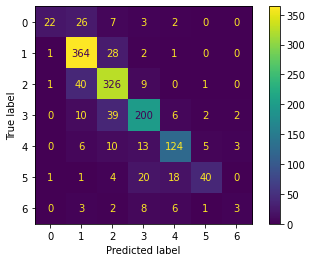

In [851]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov a tfidf word frequency

In [852]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_out_gbm, y_train)

GradientBoostingClassifier()

In [853]:
y_pred_train = gbm_model.predict(X_train_combined4_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9886506935687264
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.98      1.00      0.99       913
           2       0.98      1.00      0.99       848
           3       0.99      0.98      0.99       611
           4       1.00      0.98      0.99       401
           5       1.00      0.96      0.98       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [854]:
y_pred = gbm_model.predict(X_test_combined4_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7889705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.81      0.35      0.49        60
           1       0.82      0.91      0.86       396
           2       0.79      0.87      0.83       377
           3       0.78      0.77      0.77       259
           4       0.77      0.75      0.76       161
           5       0.72      0.46      0.57        84
           6       0.25      0.13      0.17        23

    accuracy                           0.79      1360
   macro avg       0.71      0.61      0.64      1360
weighted avg       0.78      0.79      0.78      1360



In [855]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [856]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.61
Precision: 0.71
F1 Score: 0.64


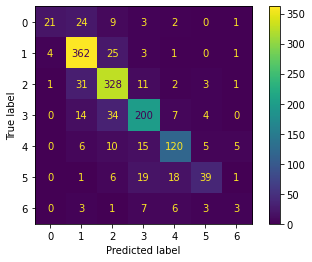

In [857]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním

In [858]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled_gbm, y_train)

GradientBoostingClassifier()

In [859]:
y_pred_train = gbm_model.predict(X_train_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6869482976040353
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67       132
           1       0.68      0.80      0.74       913
           2       0.59      0.72      0.65       848
           3       0.71      0.63      0.67       611
           4       0.79      0.54      0.64       401
           5       0.89      0.57      0.69       219
           6       1.00      0.92      0.96        48

    accuracy                           0.69      3172
   macro avg       0.81      0.67      0.72      3172
weighted avg       0.71      0.69      0.69      3172



In [860]:
y_pred = gbm_model.predict(X_test_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41911764705882354
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.36      0.07      0.11        60
           1       0.54      0.65      0.59       396
           2       0.41      0.46      0.43       377
           3       0.30      0.31      0.30       259
           4       0.36      0.30      0.33       161
           5       0.23      0.11      0.15        84
           6       0.10      0.04      0.06        23

    accuracy                           0.42      1360
   macro avg       0.33      0.28      0.28      1360
weighted avg       0.40      0.42      0.40      1360



In [861]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [862]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.28
Precision: 0.33
F1 Score: 0.28


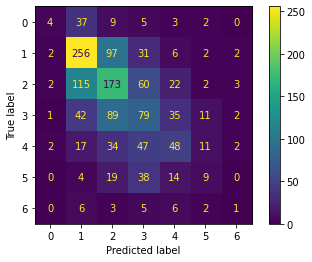

In [863]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním a n-gram

In [864]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scaled_gbm, y_train)

GradientBoostingClassifier()

In [865]:
y_pred_train = gbm_model.predict(X_train_combined_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9013240857503153
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90       132
           1       0.88      0.96      0.92       913
           2       0.85      0.93      0.89       848
           3       0.92      0.87      0.90       611
           4       0.97      0.80      0.88       401
           5       1.00      0.84      0.91       219
           6       1.00      1.00      1.00        48

    accuracy                           0.90      3172
   macro avg       0.95      0.89      0.91      3172
weighted avg       0.91      0.90      0.90      3172



In [866]:
y_pred = gbm_model.predict(X_test_combined_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4308823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.23      0.05      0.08        60
           1       0.59      0.70      0.64       396
           2       0.39      0.51      0.44       377
           3       0.33      0.26      0.29       259
           4       0.32      0.22      0.26       161
           5       0.23      0.15      0.18        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.30      0.27      0.27      1360
weighted avg       0.41      0.43      0.41      1360



In [867]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [868]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.30
F1 Score: 0.27


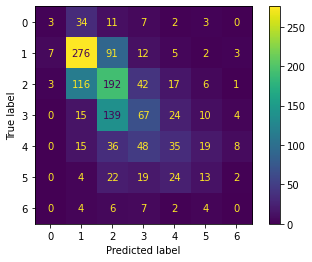

In [869]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním a tfidf n-gram

In [870]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scaled_gbm, y_train)

GradientBoostingClassifier()

In [871]:
y_pred_train = gbm_model.predict(X_train_combined2_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9460907944514502
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       132
           1       0.94      0.98      0.96       913
           2       0.93      0.96      0.94       848
           3       0.94      0.95      0.95       611
           4       0.96      0.91      0.93       401
           5       0.98      0.86      0.92       219
           6       1.00      1.00      1.00        48

    accuracy                           0.95      3172
   macro avg       0.97      0.93      0.95      3172
weighted avg       0.95      0.95      0.95      3172



In [872]:
y_pred = gbm_model.predict(X_test_combined2_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42720588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.21      0.07      0.10        60
           1       0.59      0.68      0.63       396
           2       0.41      0.52      0.46       377
           3       0.30      0.26      0.28       259
           4       0.33      0.24      0.28       161
           5       0.16      0.10      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.43      1360
   macro avg       0.29      0.26      0.27      1360
weighted avg       0.40      0.43      0.41      1360



In [873]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [874]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.26
Precision: 0.29
F1 Score: 0.27


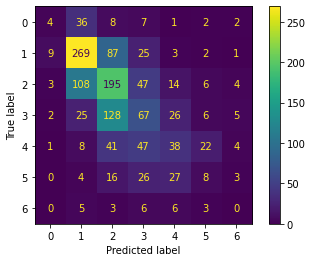

In [875]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním a word frequency

In [876]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_scaled_gbm, y_train)

GradientBoostingClassifier()

In [877]:
y_pred_train = gbm_model.predict(X_train_combined3_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9025851197982345
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       132
           1       0.88      0.96      0.92       913
           2       0.85      0.93      0.89       848
           3       0.92      0.87      0.89       611
           4       0.99      0.81      0.89       401
           5       0.99      0.85      0.92       219
           6       1.00      1.00      1.00        48

    accuracy                           0.90      3172
   macro avg       0.95      0.89      0.92      3172
weighted avg       0.91      0.90      0.90      3172



In [878]:
y_pred = gbm_model.predict(X_test_combined3_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4404411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.05      0.02      0.03        60
           1       0.59      0.70      0.64       396
           2       0.42      0.54      0.47       377
           3       0.34      0.29      0.31       259
           4       0.33      0.24      0.28       161
           5       0.17      0.07      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.44      1360
   macro avg       0.27      0.26      0.26      1360
weighted avg       0.40      0.44      0.42      1360



In [879]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [880]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.44
Recall: 0.26
Precision: 0.27
F1 Score: 0.26


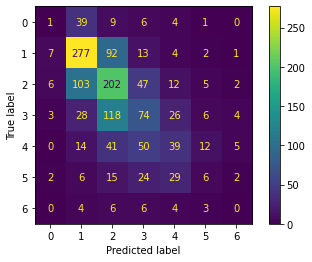

In [881]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním a tfidf word frequency

In [882]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_scaled_gbm, y_train)

GradientBoostingClassifier()

In [883]:
y_pred_train = gbm_model.predict(X_train_combined4_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9281210592686002
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93       132
           1       0.92      0.97      0.95       913
           2       0.89      0.95      0.92       848
           3       0.94      0.90      0.92       611
           4       0.96      0.88      0.92       401
           5       0.99      0.86      0.92       219
           6       1.00      1.00      1.00        48

    accuracy                           0.93      3172
   macro avg       0.96      0.92      0.94      3172
weighted avg       0.93      0.93      0.93      3172



In [884]:
y_pred = gbm_model.predict(X_test_combined4_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41323529411764703
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.07      0.03      0.05        60
           1       0.58      0.68      0.63       396
           2       0.39      0.48      0.43       377
           3       0.28      0.24      0.25       259
           4       0.32      0.23      0.27       161
           5       0.18      0.11      0.14        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.26      0.25      0.25      1360
weighted avg       0.38      0.41      0.39      1360



In [885]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [886]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.25
Precision: 0.26
F1 Score: 0.25


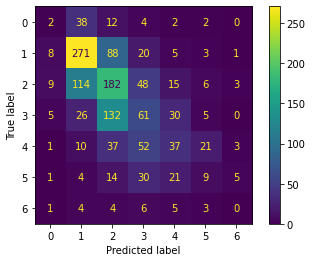

In [887]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním

In [888]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [889]:
y_pred_train = gbm_model.predict(X_train_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.941046658259773
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       132
           1       0.92      0.97      0.94       913
           2       0.91      0.95      0.93       848
           3       0.96      0.91      0.93       611
           4       0.99      0.93      0.96       401
           5       1.00      0.94      0.97       219
           6       1.00      1.00      1.00        48

    accuracy                           0.94      3172
   macro avg       0.97      0.94      0.95      3172
weighted avg       0.94      0.94      0.94      3172



In [890]:
y_pred = gbm_model.predict(X_test_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8580882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76        60
           1       0.85      0.93      0.88       396
           2       0.85      0.90      0.87       377
           3       0.86      0.83      0.85       259
           4       0.85      0.84      0.85       161
           5       0.91      0.76      0.83        84
           6       0.75      0.39      0.51        23

    accuracy                           0.86      1360
   macro avg       0.87      0.75      0.79      1360
weighted avg       0.86      0.86      0.86      1360



In [891]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [892]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.86
Recall: 0.75
Precision: 0.87
F1 Score: 0.79


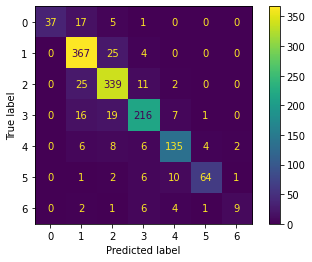

In [893]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním a n-gram

In [894]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [895]:
y_pred_train = gbm_model.predict(X_train_combined_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9829760403530895
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       132
           1       0.97      0.99      0.98       913
           2       0.97      0.99      0.98       848
           3       0.99      0.98      0.99       611
           4       1.00      0.97      0.98       401
           5       1.00      0.98      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [896]:
y_pred = gbm_model.predict(X_test_combined_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7904411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.89      0.40      0.55        60
           1       0.82      0.91      0.86       396
           2       0.79      0.86      0.83       377
           3       0.77      0.80      0.78       259
           4       0.76      0.72      0.74       161
           5       0.81      0.50      0.62        84
           6       0.19      0.13      0.15        23

    accuracy                           0.79      1360
   macro avg       0.72      0.62      0.65      1360
weighted avg       0.79      0.79      0.78      1360



In [897]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [898]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.62
Precision: 0.72
F1 Score: 0.65


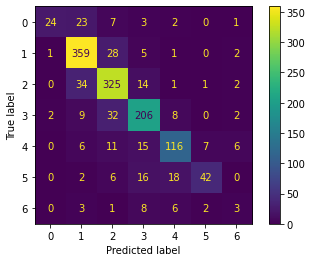

In [899]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním a tfidf n-gram

In [900]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [901]:
y_pred_train = gbm_model.predict(X_train_combined2_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9918032786885246
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.99      1.00      0.99       913
           2       0.99      1.00      0.99       848
           3       0.99      0.99      0.99       611
           4       1.00      0.97      0.99       401
           5       1.00      0.97      0.99       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [902]:
y_pred = gbm_model.predict(X_test_combined2_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7867647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.86      0.30      0.44        60
           1       0.81      0.91      0.86       396
           2       0.79      0.87      0.83       377
           3       0.77      0.75      0.76       259
           4       0.77      0.77      0.77       161
           5       0.83      0.51      0.63        84
           6       0.25      0.13      0.17        23

    accuracy                           0.79      1360
   macro avg       0.72      0.61      0.64      1360
weighted avg       0.78      0.79      0.78      1360



In [903]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [904]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.61
Precision: 0.72
F1 Score: 0.64


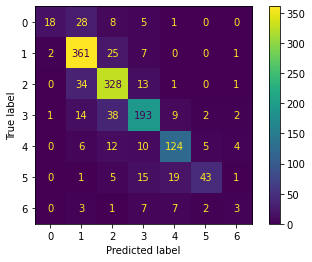

In [905]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním a word frequency

In [906]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [907]:
y_pred_train = gbm_model.predict(X_train_combined3_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9829760403530895
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.97      0.99      0.98       913
           2       0.97      0.99      0.98       848
           3       0.99      0.97      0.98       611
           4       1.00      0.97      0.98       401
           5       1.00      0.97      0.98       219
           6       1.00      1.00      1.00        48

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [908]:
y_pred = gbm_model.predict(X_test_combined3_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7830882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.87      0.33      0.48        60
           1       0.81      0.91      0.86       396
           2       0.79      0.86      0.82       377
           3       0.76      0.76      0.76       259
           4       0.76      0.74      0.75       161
           5       0.82      0.48      0.60        84
           6       0.23      0.13      0.17        23

    accuracy                           0.78      1360
   macro avg       0.72      0.60      0.63      1360
weighted avg       0.78      0.78      0.77      1360



In [909]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [910]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.78
Recall: 0.60
Precision: 0.72
F1 Score: 0.63


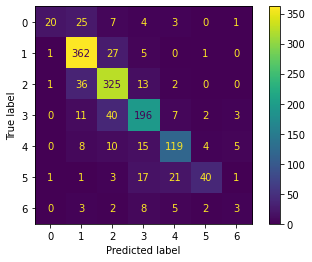

In [911]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním a tfidf word frequency

In [912]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [913]:
y_pred_train = gbm_model.predict(X_train_combined4_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9908575031525851
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       0.98      1.00      0.99       913
           2       0.99      1.00      0.99       848
           3       0.99      0.99      0.99       611
           4       1.00      0.98      0.99       401
           5       1.00      0.97      0.98       219
           6       1.00      1.00      1.00        48

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [914]:
y_pred = gbm_model.predict(X_test_combined4_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7904411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.79      0.38      0.52        60
           1       0.82      0.91      0.86       396
           2       0.79      0.87      0.83       377
           3       0.78      0.77      0.78       259
           4       0.77      0.75      0.76       161
           5       0.74      0.50      0.60        84
           6       0.33      0.13      0.19        23

    accuracy                           0.79      1360
   macro avg       0.72      0.62      0.65      1360
weighted avg       0.78      0.79      0.78      1360



In [915]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [916]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.62
Precision: 0.72
F1 Score: 0.65


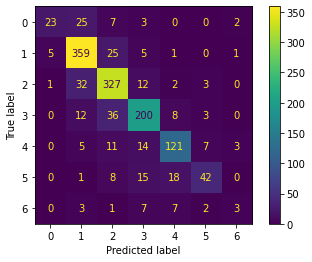

In [917]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [918]:
results_gbm2 = pd.DataFrame(results_list2_gbm)
print(results_gbm2)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0         0.705233       0.432353         0.817789        0.332041   
1         0.899748       0.428676         0.945024        0.278000   
2         0.946721       0.427206         0.967858        0.290256   
3         0.894704       0.423529         0.944847        0.247692   
4         0.926545       0.435294         0.956156        0.272865   
5         0.941047       0.858088         0.967705        0.866720   
6         0.982976       0.792647         0.990876        0.727701   
7         0.991803       0.788235         0.995320        0.742347   
8         0.984237       0.793382         0.991412        0.748285   
9         0.988651       0.788971         0.993571        0.705627   
10        0.686948       0.419118         0.808954        0.327919   
11        0.901324       0.430882         0.945954        0.298967   
12        0.946091       0.427206         0.965499        0.285880   
13        0.902585  

Podľa výsledkov po druhom testovani gbm môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým testom sa accuray mierne zvýšilo. Aj ked sme zníšili počet črt, tak model je stále pretrénovaný.

HYPERPARAMETRE

Teraz vykonáme testovanie 3, pričom použijeme datasety s výberom črt. Preddefinujeme si hyperparametre, ktoré bude gridsearch skúšať a bude hľadať tú najlepšiu kombináciu aby dosiahol čím najvýšie accuracy. Potom s týmito parametrami si spustíme predikciu na trenovacej aj testovacej sade.

SVC - bez osetrenia outlierov a skalovania

In [1231]:
results_list3_svc=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [1232]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0, 1.5],
}

Grid search - vyskúša každú kombináciu hyperparametrov a vypíše tu najlepšiu pre accuracy

In [ ]:
model = SVC()
grid_search = RandomizedSearchCV(n_iter=10, estimator=model, param_distributions=param_grid, cv=2, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Predikovanie na trenovacich datach

In [ ]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Predikovanie na testovacich datach

In [ ]:
y_pred = best_model.predict(X_test_svc)

In [ ]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Vizualizácia výkonnosti modelu

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a ngram

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a tfidf ngram

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined2_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined2_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a word frequency

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined3_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined3_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a tfidf word frequency

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined4_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined4_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov

In [ ]:
model = SVC()
grid_search = RandomizedSearchCV(n_iter=20, estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_out_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = best_model.predict(X_test_out_svc)

In [ ]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC -  s osetrenim outlierov a ngram

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined_out_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC -  s osetrenim outlierov a tfidf ngram

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined2_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined2_out_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a word frequency

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined3_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined3_out_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a tfidf word frequency

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined4_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined4_out_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim

In [ ]:
model = SVC()
grid_search =  RandomizedSearchCV(n_iter=20, estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_scaled_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scaled_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = best_model.predict(X_test_scaled_svc)

In [ ]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a ngram

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined_scaled_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined_scaled_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a tfidf ngram

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined2_scaled_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined2_scaled_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a word frequency

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined3_scaled_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined3_scaled_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a tfidf word frequency

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined4_scaled_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined4_scaled_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim 

In [ ]:
model = SVC()
grid_search =  RandomizedSearchCV(n_iter=20, estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_scal_out_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scal_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = best_model.predict(X_test_scal_out_svc)

In [ ]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a ngram

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined_scal_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined_scal_out_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a tfidf n-gram

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined2_scal_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined2_scal_out_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a word frequency

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined3_scal_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined3_scal_out_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a tfidf word frequency

In [ ]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

In [ ]:
y_pred_train = model.predict(X_train_combined4_scal_out_svc)

In [ ]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

In [ ]:
y_pred = model.predict(X_test_combined4_scal_out_svc)

In [ ]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [ ]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

In [ ]:
results3_svc = pd.DataFrame(results_list3_svc)
print(results3_svc)

RANDOM FOREST - bez osetrenia outlierov a skalovania

In [931]:
results_list3_rf=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [932]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Počet stromov v lese
    'max_depth': [None, 10, 20, 30, 40],  # Maximálna hĺbka stromu
    'min_samples_split': [2, 5, 10],  # Minimálny počet vzoriek potrebný na rozdelenie uzla
    'min_samples_leaf': [1, 2, 4]  # Minimálny počet vzoriek potrebný v listovom uzle
}

Grid search - bude skúšať všetky kombinácie hyperparametrov a vyberie tie najlepšie pre accuracy

In [933]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Najlepší skóre: 0.38681288655952706


Predikovanie na trenovacich datach

In [934]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_rf)

In [935]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.7503152585119798
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       132
           1       0.70      0.90      0.79       913
           2       0.70      0.86      0.77       848
           3       0.85      0.75      0.80       611
           4       0.83      0.62      0.71       401
           5       0.94      0.53      0.67       219
           6       1.00      0.04      0.08        48

    accuracy                           0.75      3172
   macro avg       0.86      0.53      0.55      3172
weighted avg       0.78      0.75      0.73      3172



Predikovanie na testovacich datach

In [936]:
y_pred_rf = best_rf_model.predict(X_test_rf)

In [937]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [938]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.66      0.58       396
           2       0.38      0.49      0.43       377
           3       0.31      0.25      0.28       259
           4       0.32      0.27      0.29       161
           5       0.31      0.11      0.16        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.26      0.25      0.25      1360
weighted avg       0.37      0.41      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

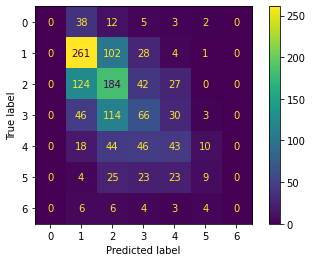

In [939]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania s ngram

In [940]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [941]:
y_pred_train_rf = model.predict(X_train_combined_rf)

In [942]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.8458385876418664
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.80      0.99      0.89       913
           2       0.79      0.95      0.86       848
           3       0.93      0.91      0.92       611
           4       0.96      0.70      0.81       401
           5       0.99      0.62      0.76       219
           6       0.00      0.00      0.00        48

    accuracy                           0.85      3172
   macro avg       0.64      0.60      0.61      3172
weighted avg       0.81      0.85      0.82      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [943]:
y_pred_rf = model.predict(X_test_combined_rf)

In [944]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [945]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.41911764705882354
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.72      0.61       396
           2       0.35      0.51      0.42       377
           3       0.32      0.20      0.25       259
           4       0.34      0.21      0.26       161
           5       0.57      0.05      0.09        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.30      0.24      0.23      1360
weighted avg       0.39      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


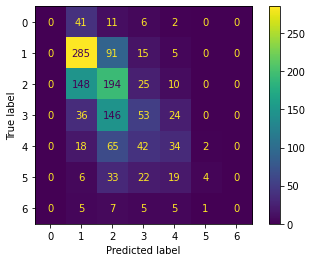

In [946]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania a tfidf gram

In [947]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [948]:
y_pred_train_rf = model.predict(X_train_combined2_rf)

In [949]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.8789407313997478
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.86      0.99      0.92       913
           2       0.83      0.99      0.91       848
           3       0.91      0.98      0.94       611
           4       0.95      0.80      0.87       401
           5       0.99      0.59      0.74       219
           6       0.00      0.00      0.00        48

    accuracy                           0.88      3172
   macro avg       0.65      0.62      0.63      3172
weighted avg       0.84      0.88      0.85      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [950]:
y_pred_rf = model.predict(X_test_combined2_rf)

In [951]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [952]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.41102941176470587
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.71      0.61       396
           2       0.36      0.49      0.41       377
           3       0.26      0.21      0.23       259
           4       0.37      0.22      0.28       161
           5       0.67      0.05      0.09        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.31      0.24      0.23      1360
weighted avg       0.39      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


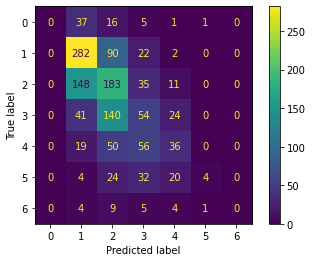

In [953]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania a word frequency

In [954]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [955]:
y_pred_train_rf = model.predict(X_train_combined3_rf)

In [956]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.8259773013871374
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.78      0.99      0.87       913
           2       0.77      0.92      0.84       848
           3       0.92      0.89      0.90       611
           4       0.95      0.68      0.80       401
           5       0.99      0.56      0.72       219
           6       0.00      0.00      0.00        48

    accuracy                           0.83      3172
   macro avg       0.63      0.58      0.59      3172
weighted avg       0.80      0.83      0.80      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [957]:
y_pred_rf = model.predict(X_test_combined3_rf)

In [958]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [959]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4088235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.72      0.61       396
           2       0.35      0.50      0.41       377
           3       0.27      0.16      0.20       259
           4       0.34      0.22      0.27       161
           5       0.50      0.04      0.07        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.28      0.24      0.22      1360
weighted avg       0.37      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


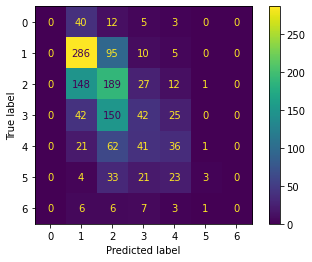

In [960]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania a tfidf word frequency

In [961]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [962]:
y_pred_train_rf = model.predict(X_train_combined4_rf)

In [963]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.8846153846153846
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02       132
           1       0.86      1.00      0.92       913
           2       0.84      0.99      0.91       848
           3       0.93      0.97      0.95       611
           4       0.96      0.82      0.89       401
           5       0.99      0.63      0.77       219
           6       0.00      0.00      0.00        48

    accuracy                           0.88      3172
   macro avg       0.80      0.63      0.64      3172
weighted avg       0.88      0.88      0.86      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [964]:
y_pred_rf = model.predict(X_test_combined4_rf)

In [965]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [966]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4227941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.55      0.69      0.61       396
           2       0.37      0.55      0.44       377
           3       0.25      0.19      0.22       259
           4       0.41      0.25      0.31       161
           5       0.33      0.02      0.04        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.27      0.24      0.23      1360
weighted avg       0.38      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


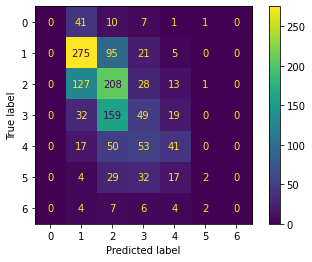

In [967]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov

In [968]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_out_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Najlepší skóre: 0.690727042400457


In [969]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_out_rf)

In [970]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9971626733921816
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.99      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      0.99      1.00       401
           5       1.00      0.99      1.00       219
           6       1.00      0.98      0.99        48

    accuracy                           1.00      3172
   macro avg       1.00      0.99      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [971]:
y_pred_rf = best_rf_model.predict(X_test_out_rf)

In [972]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

In [973]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.7426470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.93      0.22      0.35        60
           1       0.74      0.88      0.80       396
           2       0.75      0.81      0.78       377
           3       0.76      0.71      0.73       259
           4       0.69      0.71      0.70       161
           5       0.81      0.50      0.62        84
           6       0.67      0.09      0.15        23

    accuracy                           0.74      1360
   macro avg       0.76      0.56      0.59      1360
weighted avg       0.75      0.74      0.73      1360



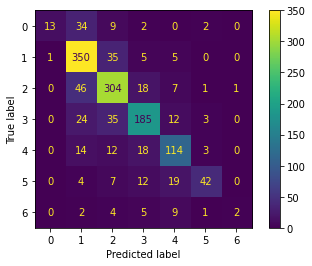

In [974]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a ngram

In [975]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=20, min_samples_split=5)

In [976]:
y_pred_train_rf = model.predict(X_train_combined_out_rf)

In [977]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9996847414880202
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [978]:
y_pred_rf = model.predict(X_test_combined_out_rf)

In [979]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [980]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4764705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.59      0.79      0.67       396
           2       0.43      0.59      0.50       377
           3       0.35      0.25      0.30       259
           4       0.37      0.25      0.30       161
           5       0.33      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.48      1360
   macro avg       0.30      0.28      0.27      1360
weighted avg       0.42      0.48      0.43      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


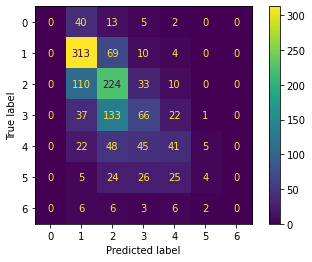

In [981]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a tfidf ngram

In [982]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=20, min_samples_split=5)

In [983]:
y_pred_train_rf = model.predict(X_train_combined2_out_rf)

In [984]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [985]:
y_pred_rf = model.predict(X_test_combined2_out_rf)

In [986]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [987]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4610294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.58      0.76      0.66       396
           2       0.40      0.56      0.47       377
           3       0.35      0.28      0.31       259
           4       0.36      0.22      0.27       161
           5       0.36      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.46      1360
   macro avg       0.29      0.27      0.26      1360
weighted avg       0.41      0.46      0.42      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


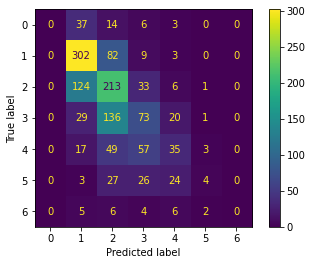

In [988]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a word frequency

In [989]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=20, min_samples_split=5)

In [990]:
y_pred_train_rf = model.predict(X_train_combined3_out_rf)

In [991]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9996847414880202
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [992]:
y_pred_rf = model.predict(X_test_combined3_out_rf)

In [993]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [994]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5110294117647058
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.62      0.80      0.70       396
           2       0.47      0.65      0.55       377
           3       0.41      0.34      0.37       259
           4       0.39      0.25      0.30       161
           5       0.38      0.06      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.51      1360
   macro avg       0.33      0.30      0.29      1360
weighted avg       0.46      0.51      0.47      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


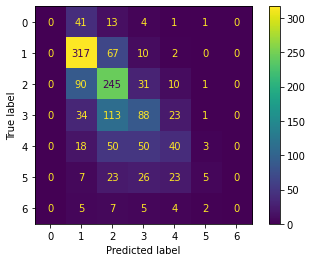

In [995]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a tfidf word frequency

In [996]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=20, min_samples_split=5)

In [997]:
y_pred_train_rf = model.predict(X_train_combined4_out_rf)

In [998]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [999]:
y_pred_rf = model.predict(X_test_combined4_out_rf)

In [1000]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1001]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.49264705882352944
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.61      0.79      0.69       396
           2       0.44      0.60      0.51       377
           3       0.38      0.32      0.35       259
           4       0.42      0.29      0.34       161
           5       0.31      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.49      1360
   macro avg       0.31      0.29      0.28      1360
weighted avg       0.44      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


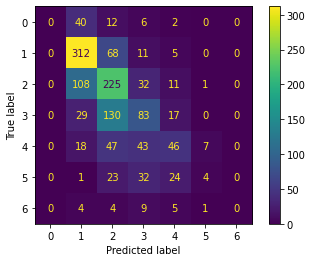

In [1002]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim

In [1003]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_scaled_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Najlepší skóre: 0.37106336471348017


In [1004]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_scaled_rf)

In [1005]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.8439470365699874
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22       132
           1       0.79      0.97      0.87       913
           2       0.84      0.93      0.88       848
           3       0.89      0.87      0.88       611
           4       0.89      0.76      0.82       401
           5       0.95      0.68      0.79       219
           6       1.00      0.17      0.29        48

    accuracy                           0.84      3172
   macro avg       0.91      0.64      0.68      3172
weighted avg       0.86      0.84      0.83      3172



In [1006]:
y_pred_rf = best_rf_model.predict(X_test_scaled_rf)

In [1007]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1008]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.39705882352941174
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.50      0.62      0.55       396
           2       0.38      0.47      0.42       377
           3       0.29      0.26      0.28       259
           4       0.32      0.26      0.29       161
           5       0.24      0.10      0.14        84
           6       0.00      0.00      0.00        23

    accuracy                           0.40      1360
   macro avg       0.25      0.24      0.24      1360
weighted avg       0.36      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


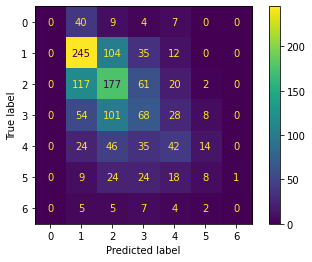

In [1009]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a ngram

In [1010]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [1011]:
y_pred_train_rf = model.predict(X_train_combined_scaled_rf)

In [1012]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9514501891551072
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56       132
           1       0.91      1.00      0.95       913
           2       0.97      1.00      0.98       848
           3       0.96      1.00      0.98       611
           4       0.97      0.97      0.97       401
           5       1.00      0.92      0.96       219
           6       1.00      0.21      0.34        48

    accuracy                           0.95      3172
   macro avg       0.97      0.78      0.82      3172
weighted avg       0.95      0.95      0.94      3172



In [1013]:
y_pred_rf = model.predict(X_test_combined_scaled_rf)

In [1014]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1015]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.3977941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.70      0.60       396
           2       0.34      0.46      0.39       377
           3       0.26      0.20      0.23       259
           4       0.30      0.18      0.22       161
           5       0.38      0.07      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.40      1360
   macro avg       0.26      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


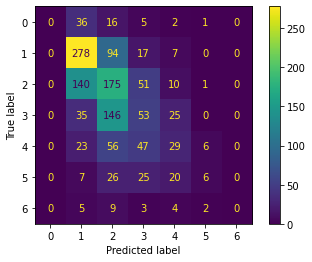

In [1016]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a tfidf ngram

In [1017]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [1018]:
y_pred_train_rf = model.predict(X_train_combined2_scaled_rf)

In [1019]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.957124842370744
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.70       132
           1       0.92      1.00      0.96       913
           2       0.96      1.00      0.98       848
           3       0.98      0.99      0.98       611
           4       0.97      0.97      0.97       401
           5       0.99      0.92      0.95       219
           6       1.00      0.25      0.40        48

    accuracy                           0.96      3172
   macro avg       0.97      0.81      0.85      3172
weighted avg       0.96      0.96      0.95      3172



In [1020]:
y_pred_rf = model.predict(X_test_combined2_scaled_rf)

In [1021]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1022]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4176470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.72      0.60       396
           2       0.36      0.45      0.40       377
           3       0.31      0.25      0.28       259
           4       0.35      0.25      0.30       161
           5       0.32      0.07      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.27      0.25      0.24      1360
weighted avg       0.37      0.42      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


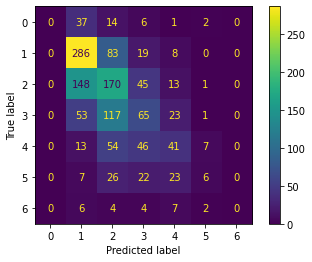

In [1023]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a word frequency

In [1024]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [1025]:
y_pred_train_rf = model.predict(X_train_combined3_scaled_rf)

In [1026]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9445145018915511
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.37      0.54       132
           1       0.91      1.00      0.95       913
           2       0.95      1.00      0.97       848
           3       0.96      0.99      0.97       611
           4       0.98      0.95      0.96       401
           5       0.99      0.87      0.92       219
           6       1.00      0.29      0.45        48

    accuracy                           0.94      3172
   macro avg       0.97      0.78      0.83      3172
weighted avg       0.95      0.94      0.94      3172



In [1027]:
y_pred_rf = model.predict(X_test_combined3_scaled_rf)

In [1028]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1029]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4022058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.51      0.70      0.59       396
           2       0.35      0.47      0.40       377
           3       0.28      0.22      0.25       259
           4       0.36      0.20      0.26       161
           5       0.19      0.04      0.06        84
           6       0.00      0.00      0.00        23

    accuracy                           0.40      1360
   macro avg       0.24      0.23      0.22      1360
weighted avg       0.35      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


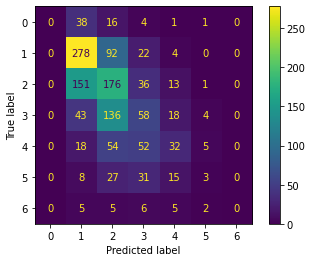

In [1030]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a tfidf word frequency

In [1031]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [1032]:
y_pred_train_rf = model.predict(X_train_combined4_scaled_rf)

In [1033]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9564943253467844
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.66       132
           1       0.92      1.00      0.96       913
           2       0.96      1.00      0.98       848
           3       0.97      0.99      0.98       611
           4       0.99      0.97      0.98       401
           5       1.00      0.89      0.94       219
           6       1.00      0.44      0.61        48

    accuracy                           0.96      3172
   macro avg       0.98      0.83      0.87      3172
weighted avg       0.96      0.96      0.95      3172



In [1034]:
y_pred_rf = model.predict(X_test_combined4_scaled_rf)

In [1035]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1036]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.39558823529411763
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.52      0.69      0.59       396
           2       0.34      0.46      0.39       377
           3       0.25      0.19      0.21       259
           4       0.36      0.25      0.29       161
           5       0.20      0.04      0.06        84
           6       0.00      0.00      0.00        23

    accuracy                           0.40      1360
   macro avg       0.24      0.23      0.22      1360
weighted avg       0.35      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


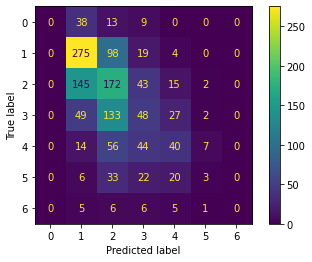

In [1037]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim

In [1038]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_scal_out_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.6828505427357858


In [1039]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_scal_out_rf)

In [1040]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9952711223203027
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       132
           1       0.99      1.00      0.99       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      0.99      1.00       401
           5       1.00      0.98      0.99       219
           6       1.00      0.96      0.98        48

    accuracy                           1.00      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       1.00      1.00      1.00      3172



In [1041]:
y_pred_rf = best_rf_model.predict(X_test_scal_out_rf)

In [1042]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

In [1043]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.7014705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.93      0.22      0.35        60
           1       0.75      0.86      0.80       396
           2       0.71      0.75      0.73       377
           3       0.64      0.66      0.65       259
           4       0.61      0.66      0.63       161
           5       0.70      0.46      0.56        84
           6       1.00      0.04      0.08        23

    accuracy                           0.70      1360
   macro avg       0.76      0.52      0.54      1360
weighted avg       0.71      0.70      0.69      1360



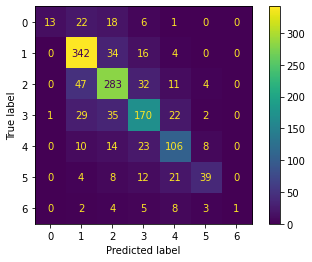

In [1044]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a ngram

In [1045]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=200)

In [1046]:
y_pred_train_rf = model.predict(X_train_combined_scal_out_rf)

In [1047]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1048]:
y_pred_rf = model.predict(X_test_combined_scal_out_rf)

In [1049]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1050]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4875
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.63      0.80      0.70       396
           2       0.43      0.63      0.51       377
           3       0.34      0.25      0.29       259
           4       0.42      0.26      0.32       161
           5       0.20      0.02      0.04        84
           6       0.00      0.00      0.00        23

    accuracy                           0.49      1360
   macro avg       0.29      0.28      0.27      1360
weighted avg       0.43      0.49      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


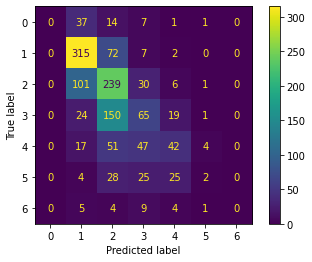

In [1051]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a tfidf ngram

In [1052]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=200)

In [1053]:
y_pred_train_rf = model.predict(X_train_combined2_scal_out_rf)

In [1054]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1055]:
y_pred_rf = model.predict(X_test_combined2_scal_out_rf)

In [1056]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1057]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4551470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.57      0.78      0.66       396
           2       0.40      0.53      0.46       377
           3       0.33      0.25      0.29       259
           4       0.36      0.25      0.29       161
           5       0.38      0.04      0.07        84
           6       0.00      0.00      0.00        23

    accuracy                           0.46      1360
   macro avg       0.29      0.26      0.25      1360
weighted avg       0.41      0.46      0.41      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


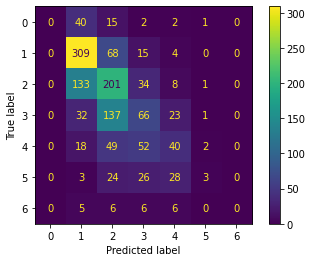

In [1058]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a word frequency

In [1059]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=200)

In [1060]:
y_pred_train_rf = model.predict(X_train_combined3_scal_out_rf)

In [1061]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1062]:
y_pred_rf = model.predict(X_test_combined3_scal_out_rf)

In [1063]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1064]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4860294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.62      0.77      0.69       396
           2       0.43      0.63      0.51       377
           3       0.37      0.29      0.33       259
           4       0.39      0.26      0.31       161
           5       0.30      0.04      0.06        84
           6       0.00      0.00      0.00        23

    accuracy                           0.49      1360
   macro avg       0.30      0.28      0.27      1360
weighted avg       0.44      0.49      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


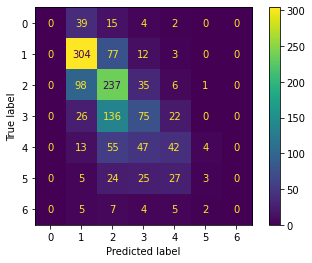

In [1065]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a tfidf word frequency

In [1066]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=200)

In [1067]:
y_pred_train_rf = model.predict(X_train_combined4_scal_out_rf)

In [1068]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1069]:
y_pred_rf = model.predict(X_test_combined4_scal_out_rf)

In [1070]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1071]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5022058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.63      0.81      0.71       396
           2       0.44      0.63      0.52       377
           3       0.39      0.30      0.34       259
           4       0.43      0.29      0.34       161
           5       0.33      0.05      0.08        84
           6       0.00      0.00      0.00        23

    accuracy                           0.50      1360
   macro avg       0.32      0.29      0.28      1360
weighted avg       0.45      0.50      0.46      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


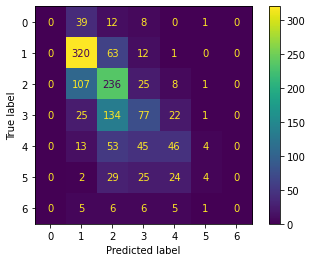

In [1072]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

In [1073]:
results_rf3 = pd.DataFrame(results_list3_rf)
print(results_rf3)

    best_score  accuracy_train  accuracy_test  precision_train  \
0     0.386813        0.750315       0.413971         0.861470   
1          NaN        0.845839       0.419118         0.640097   
2          NaN        0.878941       0.411029         0.650196   
3          NaN        0.825977       0.408824         0.630621   
4          NaN        0.884615       0.422794         0.797993   
5     0.690727        0.997163       0.742647         0.998577   
6          NaN        0.999685       0.476471         0.999844   
7          NaN        1.000000       0.461029         1.000000   
8          NaN        0.999685       0.511029         0.999844   
9          NaN        1.000000       0.492647         1.000000   
10    0.371063        0.843947       0.397059         0.908344   
11         NaN        0.951450       0.397794         0.973065   
12         NaN        0.957125       0.417647         0.974781   
13         NaN        0.944515       0.402206         0.968653   
14        

Najlepšie výsledky nám dosiahol dataset s ošetrenými outliermi. Skore sa mierne zvýsilo od minulého testu. Mnoho variant datasetu znížilo svoju presnosť, pretože sme na nich nevykonali gridsearch a tie hyperparametry, ktoré sme k nim priradili neboli ideálne pre nich

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania

In [1074]:
results_list3_gbm=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [1075]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Počet stromov v lese
    'max_depth': [None, 10, 20, 30, 40],  # Maximálna hĺbka stromu
    'min_samples_split': [2, 5, 10],  # Minimálny počet vzoriek potrebný na rozdelenie uzla
    'min_samples_leaf': [1, 2, 4]  # Minimálny počet vzoriek potrebný v listovom uzle
}

Grid search - vyskuša všetky kombinacie hyperparametrov a vyberie najlepší z nich podľa accuracy

In [1076]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Najlepší skóre: 0.37925283787476094


Predikovanie na trenovacich datach

In [1077]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_gbm)

In [1078]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [1079]:
y_pred_gbm = best_gbm_model.predict(X_test_gbm)

In [1080]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1081]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.3786764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.29      0.03      0.06        60
           1       0.51      0.58      0.54       396
           2       0.36      0.47      0.41       377
           3       0.26      0.27      0.26       259
           4       0.29      0.19      0.23       161
           5       0.20      0.10      0.13        84
           6       0.00      0.00      0.00        23

    accuracy                           0.38      1360
   macro avg       0.27      0.23      0.23      1360
weighted avg       0.36      0.38      0.36      1360



Vizualizácia výkonnosti modelu

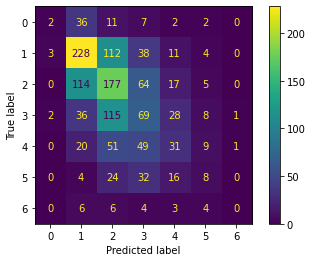

In [1082]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania a ngram

In [1083]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4)

In [1084]:
y_pred_train_gbm = model.predict(X_train_combined_gbm)

In [1085]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1086]:
y_pred_gbm = model.predict(X_test_combined_gbm)

In [1087]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1088]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4426470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        60
           1       0.60      0.71      0.65       396
           2       0.41      0.49      0.44       377
           3       0.30      0.35      0.33       259
           4       0.33      0.22      0.27       161
           5       0.28      0.08      0.13        84
           6       0.00      0.00      0.00        23

    accuracy                           0.44      1360
   macro avg       0.35      0.27      0.27      1360
weighted avg       0.42      0.44      0.42      1360



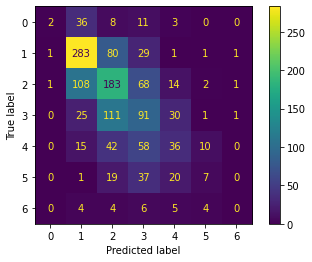

In [1089]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania a tfidf ngram

In [1090]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4)

In [1091]:
y_pred_train_gbm = model.predict(X_train_combined2_gbm)

In [1092]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1093]:
y_pred_gbm = model.predict(X_test_combined2_gbm)

In [1094]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1095]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4183823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.02      0.03        60
           1       0.58      0.68      0.63       396
           2       0.39      0.48      0.43       377
           3       0.30      0.33      0.31       259
           4       0.24      0.16      0.19       161
           5       0.17      0.07      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.26      0.25      0.24      1360
weighted avg       0.38      0.42      0.39      1360



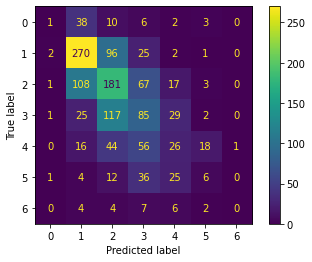

In [1096]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania a word frequency

In [1097]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4)

In [1098]:
y_pred_train_gbm = model.predict(X_train_combined3_gbm)

In [1099]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1100]:
y_pred_gbm = model.predict(X_test_combined3_gbm)

In [1101]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1102]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.43970588235294117
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.61      0.70      0.65       396
           2       0.42      0.48      0.45       377
           3       0.29      0.40      0.34       259
           4       0.33      0.17      0.23       161
           5       0.26      0.08      0.13        84
           6       0.00      0.00      0.00        23

    accuracy                           0.44      1360
   macro avg       0.27      0.26      0.26      1360
weighted avg       0.41      0.44      0.41      1360



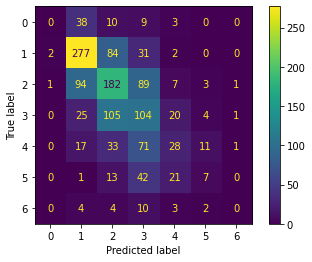

In [1103]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania a tfidf word frequency

In [1104]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4)

In [1105]:
y_pred_train_gbm = model.predict(X_train_combined4_gbm)

In [1106]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1107]:
y_pred_gbm = model.predict(X_test_combined4_gbm)

In [1108]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1109]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4404411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.29      0.03      0.06        60
           1       0.61      0.68      0.64       396
           2       0.42      0.47      0.45       377
           3       0.33      0.45      0.38       259
           4       0.28      0.18      0.22       161
           5       0.18      0.07      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.44      1360
   macro avg       0.30      0.27      0.26      1360
weighted avg       0.41      0.44      0.42      1360



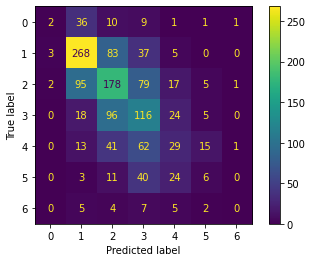

In [1110]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov

In [1119]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_out_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Najlepší skóre: 0.7998087384187386


In [1120]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_out_gbm)

In [1121]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1122]:
y_pred_gbm = best_gbm_model.predict(X_test_out_gbm)

In [1123]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1124]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        60
           1       0.82      0.90      0.86       396
           2       0.81      0.87      0.84       377
           3       0.80      0.76      0.78       259
           4       0.78      0.76      0.77       161
           5       0.80      0.73      0.76        84
           6       0.78      0.30      0.44        23

    accuracy                           0.81      1360
   macro avg       0.81      0.69      0.73      1360
weighted avg       0.81      0.81      0.81      1360



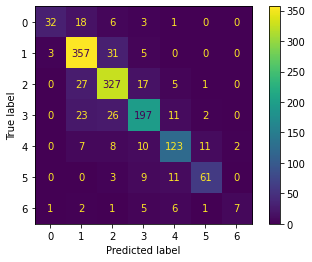

In [1125]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a ngram

In [1126]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1127]:
y_pred_train_gbm = model.predict(X_train_combined_out_gbm)

In [1128]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1129]:
y_pred_gbm = model.predict(X_test_combined_out_gbm)

In [1130]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1131]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7816176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.86      0.30      0.44        60
           1       0.79      0.90      0.84       396
           2       0.83      0.80      0.81       377
           3       0.71      0.82      0.76       259
           4       0.77      0.79      0.78       161
           5       0.80      0.56      0.66        84
           6       0.00      0.00      0.00        23

    accuracy                           0.78      1360
   macro avg       0.68      0.60      0.61      1360
weighted avg       0.77      0.78      0.77      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


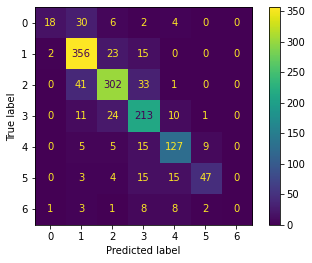

In [1132]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a tfidf ngram

In [1133]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1134]:
y_pred_train_gbm = model.predict(X_train_combined2_out_gbm)

In [1135]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1136]:
y_pred_gbm = model.predict(X_test_combined2_out_gbm)

In [1137]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1138]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7580882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.82      0.30      0.44        60
           1       0.79      0.87      0.83       396
           2       0.80      0.79      0.79       377
           3       0.70      0.78      0.74       259
           4       0.69      0.83      0.75       161
           5       0.75      0.48      0.58        84
           6       0.00      0.00      0.00        23

    accuracy                           0.76      1360
   macro avg       0.65      0.58      0.59      1360
weighted avg       0.75      0.76      0.74      1360



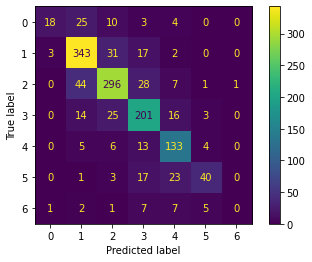

In [1139]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a word frequency

In [1140]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1141]:
y_pred_train_gbm = model.predict(X_train_combined3_out_gbm)

In [1142]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1143]:
y_pred_gbm = model.predict(X_test_combined3_out_gbm)

In [1144]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1145]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7838235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        60
           1       0.80      0.90      0.85       396
           2       0.83      0.82      0.83       377
           3       0.72      0.83      0.77       259
           4       0.75      0.75      0.75       161
           5       0.72      0.55      0.62        84
           6       0.00      0.00      0.00        23

    accuracy                           0.78      1360
   macro avg       0.69      0.60      0.62      1360
weighted avg       0.78      0.78      0.77      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


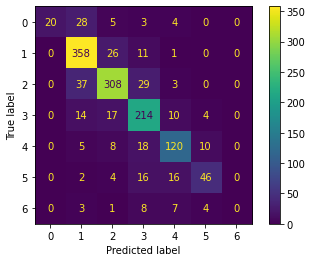

In [1146]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a tfidf word frequency

In [1147]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1148]:
y_pred_train_gbm = model.predict(X_train_combined4_out_gbm)

In [1149]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1150]:
y_pred_gbm = model.predict(X_test_combined4_out_gbm)

In [1151]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1152]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7757352941176471
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.35      0.50        60
           1       0.79      0.88      0.83       396
           2       0.80      0.83      0.81       377
           3       0.75      0.79      0.77       259
           4       0.75      0.79      0.77       161
           5       0.69      0.52      0.59        84
           6       0.00      0.00      0.00        23

    accuracy                           0.78      1360
   macro avg       0.66      0.59      0.61      1360
weighted avg       0.76      0.78      0.76      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


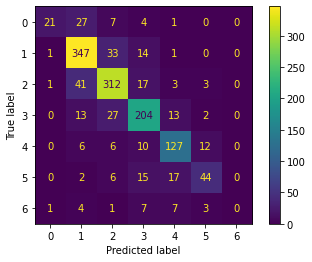

In [1153]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim

In [1154]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_scaled_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Najlepší skóre: 0.3710529322635932


In [1155]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_scaled_gbm)

In [1156]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1157]:
y_pred_gbm = best_gbm_model.predict(X_test_scaled_gbm)

In [1158]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1159]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.3602941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.02      0.03        60
           1       0.51      0.54      0.52       396
           2       0.33      0.43      0.37       377
           3       0.27      0.27      0.27       259
           4       0.29      0.24      0.27       161
           5       0.12      0.06      0.08        84
           6       0.07      0.04      0.05        23

    accuracy                           0.36      1360
   macro avg       0.24      0.23      0.23      1360
weighted avg       0.34      0.36      0.35      1360



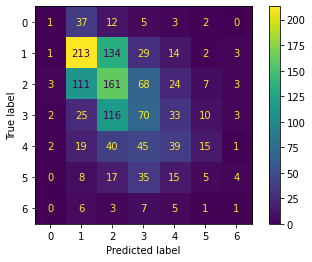

In [1160]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a ngram

In [1161]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [1162]:
y_pred_train_gbm = model.predict(X_train_combined_scaled_gbm)

In [1163]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1164]:
y_pred_gbm = model.predict(X_test_combined_scaled_gbm)

In [1165]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1166]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.40955882352941175
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.09      0.02      0.03        60
           1       0.57      0.69      0.62       396
           2       0.40      0.43      0.41       377
           3       0.29      0.32      0.30       259
           4       0.27      0.19      0.22       161
           5       0.17      0.10      0.12        84
           6       0.00      0.00      0.00        23

    accuracy                           0.41      1360
   macro avg       0.26      0.25      0.24      1360
weighted avg       0.38      0.41      0.39      1360



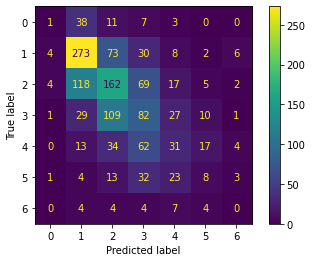

In [1167]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a tfidf ngram

In [1168]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [1169]:
y_pred_train_gbm = model.predict(X_train_combined2_scaled_gbm)

In [1170]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1171]:
y_pred_gbm = model.predict(X_test_combined2_scaled_gbm)

In [1172]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1173]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.41911764705882354
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.20      0.05      0.08        60
           1       0.59      0.68      0.63       396
           2       0.38      0.46      0.42       377
           3       0.30      0.32      0.31       259
           4       0.26      0.17      0.20       161
           5       0.34      0.14      0.20        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.30      0.26      0.26      1360
weighted avg       0.40      0.42      0.40      1360



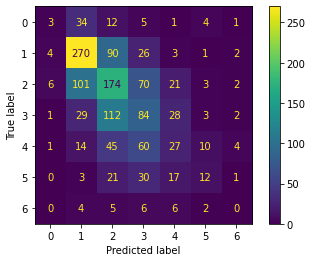

In [1174]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a word frequency

In [1175]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [1176]:
y_pred_train_gbm = model.predict(X_train_combined3_scaled_gbm)

In [1177]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1178]:
y_pred_gbm = model.predict(X_test_combined3_scaled_gbm)

In [1179]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })


In [1180]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.42205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.03      0.05        60
           1       0.58      0.67      0.63       396
           2       0.41      0.45      0.43       377
           3       0.31      0.36      0.33       259
           4       0.32      0.22      0.26       161
           5       0.18      0.07      0.10        84
           6       0.00      0.00      0.00        23

    accuracy                           0.42      1360
   macro avg       0.27      0.26      0.26      1360
weighted avg       0.39      0.42      0.40      1360



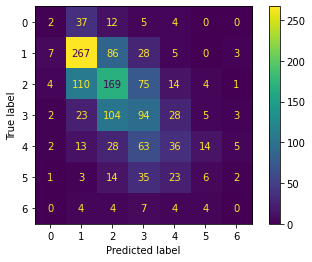

In [1181]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a tfidf word frequency

In [1182]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [1183]:
y_pred_train_gbm = model.predict(X_train_combined4_scaled_gbm)

In [1184]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1185]:
y_pred_gbm = model.predict(X_test_combined4_scaled_gbm)

In [1186]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })


In [1187]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.40808823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.03      0.05        60
           1       0.57      0.67      0.62       396
           2       0.39      0.45      0.42       377
           3       0.30      0.30      0.30       259
           4       0.26      0.21      0.23       161
           5       0.07      0.04      0.05        84
           6       0.12      0.04      0.06        23

    accuracy                           0.41      1360
   macro avg       0.26      0.25      0.25      1360
weighted avg       0.37      0.41      0.39      1360



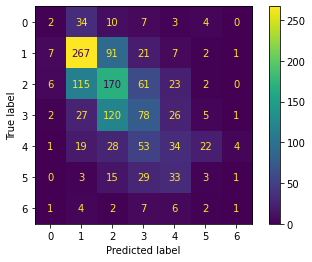

In [1188]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim

In [1189]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_scal_out_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Najlepší skóre: 0.801382051218361


In [1190]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_scal_out_gbm)

In [1191]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1192]:
y_pred_gbm = best_gbm_model.predict(X_test_scal_out_gbm)

In [1193]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1194]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8132352941176471
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.94      0.52      0.67        60
           1       0.82      0.91      0.86       396
           2       0.82      0.85      0.84       377
           3       0.81      0.79      0.80       259
           4       0.77      0.76      0.76       161
           5       0.79      0.71      0.75        84
           6       0.80      0.35      0.48        23

    accuracy                           0.81      1360
   macro avg       0.82      0.70      0.74      1360
weighted avg       0.82      0.81      0.81      1360



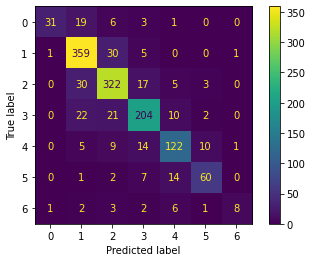

In [1195]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim a ngram

In [1196]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [1197]:
y_pred_train_gbm = model.predict(X_train_combined_scal_out_gbm)

In [1198]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1199]:
y_pred_gbm = model.predict(X_test_combined_scal_out_gbm)

In [1200]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1201]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7911764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.95      0.30      0.46        60
           1       0.80      0.91      0.85       396
           2       0.82      0.82      0.82       377
           3       0.73      0.84      0.78       259
           4       0.78      0.77      0.78       161
           5       0.75      0.56      0.64        84
           6       0.00      0.00      0.00        23

    accuracy                           0.79      1360
   macro avg       0.69      0.60      0.62      1360
weighted avg       0.78      0.79      0.78      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


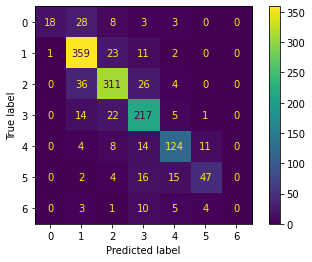

In [1202]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim a tfidf ngram

In [1203]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [1204]:
y_pred_train_gbm = model.predict(X_train_combined2_scal_out_gbm)

In [1205]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1206]:
y_pred_gbm = model.predict(X_test_combined2_scal_out_gbm)

In [1207]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1208]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7669117647058824
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.85      0.37      0.51        60
           1       0.80      0.87      0.83       396
           2       0.78      0.78      0.78       377
           3       0.71      0.81      0.76       259
           4       0.73      0.81      0.77       161
           5       0.76      0.52      0.62        84
           6       0.00      0.00      0.00        23

    accuracy                           0.77      1360
   macro avg       0.66      0.59      0.61      1360
weighted avg       0.76      0.77      0.76      1360



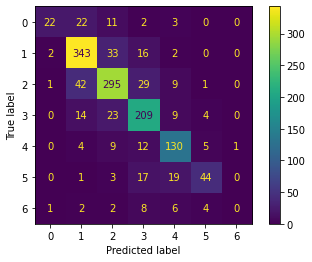

In [1209]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim a word frequency

In [1210]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [1211]:
y_pred_train_gbm = model.predict(X_train_combined3_scal_out_gbm)

In [1212]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1213]:
y_pred_gbm = model.predict(X_test_combined3_scal_out_gbm)

In [1214]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1215]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7757352941176471
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.95      0.35      0.51        60
           1       0.80      0.90      0.84       396
           2       0.83      0.80      0.81       377
           3       0.70      0.83      0.76       259
           4       0.74      0.73      0.74       161
           5       0.73      0.52      0.61        84
           6       0.00      0.00      0.00        23

    accuracy                           0.78      1360
   macro avg       0.68      0.59      0.61      1360
weighted avg       0.77      0.78      0.76      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


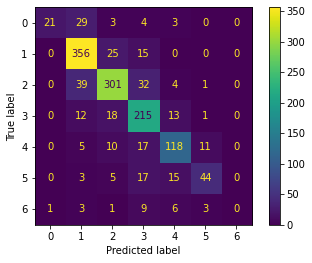

In [1216]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim a tfidf word frequency

In [1217]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [1218]:
y_pred_train_gbm = model.predict(X_train_combined4_scal_out_gbm)

In [1219]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       913
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00        48

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1220]:
y_pred_gbm = model.predict(X_test_combined4_scal_out_gbm)

In [1221]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })


In [1222]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7720588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.89      0.27      0.41        60
           1       0.79      0.89      0.84       396
           2       0.81      0.81      0.81       377
           3       0.74      0.80      0.77       259
           4       0.73      0.78      0.75       161
           5       0.70      0.51      0.59        84
           6       0.00      0.00      0.00        23

    accuracy                           0.77      1360
   macro avg       0.66      0.58      0.60      1360
weighted avg       0.76      0.77      0.76      1360



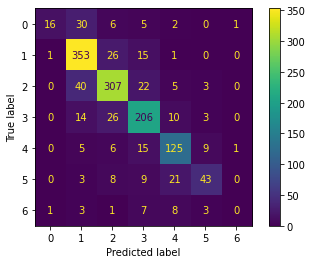

In [1223]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

In [1224]:
results_gbm3 = pd.DataFrame(results_list3_gbm)
print(results_gbm3)

    best_score  accuracy_train  accuracy_test  precision_train  \
0     0.379253             1.0       0.378676              1.0   
1          NaN             1.0       0.442647              1.0   
2          NaN             1.0       0.418382              1.0   
3          NaN             1.0       0.439706              1.0   
4          NaN             1.0       0.440441              1.0   
5     0.802959             1.0       0.819118              1.0   
6     0.799809             1.0       0.811765              1.0   
7          NaN             1.0       0.781618              1.0   
8          NaN             1.0       0.758088              1.0   
9          NaN             1.0       0.783824              1.0   
10         NaN             1.0       0.775735              1.0   
11    0.371053             1.0       0.360294              1.0   
12         NaN             1.0       0.409559              1.0   
13         NaN             1.0       0.419118              1.0   
14        

Najvyššiu presnosť sme dosiahli vo verzií s ošetrenými outliermi. Niektoré vezrie zmenšili svoju presnosť, pretože sne na nich nerobili gridsearch a tie hyperparametre, čo sme k nim priradili enboli efektívne. Model sa taktiež aj preučil

In [1225]:
row_names = ['bez osetrenia outlierov a skalovania', 'bez osetrenia outlierov a skalovania s ngramami', 'bez osetrenia outlierov a skalovania s tfidf ngramami', 'bez osetrenia outlierov a skalovania s word frequency', 'bez osetrenia outlierov a skalovania s tfidf word frequency', 's osetrenim outlierov', 's osetrenim outlierov a s ngramami', 's osetrenim outlierov a s tfidf ngramami', 's osetrenim outlierov a s word frequency', 's osetrenim outlierov a s tfidf word frequency', 'so skalovanim','so skalovanim a s ngramami','so skalovanim a s tfidf ngramami', 'so skalovanim a s word frequency','so skalovanim a s tfidf word frequency','s osetrenim outlierov a skalovanim','s osetrenim outlierov a skalovanim a s ngramami','s osetrenim outlierov a skalovanim a s tfidf ngramami', 's osetrenim outlierov a skalovanim a s word frequency','s osetrenim outlierov a skalovanim a s tfidf word frequency']  # Zoznam by mal obsahovať meno pre každý riadok

# Priradenie zoznamu mien do indexu DataFrame
results_svc1.index = row_names
results_svc2.index = row_names
results_svc3.index = row_names

results_rf1.index = row_names
results_rf2.index = row_names
results_rf3.index = row_names

results_gbm1.index = row_names
results_gbm2.index = row_names
results_gbm3.index = row_names

NameError: name 'results_svc3' is not defined

OHODNOTENIE

Podľa výsledkov nižšie môžeme vidieť, že najlepšie výsledky nám poskytol model Gradient Boosting Maschine a to s verziami datasetu, kde boli ošetrený outlieri a nebol dataset spojený so žiadnymi textovými reprezentáciami (ngram, tfidf ngram). Podľa tabuliek vidíme, že ošetrenie outlierov malo naväčší vplyv na accuracy. Naopak najhoršie výsledky mal čistý dataset bez ošetrenia outlierov a škálovania a bez pridania textových reprezentácií vo všetkých modeloch. Najhorší model na určovanie vekovej skupiny v mojej práci bol SVC, tým sa nám najmenšie accuracy podarilo dosiahnúť.

In [ ]:
results_svc1

In [ ]:
results_svc2

In [ ]:
results_svc3

In [ ]:
results_rf1

In [ ]:
results_rf2

In [ ]:
results_rf3

In [ ]:
results_gbm1

In [ ]:
results_gbm2

In [ ]:
results_gbm3

Grafická vizualizácia

In [ ]:
# Nastavenie štýlu Seaborn pre pekné grafy
sns.set(style="whitegrid")

test_categories = results_svc1.index.tolist()

# Pre každú kategóriu vytvoríme graf
for category in test_categories:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Farebné schémy pre testy
    colors_svc = sns.light_palette("green", 3)
    colors_rf = sns.light_palette("blue", 3)
    colors_gbm = sns.light_palette("pink", 3)

    # Pridanie dát pre SVC
    ax.bar('SVC1', results_svc1.loc[category, 'accuracy_test'], label='SVC Prvé testovanie', color=colors_svc[0])
    ax.bar('SVC2', results_svc2.loc[category, 'accuracy_test'], label='SVC Druhé testovanie', color=colors_svc[1])
    ax.bar('SVC3', results_svc3.loc[category, 'accuracy_test'], label='SVC Tretie testovanie', color=colors_svc[2])

    # Pridanie dát pre Random Forest
    ax.bar('RF1', results_rf1.loc[category, 'accuracy_test'], label='RF Prvé testovanie', color=colors_rf[0])
    ax.bar('RF2', results_rf2.loc[category, 'accuracy_test'], label='RF Druhé testovanie', color=colors_rf[1])
    ax.bar('RF3', results_rf3.loc[category, 'accuracy_test'], label='RF Tretie testovanie', color=colors_rf[2])

    # Pridanie dát pre GRADIENT BOOSTING MASHINE
    ax.bar('DT1', results_gbm1.loc[category, 'accuracy_test'], label='DT Prvé testovanie', color=colors_gbm[0])
    ax.bar('DT2', results_gbm2.loc[category, 'accuracy_test'], label='DT Druhé testovanie', color=colors_gbm[1])
    ax.bar('DT3', results_gbm3.loc[category, 'accuracy_test'], label='DT Tretie testovanie', color=colors_gbm[2])

    # Nastavenie legendy mimo grafu na pravej strane
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Titulok grafu
    ax.set_title(f'Presnosť testu pre kategóriu: {category}')

    # Popisy osí
    ax.set_xlabel('Model a fáza testovania')
    ax.set_ylabel('Presnosť testu')

    # Zobrazenie grafu
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Uvoľnenie priestoru pre legendu
    plt.show()

In [ ]:
# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 7))

# Farebná paleta pre rôzne testovania
colors = sns.color_palette("tab10", 12)

# Vykreslenie grafu pre každý DataFrame
for results_df, label in [(results_svc1, 'SVC1'), (results_svc2, 'SVC2'), (results_svc3, 'SVC3'), (results_rf1, 'RF1'), (results_rf2, 'RF2'), (results_rf3, 'RF3'), (results_gbm1, 'DT1'), (results_gbm2, 'DT3'), (results_gbm3, 'DT4')]:
    fig, ax = plt.subplots(figsize=(12, 7))

    # Názvy indexov vo vašom DataFrame, upravte podľa potreby
    index_names = results_df.index.tolist()

    # Vykreslenie stĺpcov pre každý index
    for i, index_name in enumerate(index_names):
        # Vyberieme farbu pre aktuálny index
        color = colors[i % len(colors)]
        # Vykreslíme stĺpec a pridáme popisek pre legendu
        ax.bar(i, results_df.loc[index_name, 'accuracy_test'], color=color, label=index_name)

    # Nastavíme os x na čísla od 0 do počtu indexov - 1
    ax.set_xticks(np.arange(len(index_names)))
    ax.set_xticklabels(np.arange(1, len(index_names) + 1))

    # Pridáme legendu
    ax.legend(title='Fáza testovania', loc='center left', bbox_to_anchor=(1, 0.5))

    # Nastavíme názov grafu a popisy osí
    ax.set_title(f'Presnosť testu pre {label} testovanie')
    ax.set_xlabel('Index fázy testovania')
    ax.set_ylabel('Presnosť testu')

    # Zobrazíme graf
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()